In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('true_car_listings.csv')

In [4]:
df


Price  Year  Mileage              City State                Vin  \
0        8995  2014    35725           El Paso    TX  19VDE2E53EE000083   
1       10888  2013    19606  Long Island City    NY  19VDE1F52DE012636   
2        8995  2013    48851           El Paso    TX  19VDE2E52DE000025   
3       10999  2014    39922           Windsor    CO  19VDE1F71EE003817   
4       14799  2016    22142            Lindon    UT  19UDE2F32GA001284   
...       ...   ...      ...               ...   ...                ...   
852117  63215  2017        9       Culver City    CA  YV1A22MK9H1013237   
852118  72260  2017     3201         Englewood    NJ  YV4A22PL3H1186162   
852119  55999  2016    28941      Fort Collins    CO  YV4A22PL4G1000868   
852120  60240  2017     3005       San Leandro    CA  YV4A22NLXH1006162   
852121  76995  2017     2502          New York    NY  YV4BC0ZX1H1109845   

         Make         Model  
0       Acura    ILX6-Speed  
1       Acura    ILX5-Speed  
2       Acura    ILX6-Speed  
3       Acura    ILX5-Speed  
4       Acura  ILXAutomatic  
...       ...           ...  
852117  Volvo         S90T6  
852118  Volvo        XC90T6  
852119  Volvo       XC90AWD  
852120  Volvo           V90  
852121  Volvo        XC90T8  

[852122 rows x 8 columns]

<AxesSubplot:>

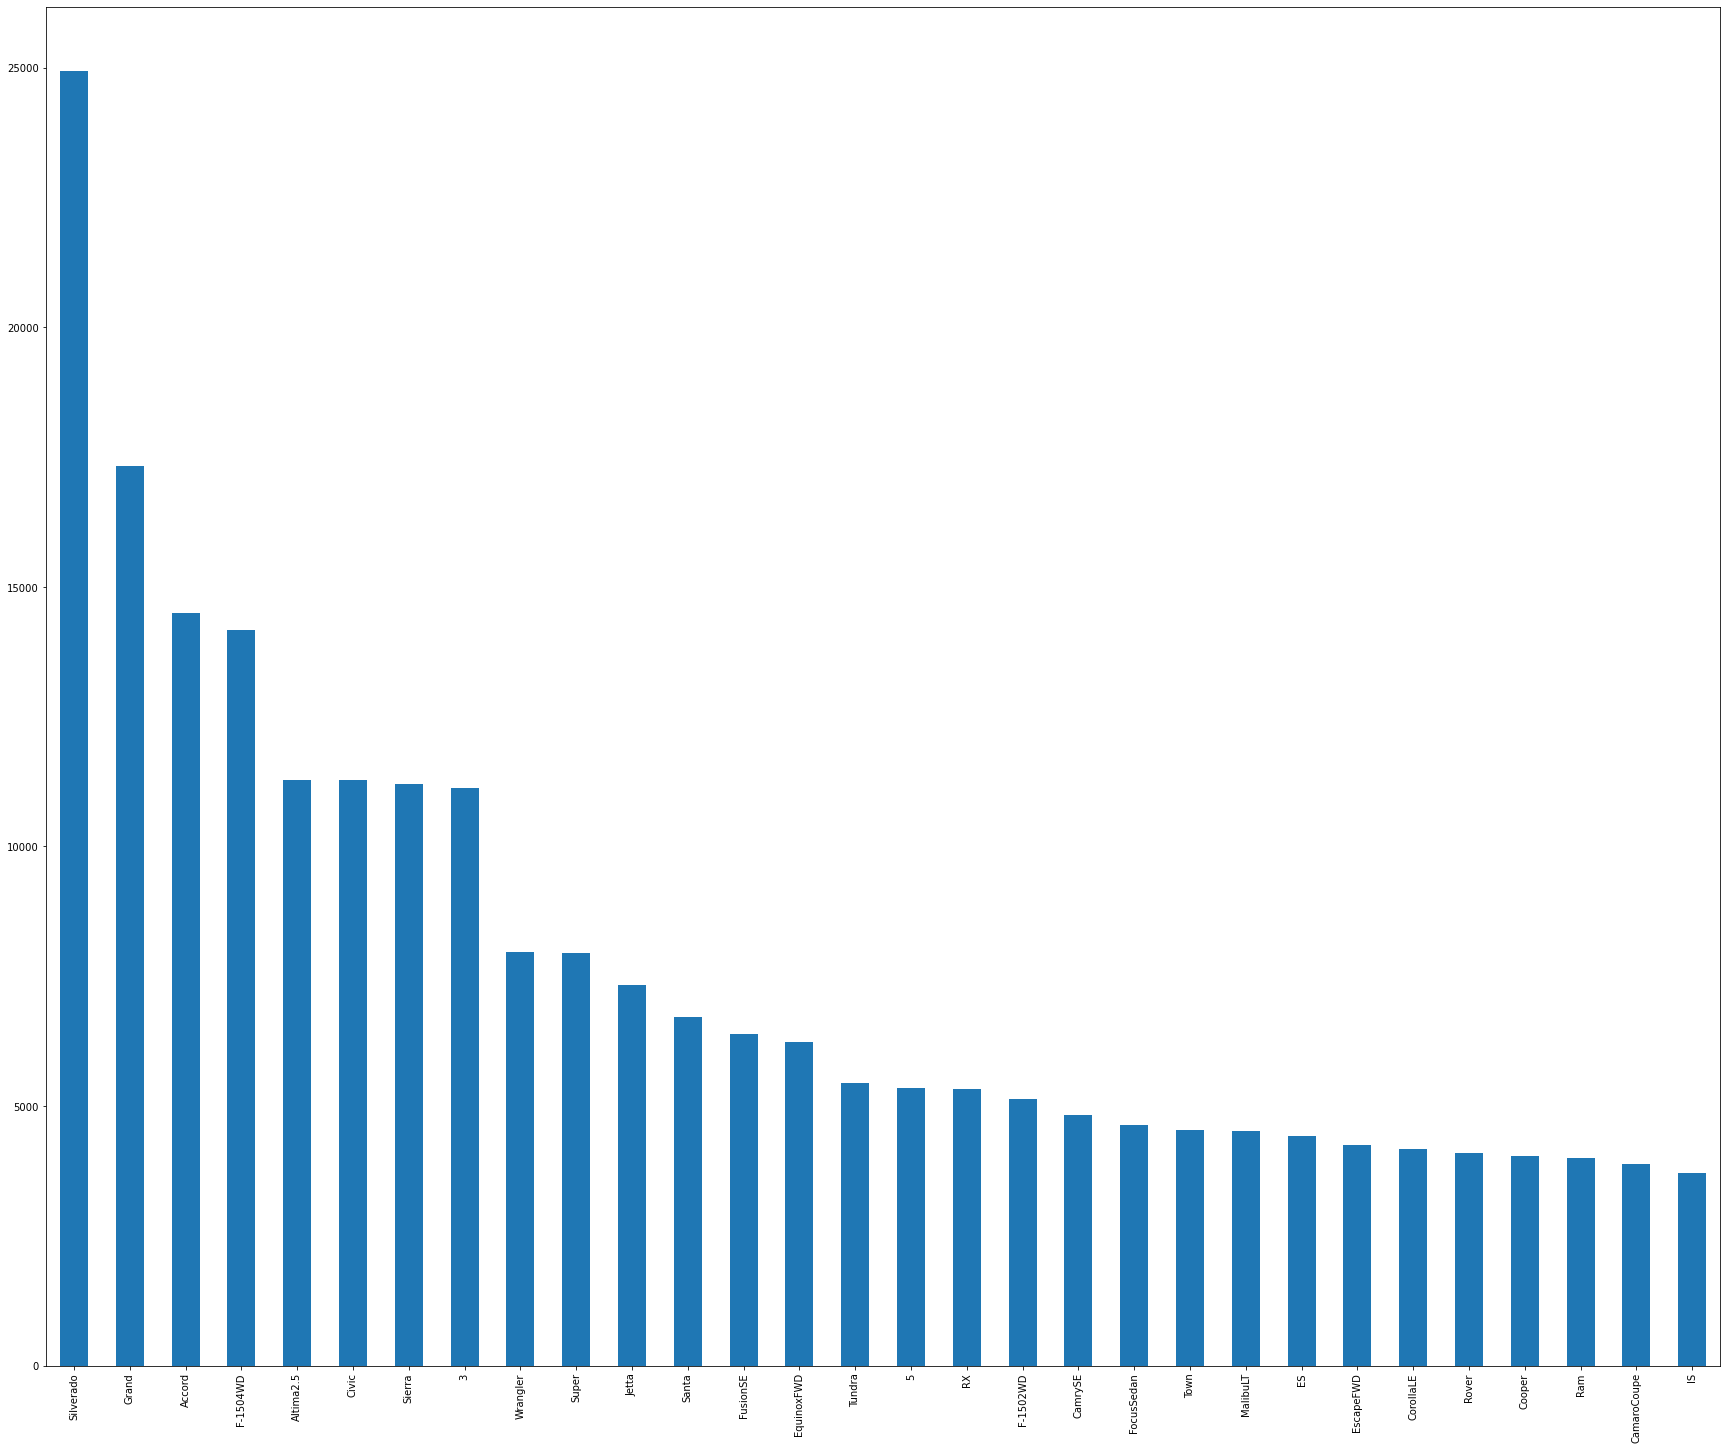

In [5]:
plt.figure( figsize = (30,25))
df['Model'].value_counts().head(30).plot(kind='bar')


Previsualizando los modelos mas repetidos 

<AxesSubplot:>

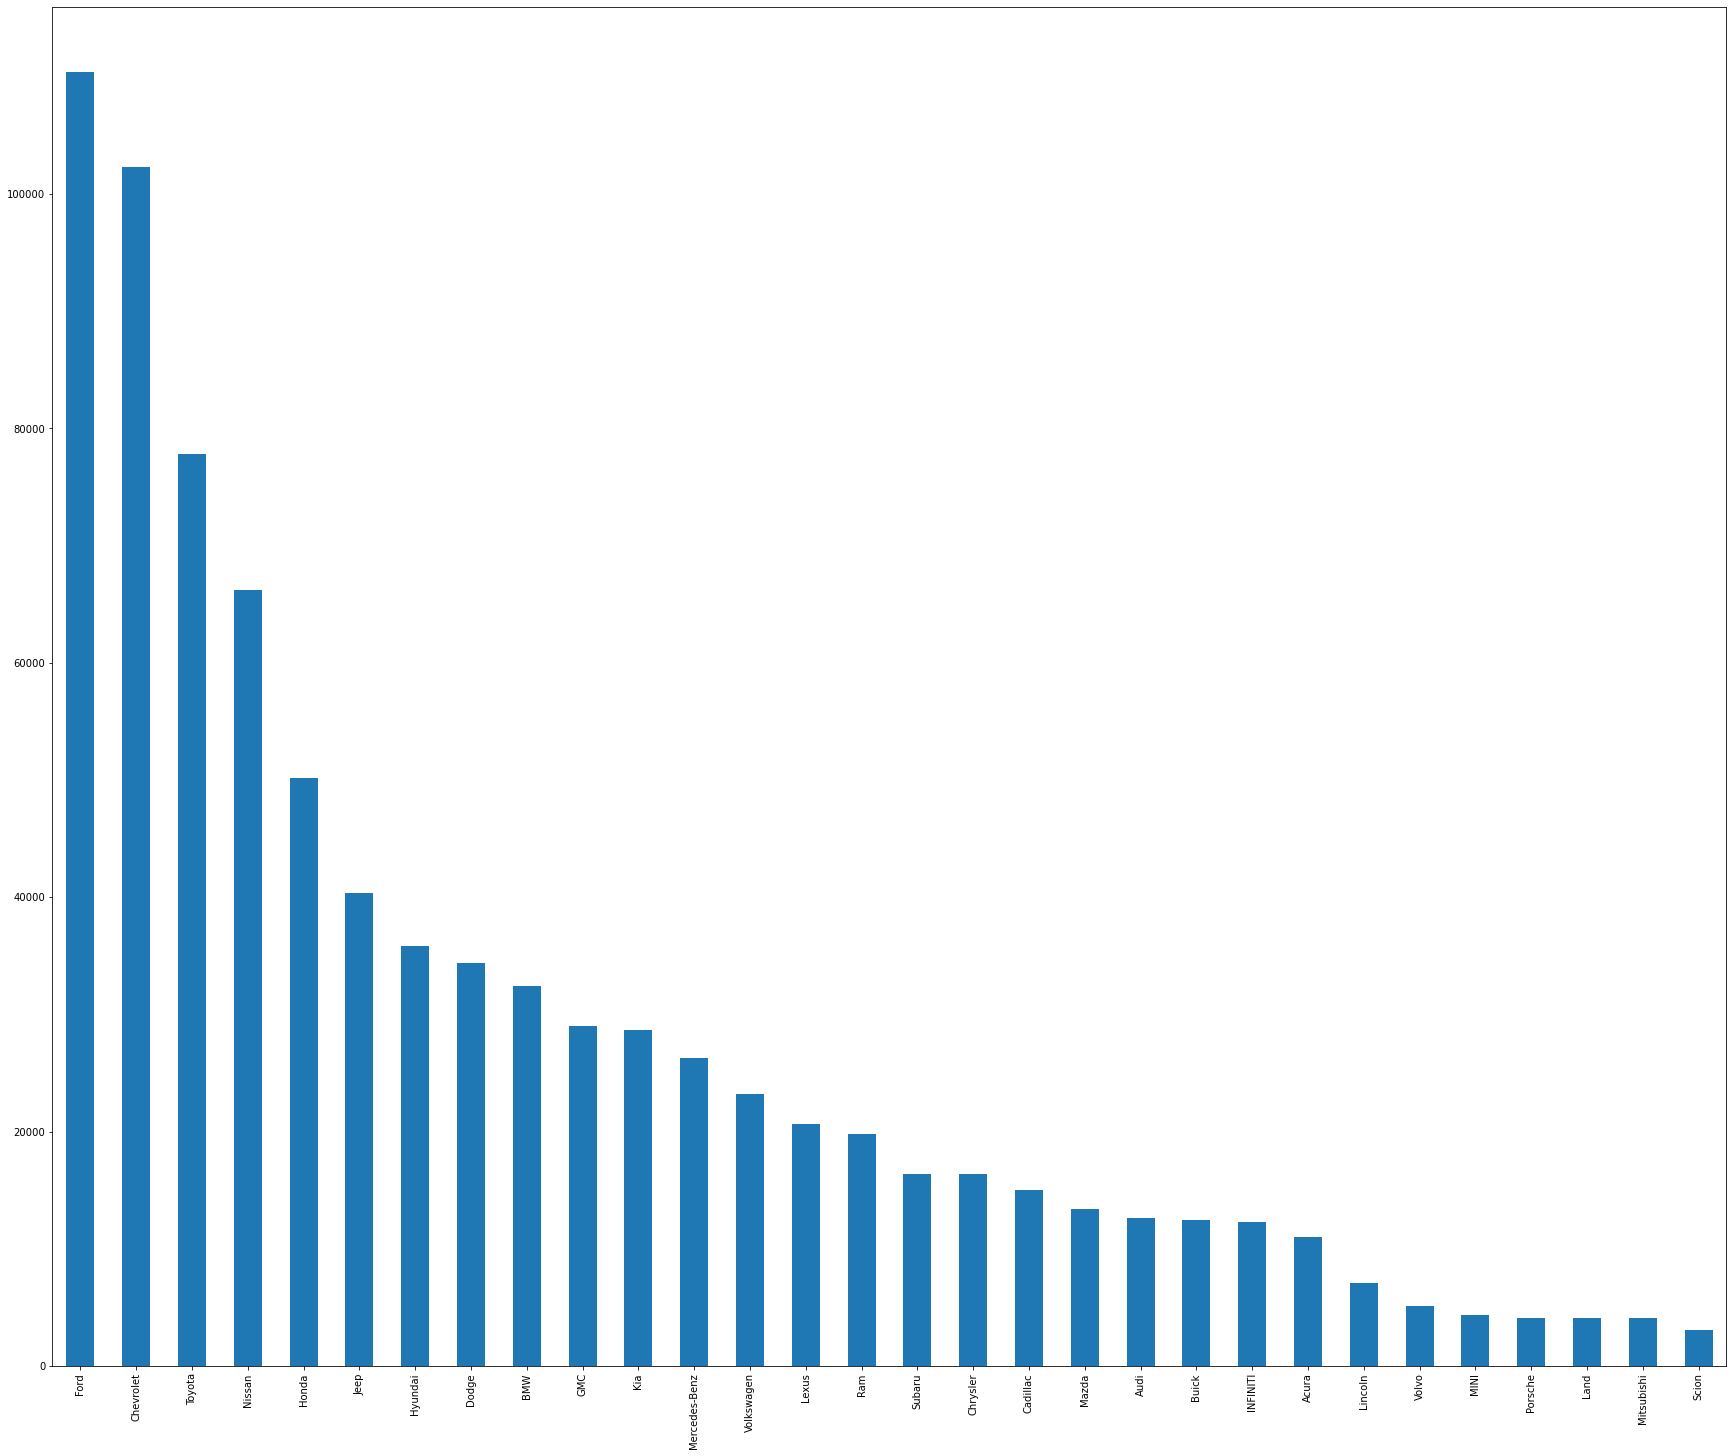

In [8]:
plt.figure( figsize = (30,25))
df['Make'].value_counts().head(30).plot(kind='bar')

In [8]:
Makers=df['Make'].value_counts().index
valores=np.array(df['Make'].value_counts())


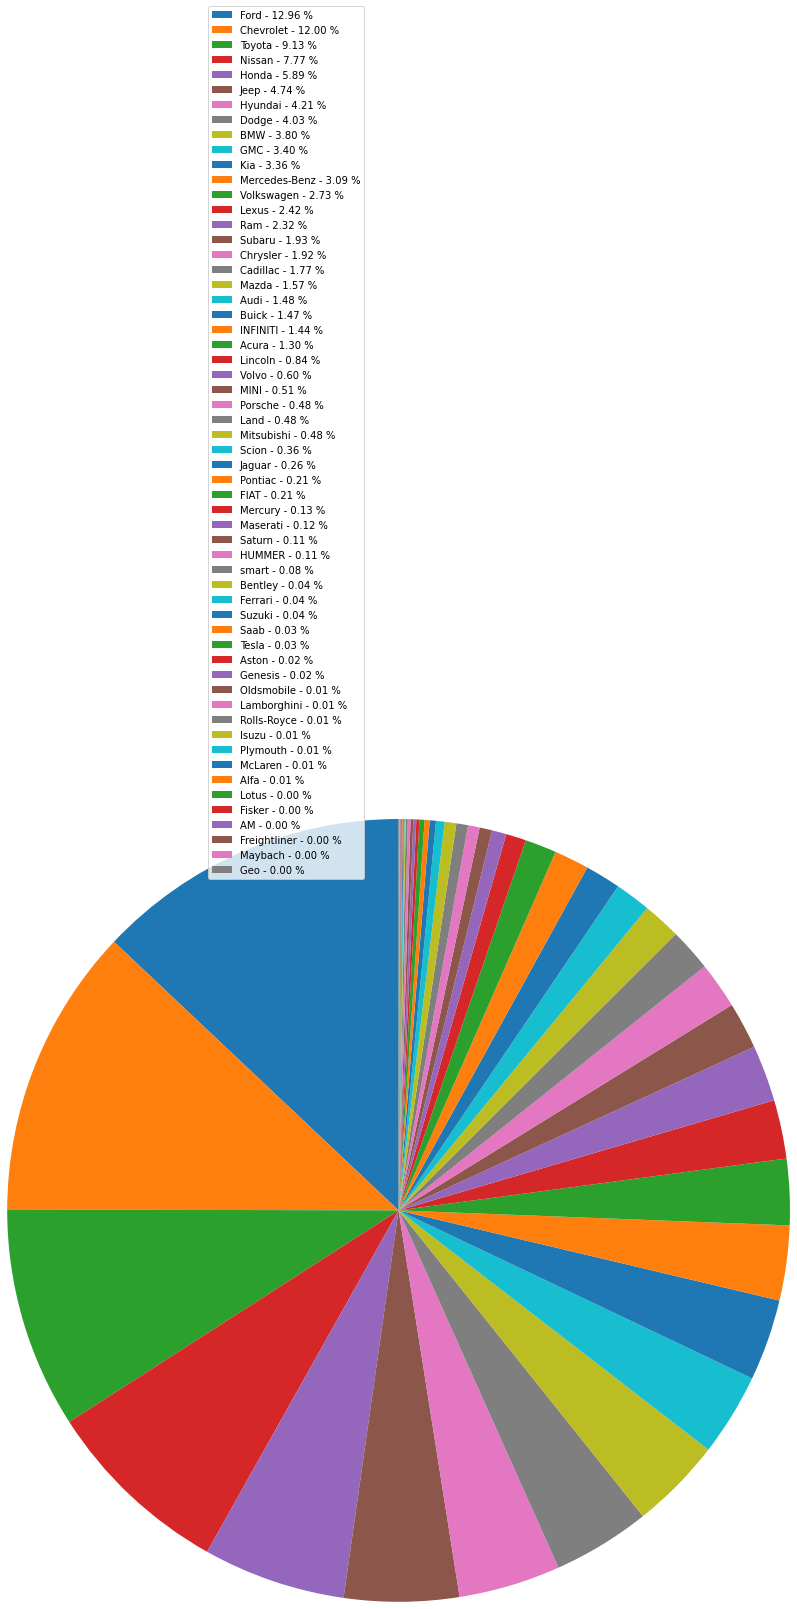

In [9]:
porcent = 100.*valores/valores.sum()
fig, ax = plt.subplots(figsize=(6, 6))
patches, texts = plt.pie(valores, startangle=90, radius=3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(Makers, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, valores),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.5),
           fontsize=10)


plt.savefig('piechart.png', bbox_inches='tight')



<AxesSubplot:title={'center':'% Marca Data Set'}, ylabel='Make'>

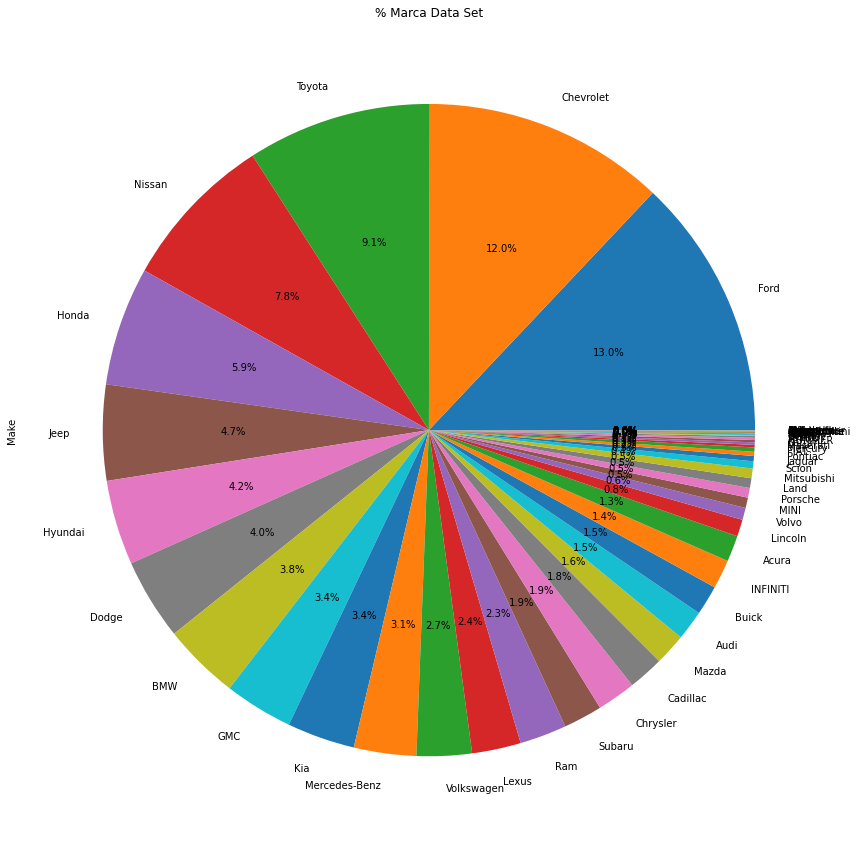

In [16]:
df['Make'].value_counts().plot.pie(figsize=(15, 15),autopct='%1.1f%%',title='% Marca Data Set',labels=Makers)


Ver cuales marcas tienen mayor presencia dentro del data set Cuales son los que tienen mayor oferta

Text(0.5, 0, 'Precio')

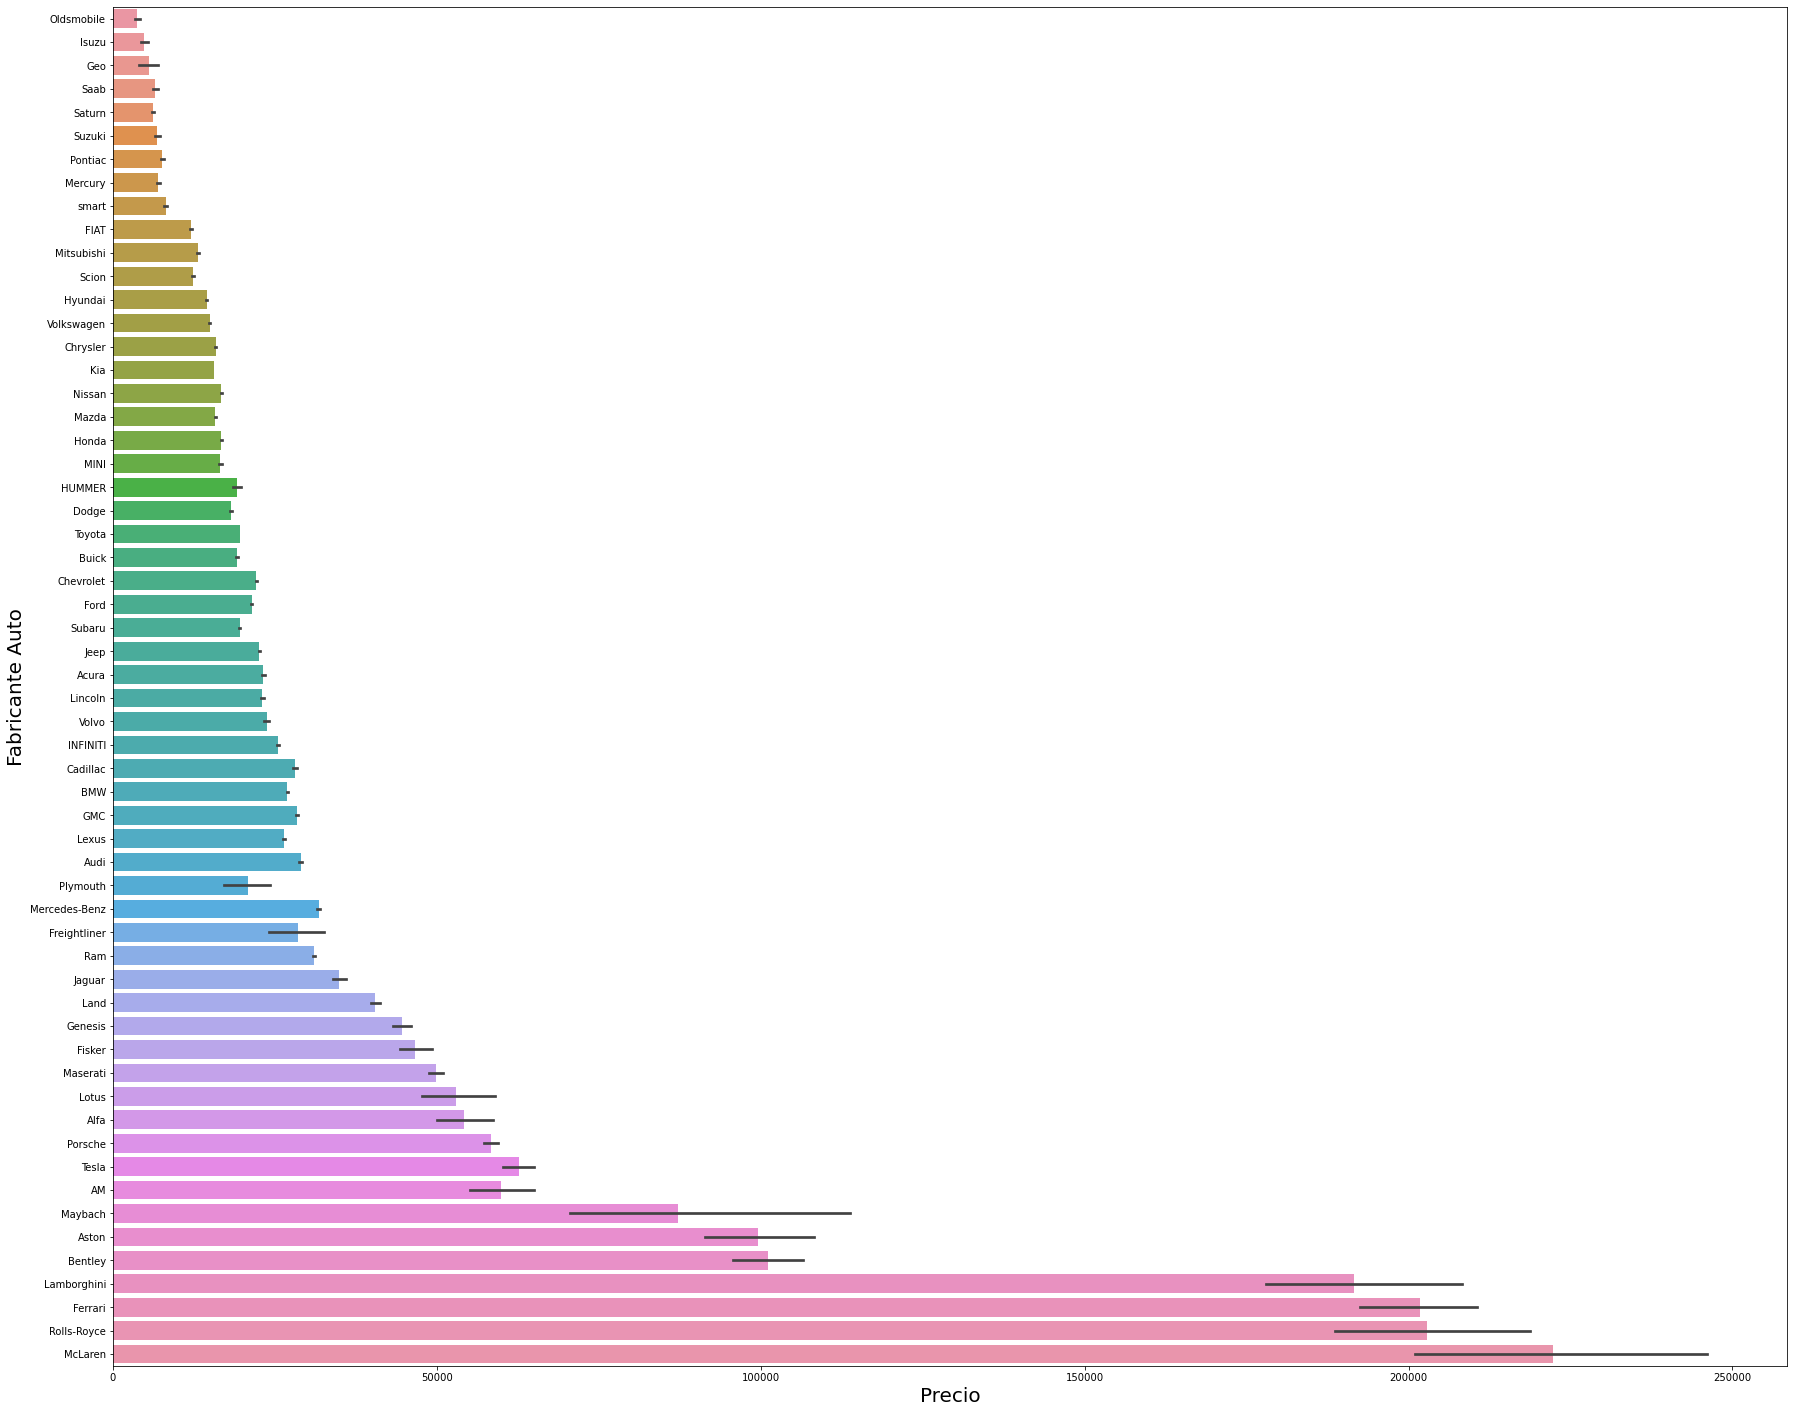

In [6]:
plt.figure( figsize = (30,25))
sorted_nb = df.groupby(['Make'])['Price'].median().sort_values()
sns.barplot(y="Make",x="Price",data=df,order=list(sorted_nb.index))

#sns.boxplot(x=df['Make'], y=df['Price'], order=list(sorted_nb.index))

plt.ylabel("Fabricante Auto",fontsize=20)
plt.xlabel("Precio",fontsize=20)

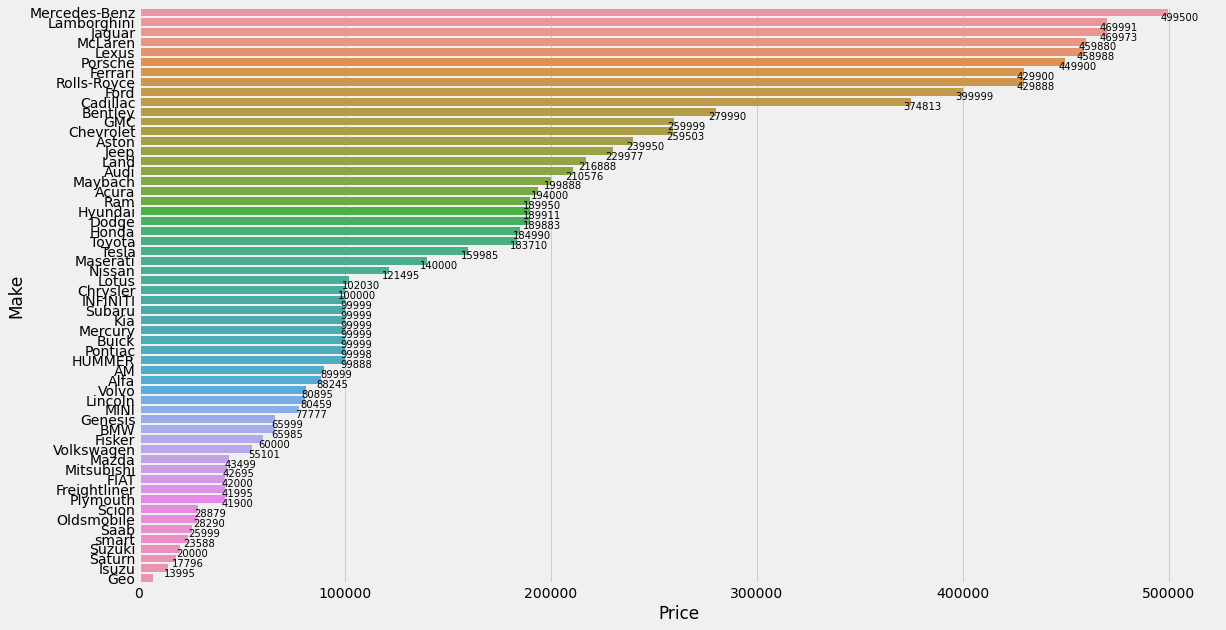

In [24]:
max_price_brand = df.groupby('Make')['Price'].max().to_frame().reset_index().sort_values(by='Price', ascending=False)
mean_price_brand = df.groupby('Make')['Price'].mean().to_frame().reset_index().sort_values(by='Price', ascending=False)
min_price_brand = df.groupby('Make')['Price'].min().to_frame().reset_index().sort_values(by='Price', ascending=False)
fig = plt.figure(figsize=(15,8))

axes = fig.add_axes([0, 0, 1, 1])

sns.barplot(y=max_price_brand['Make'], x=max_price_brand['Price'], ax=axes)

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(width), (5800 + width, y + height*1.5), ha='center', fontsize=10, color='black')

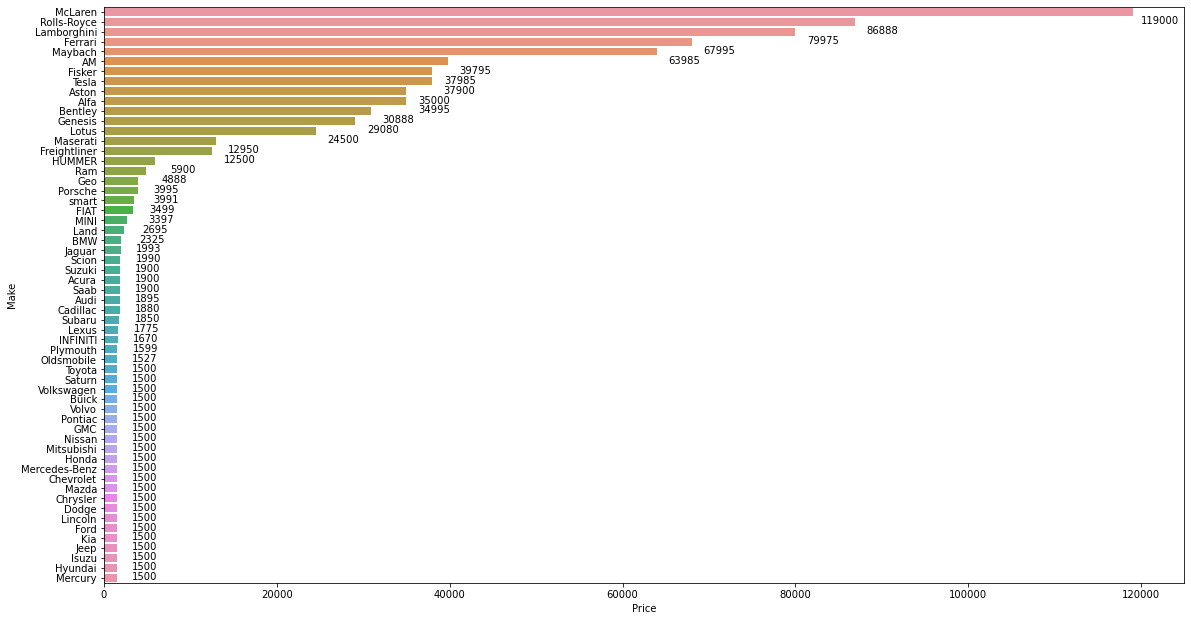

In [9]:
fig = plt.figure(figsize=(15,8))

axes = fig.add_axes([0, 0, 1, 1])

sns.barplot(y=min_price_brand['Make'], x=min_price_brand['Price'], ax=axes)

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(width), (3200 + width, y + height*2.0), ha='center', fontsize=10, color='black')

Podemos ver el precio mas alto de cada marca 

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

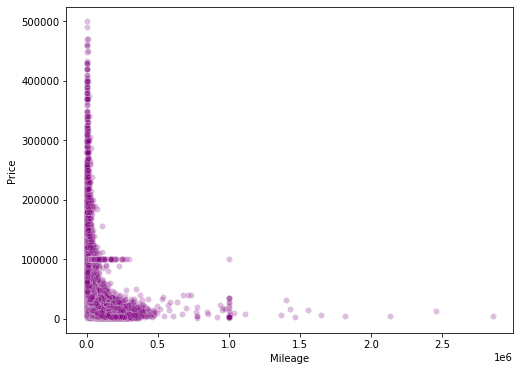

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Mileage',y='Price',data=df,color='purple',alpha=0.25)

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

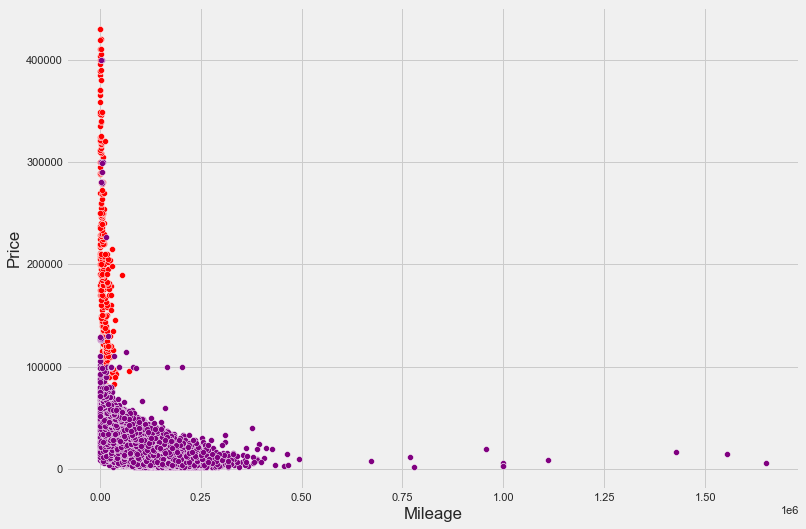

In [156]:
sns.scatterplot(x='Mileage',y='Price',data=df.loc[(df['Make']=='Ferrari') ],color='red')
sns.scatterplot(x='Mileage',y='Price',data=df.loc[(df['Make']=='Ford') ],color='purple')


In [37]:
hola=df.groupby('Year').mean('Price')
hola=pd.DataFrame(hola)
hola.reset_index(inplace=True)

In [38]:
hola

Year         Price        Mileage
0   1997  10434.630872  150555.738255
1   1998   6561.335917  146353.117571
2   1999   6987.876396  146751.504785
3   2000   6883.256079  140965.401966
4   2001   7273.763158  138870.868808
5   2002   8201.668684  136002.732368
6   2003   8345.250841  133589.970260
7   2004   8906.697548  131391.653197
8   2005   9567.402817  126590.894684
9   2006  10626.418794  121109.845945
10  2007  11629.455623  115678.909971
11  2008  12726.951726  108012.739044
12  2009  13048.444992   98820.566917
13  2010  14253.587821   91660.675006
14  2011  16309.710722   84361.177731
15  2012  17406.028354   74060.129491
16  2013  19231.857458   60824.445389
17  2014  22146.391327   42484.116258
18  2015  25023.845038   34264.900766
19  2016  25436.294106   25648.823818
20  2017  29802.774070   14936.784484
21  2018  41397.838395    1722.157267

Text(0.5, 0, 'Año')

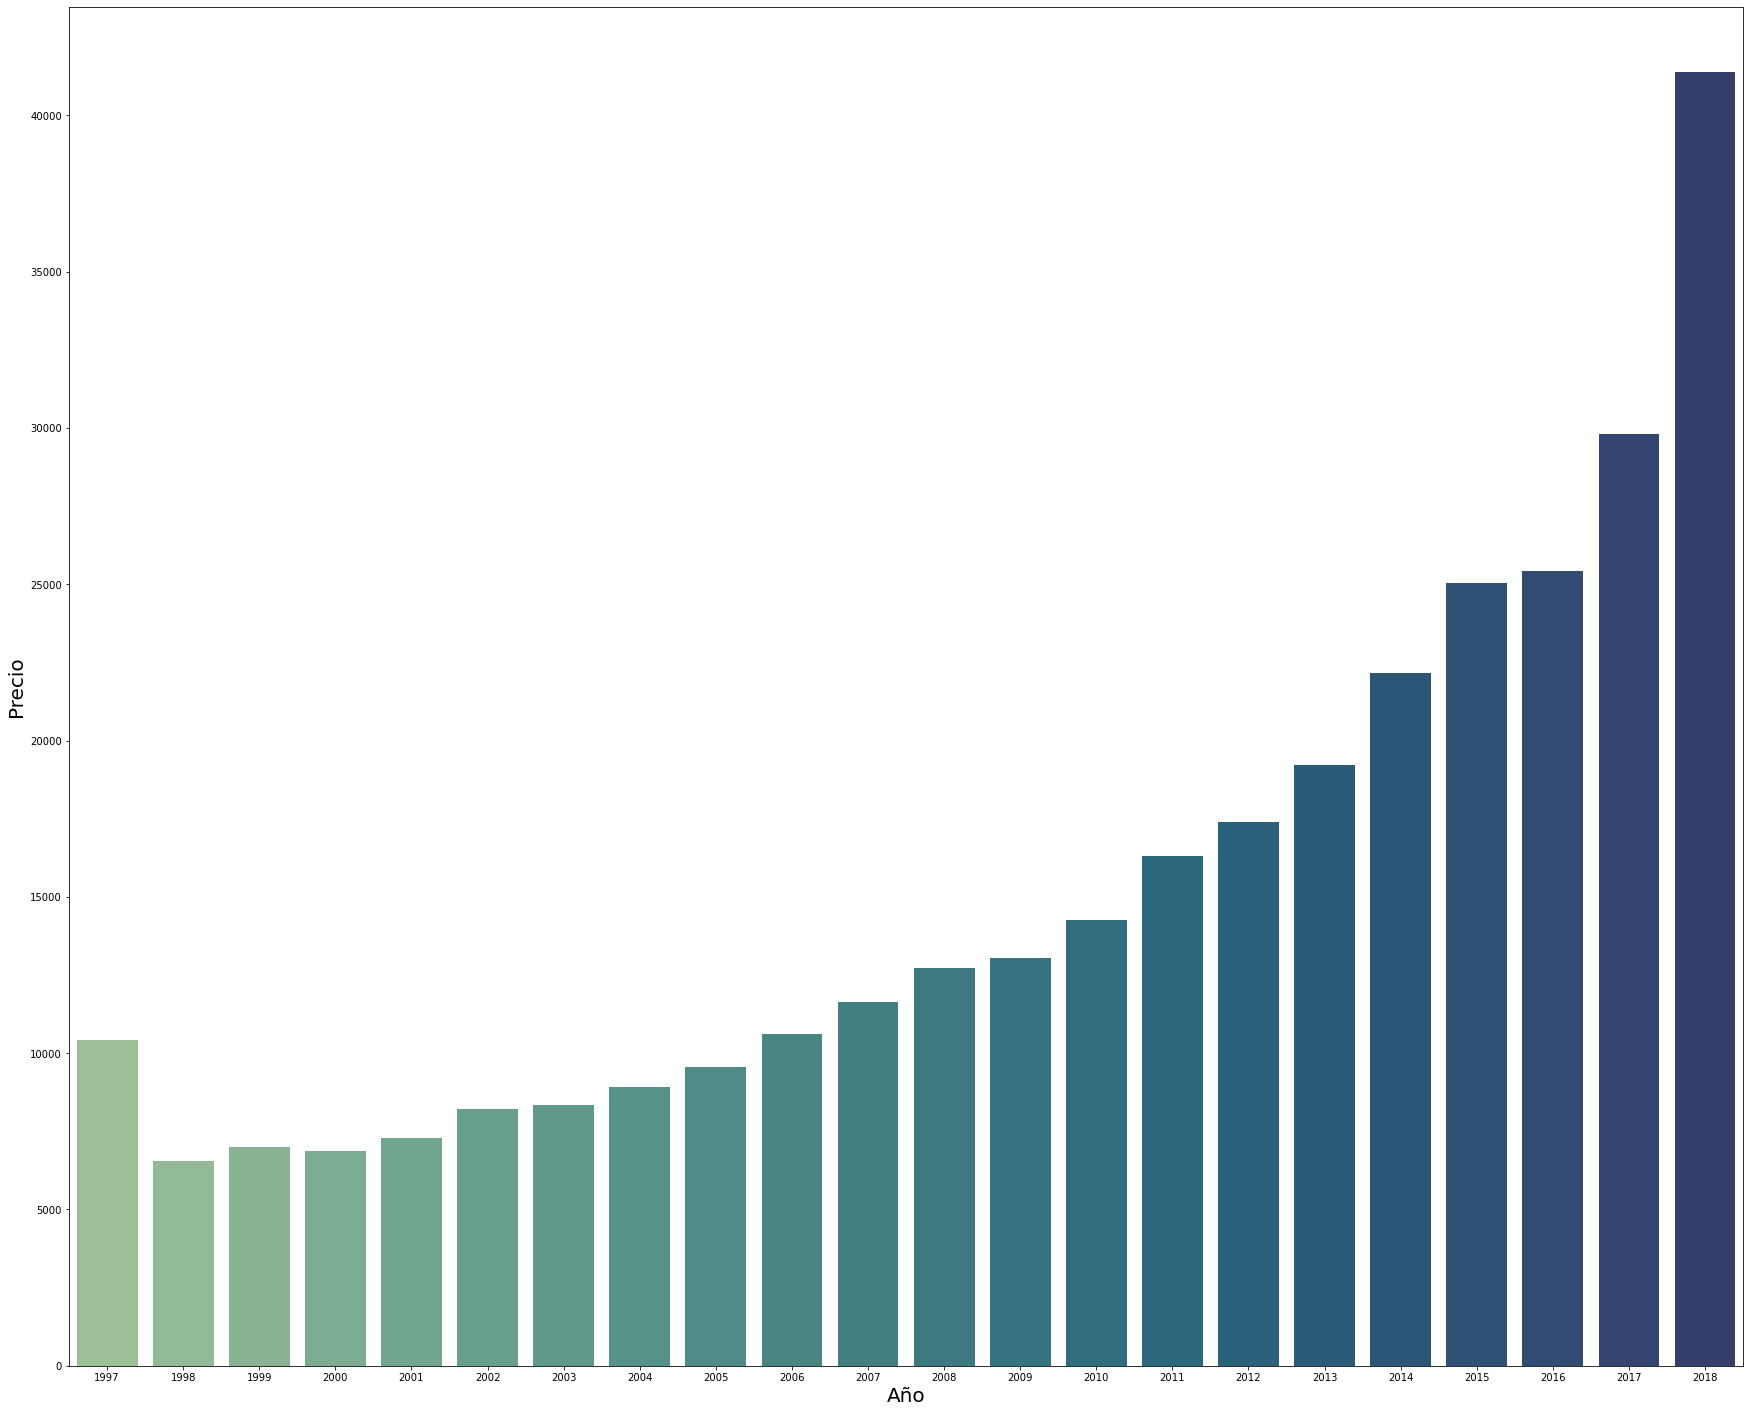

In [44]:
plt.figure( figsize = (30,25))
sns.barplot(data=hola,y='Price',x='Year',palette='crest')

plt.ylabel('Precio',fontsize=20)
plt.xlabel('Año',fontsize=20)

Text(0.5, 0, 'Año')

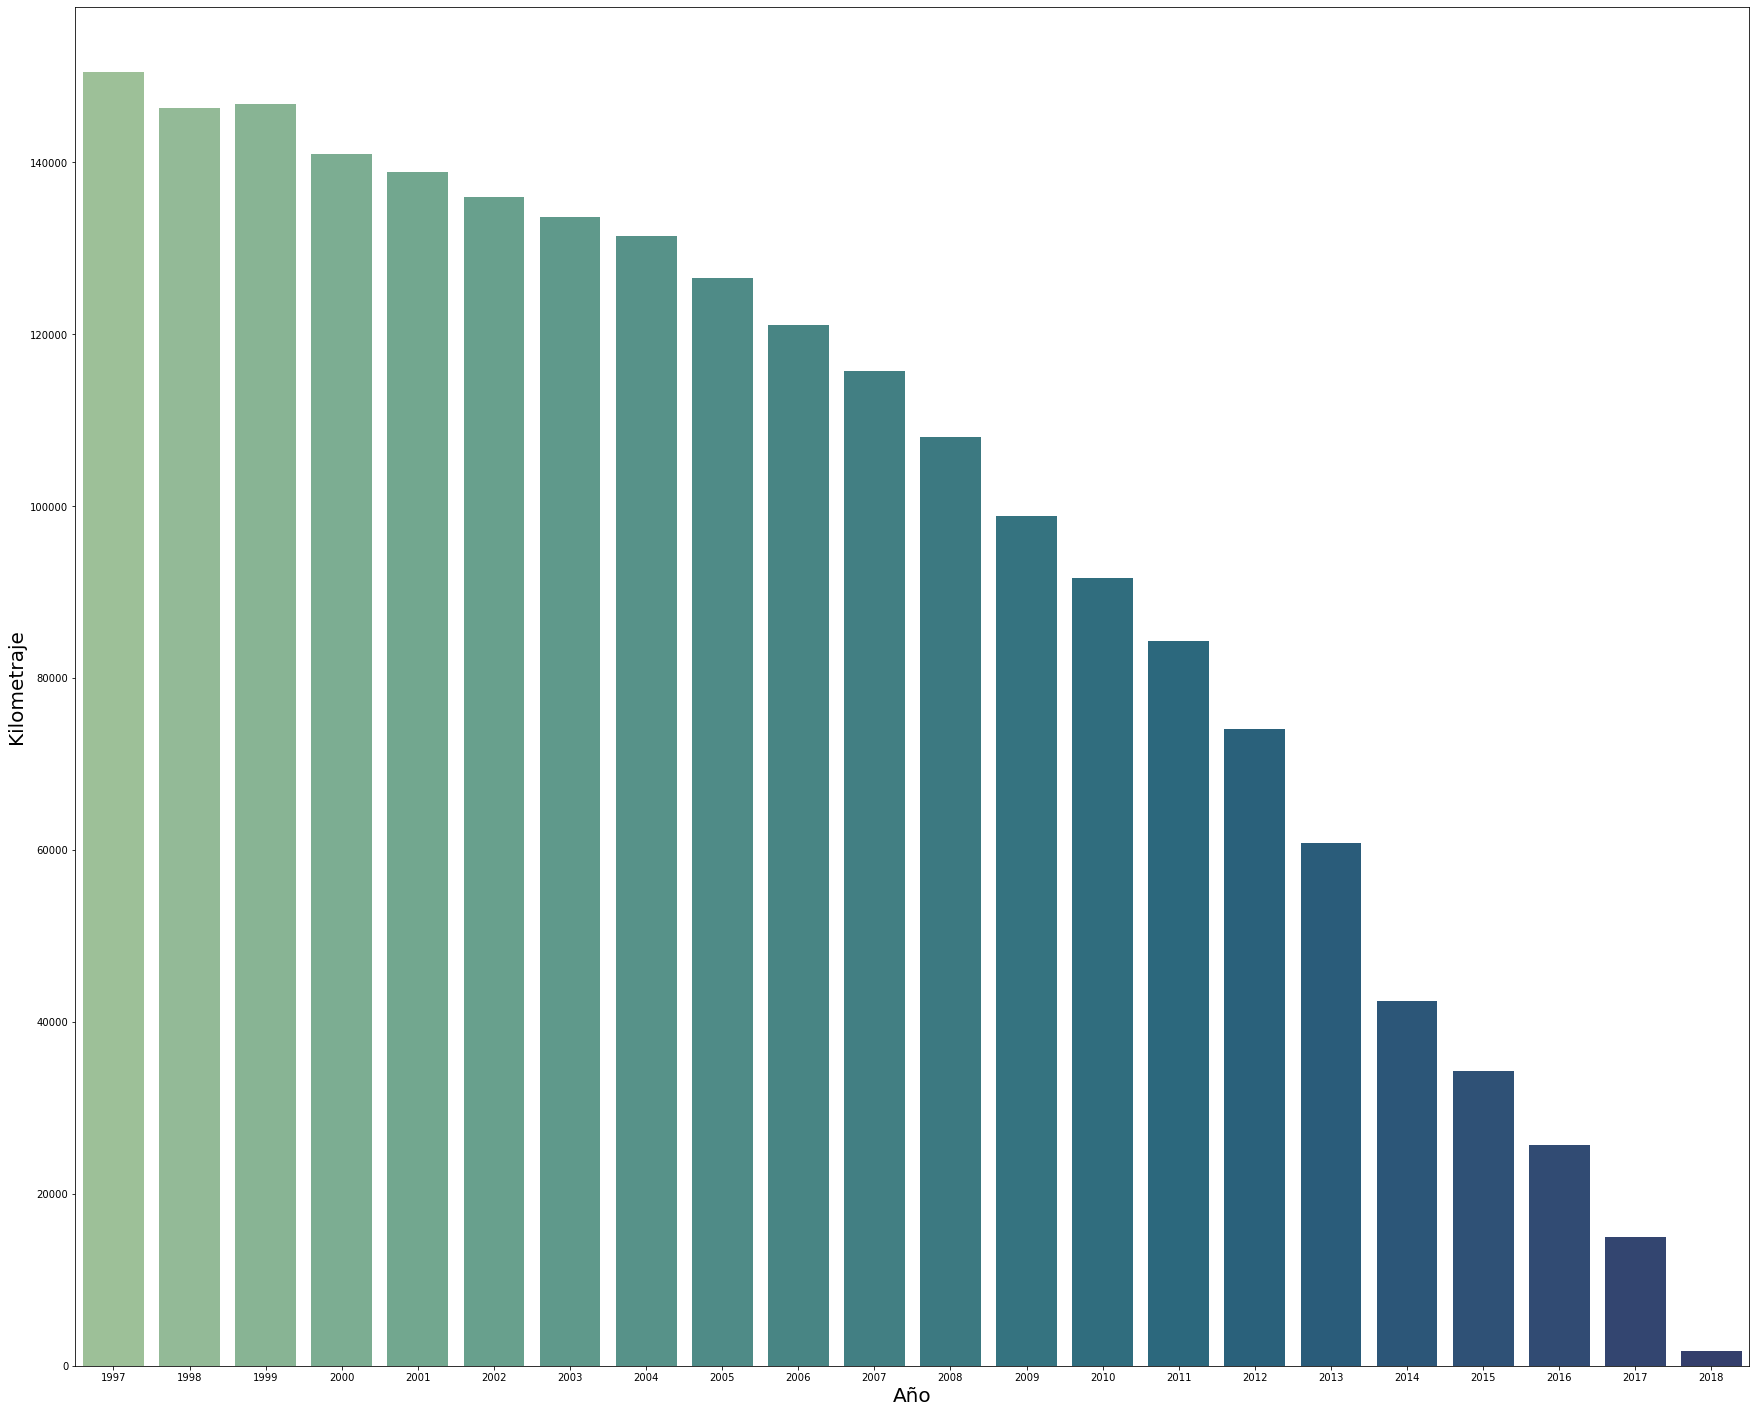

In [47]:
plt.figure( figsize = (30,25))
sns.barplot(data=hola,y='Mileage',x='Year',palette='crest')

plt.ylabel('Kilometraje',fontsize=20)
plt.xlabel('Año',fontsize=20)

<AxesSubplot:xlabel='Year', ylabel='Price'>

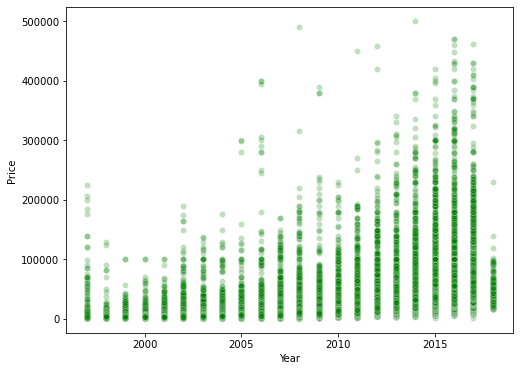

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Year',y='Price',data=df,color='g',alpha=0.25)

<AxesSubplot:xlabel='Year', ylabel='Price'>

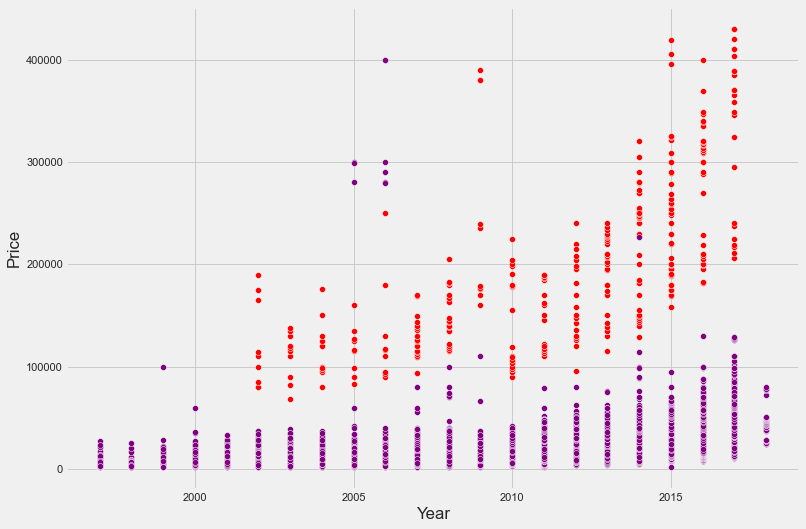

In [157]:
sns.scatterplot(x='Year',y='Price',data=df.loc[(df['Make']=='Ferrari') ],color='red')
sns.scatterplot(x='Year',y='Price',data=df.loc[(df['Make']=='Ford') ],color='purple')


<AxesSubplot:xlabel='Year', ylabel='Price'>

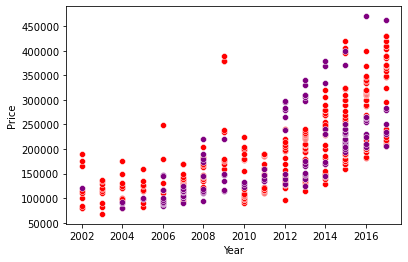

In [7]:
sns.scatterplot(x='Year',y='Price',data=df.loc[(df['Make']=='Ferrari') ],color='red')
sns.scatterplot(x='Year',y='Price',data=df.loc[(df['Make']=='Lamborghini') ],color='purple')

<AxesSubplot:xlabel='Price', ylabel='Count'>

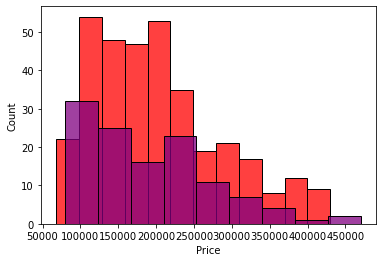

In [11]:
sns.histplot(x='Price',data=df.loc[(df['Make']=='Ferrari') ],color='red')
sns.histplot(x='Price',data=df.loc[(df['Make']=='Lamborghini') ],color='purple')

<AxesSubplot:xlabel='Price', ylabel='Count'>

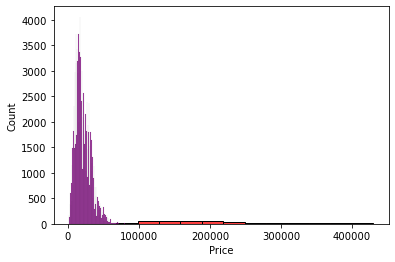

In [12]:
sns.histplot(x='Price',data=df.loc[(df['Make']=='Ferrari') ],color='red')
sns.histplot(x='Price',data=df.loc[(df['Make']=='Ford') ],color='purple')

/tmp/ipykernel_6156/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

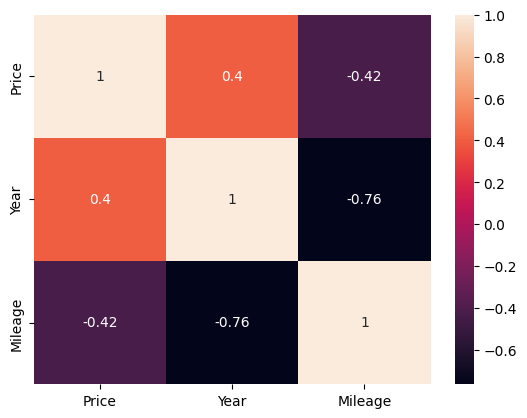

In [ ]:
sns.heatmap(df.corr(),annot=True)

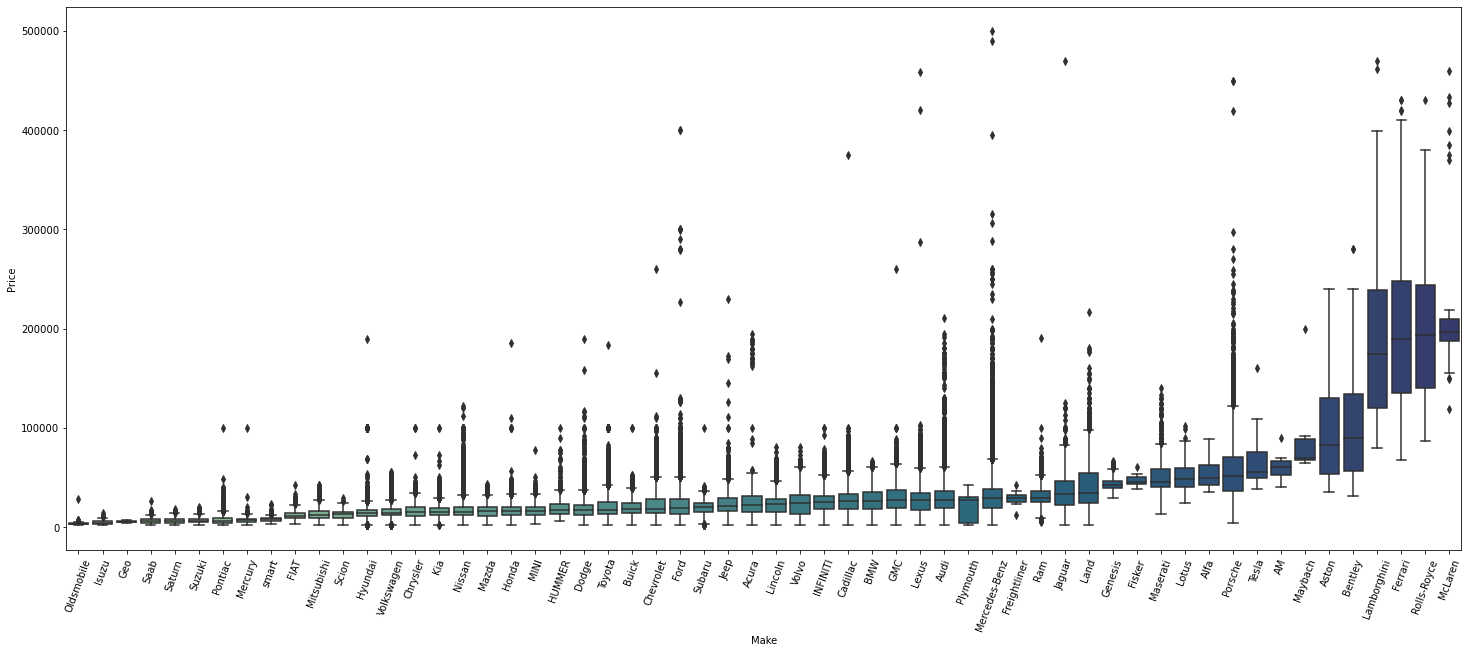

In [48]:
plt.figure(figsize=(25,10))
sorted_nb = df.groupby(['Make'])['Price'].median().sort_values()
sns.boxplot(x=df['Make'], y=df['Price'], order=list(sorted_nb.index),palette='crest')
plt.xticks(rotation=70);

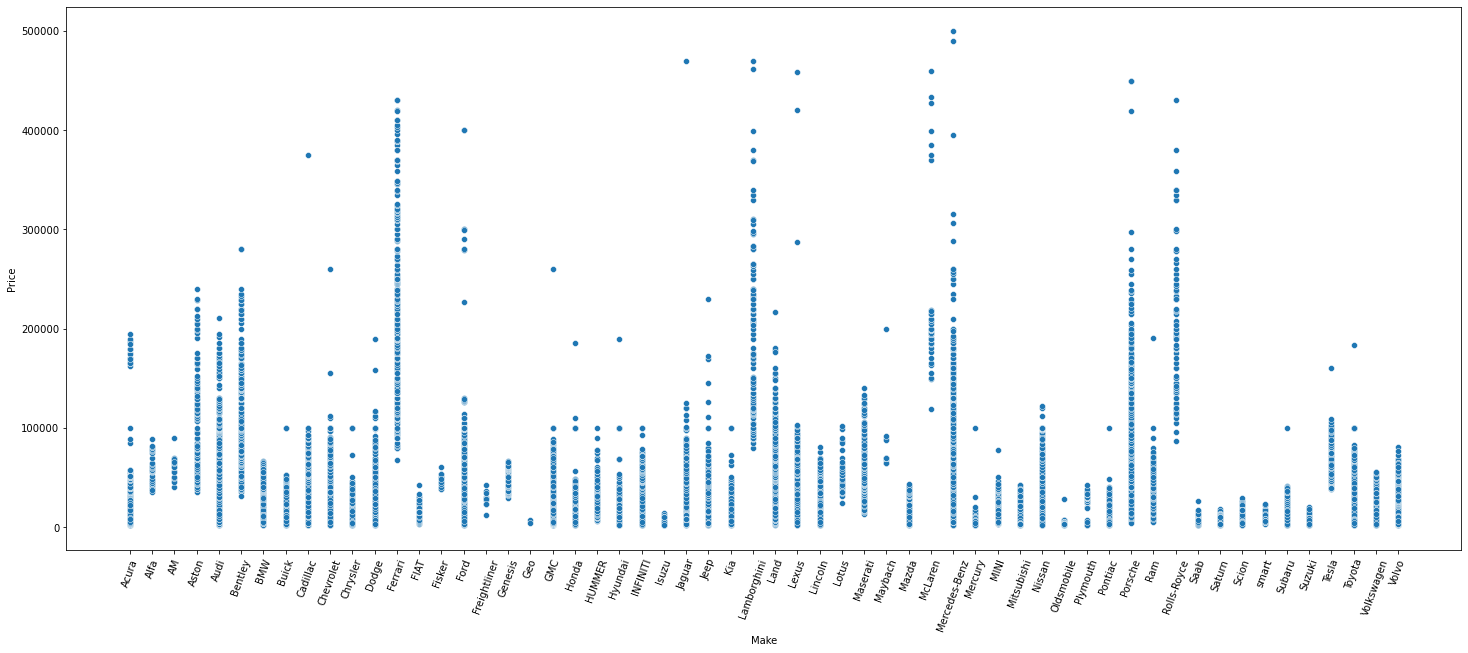

In [98]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=df['Make'], y=df['Price'])
plt.xticks(rotation=70);

In [8]:
mean_marcas=df.groupby(['Make'])['Price'].mean().sort_values(ascending=False)
mean_marcas

Make
McLaren          222232.234043
Rolls-Royce      202772.836957
Ferrari          201742.968116
Lamborghini      191648.272727
Bentley          101075.310627
Aston             99573.617450
Maybach           87294.300000
Tesla             62679.151515
AM                59934.210526
Porsche           58328.987336
Alfa              54228.704545
Lotus             53009.428571
Maserati          49858.758357
Fisker            46633.052632
Genesis           44592.950355
Land              40447.569092
Jaguar            34941.987727
Mercedes-Benz     31736.181438
Ram               31022.922708
Audi              28960.997385
Freightliner      28600.727273
GMC               28451.012548
Cadillac          28120.988370
BMW               26920.712664
Lexus             26423.361077
INFINITI          25462.977974
Volvo             23747.871915
Acura             23196.606480
Lincoln           23033.198455
Jeep              22561.040968
Chevrolet         22090.028034
Ford              21407.541944
Ply

In [6]:
Gama_alta=[]
Gama_media=[]
for m,n in mean_marcas.iteritems():
    if n > 23000:
        Gama_alta.append(m)
    else:
        Gama_media.append(m) 

print(Gama_alta)    
print(Gama_media)  

NameError: name 'mean_marcas' is not defined

In [7]:
lujo=['McLaren', 'Rolls-Royce', 'Ferrari', 'Lamborghini', 'Bentley', 'Aston', 'Maybach']

alta=['Tesla', 'AM', 'Porsche',
'Alfa', 'Lotus', 'Maserati', 'Fisker', 'Genesis', 'Land', 'Jaguar', 'Mercedes-Benz',
'Audi', 'Freightliner', 'GMC', 'Cadillac', 'BMW', 'Lexus', 'INFINITI', 'Volvo', 'Acura', 'Lincoln']


media=['Jeep', 'Chevrolet', 'Ford', 'Plymouth', 'Toyota', 'Subaru', 'HUMMER', 'Buick', 'Dodge',
'Honda', 'Nissan', 'MINI', 'Chrysler', 'Mazda', 'Kia', 'Volkswagen', 'Hyundai', 'Mitsubishi', 
'Scion', 'FIAT', 'smart', 'Pontiac', 'Mercury', 'Suzuki', 'Saab', 'Saturn', 'Geo', 'Isuzu', 'Oldsmobile']


In [8]:
df.loc[df['Make'].isin(lujo),'Category']='Lujo'
df.loc[df['Make'].isin(alta),'Category']='Alta'
df.loc[df['Make'].isin(media),'Category']='Media'



In [9]:
df.Category.value_counts()

Media    647642
Alta     183541
Lujo       1131
Name: Category, dtype: int64

Requerimientos
- Generar una herramienta que ayude al equipo de compras a encontrar las mejores
oportunidades.
- (Opcional) Definir una propuesta de inversión (lista de automóviles convenientes)
para la Automotora.
- (Opcional) Definir una estrategia de venta por gama de vehículos. (Precio/marca)??
- (Opcional) Encontrar oportunidades de compra y venta entre ciudades/estados


In [10]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model',
       'Category'],
      dtype='object')

In [38]:
from kmodes.kmodes import KModes

In [15]:
year_max=df.Year.max()

In [31]:
df['Millas_peryear']=df.Mileage/(year_max-df.Year+1)

In [40]:
cluster_df=df.drop(columns=['City', 'State', 'Vin','Model','Make','Category','Millas_peryear'])

In [45]:
cluster_df

Price  Year  Mileage
0        8995  2014    35725
1       10888  2013    19606
2        8995  2013    48851
3       10999  2014    39922
4       14799  2016    22142
...       ...   ...      ...
852117  63215  2017        9
852118  72260  2017     3201
852119  55999  2016    28941
852120  60240  2017     3005
852121  76995  2017     2502

[852122 rows x 3 columns]

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder



In [26]:
std=StandardScaler()
ord=OrdinalEncoder()

In [48]:
cluster_df[['Year']]=ord.fit_transform(cluster_df[['Year']])

cluster_df

Price  Year  Mileage
0        8995  17.0    35725
1       10888  16.0    19606
2        8995  16.0    48851
3       10999  17.0    39922
4       14799  19.0    22142
...       ...   ...      ...
852117  63215  20.0        9
852118  72260  20.0     3201
852119  55999  19.0    28941
852120  60240  20.0     3005
852121  76995  20.0     2502

[852122 rows x 3 columns]

In [49]:
cluster_df_scaled=std.fit_transform(cluster_df)

In [50]:
cluster_df_scaled=pd.DataFrame(cluster_df_scaled,columns=cluster_df.columns)

In [51]:
cluster_df_scaled

Price      Year   Mileage
0      -0.917102  0.208158 -0.399696
1      -0.777872 -0.084670 -0.783582
2      -0.917102 -0.084670 -0.087089
3      -0.769708  0.208158 -0.299741
4      -0.490218  0.793812 -0.723186
...          ...       ...       ...
852117  3.070778  1.086639 -1.250301
852118  3.736038  1.086639 -1.174281
852119  2.540042  0.793812 -0.561262
852120  2.851967  1.086639 -1.178949
852121  4.084297  1.086639 -1.190928

[852122 rows x 3 columns]

In [52]:
km = KModes(n_clusters=6, init='Huang', n_init=5, verbose=1)
km.fit_predict(cluster_df_scaled)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 173212, cost: 2087177.0
Run 1, iteration: 2/100, moves: 78, cost: 2087177.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 162745, cost: 2047879.0
Run 2, iteration: 2/100, moves: 1674, cost: 2047879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 136773, cost: 1943270.0
Run 3, iteration: 2/100, moves: 351, cost: 1943270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9069, cost: 1905281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 77856, cost: 2063439.0
Run 5, iteration: 2/100, moves: 1127, cost: 2063439.0
Best run was number 4


array([3, 4, 4, ..., 5, 2, 2], dtype=uint16)

In [53]:
km.cluster_centroids_

array([[-0.84355225,  0.50098456, -1.25027681],
       [-1.06420223, -1.84163185,  1.65501223],
       [-0.2597124 ,  1.08663867, -1.25027681],
       [-0.47580228,  0.20815751, -0.41696209],
       [ 0.25969766, -0.08466954, -0.13117252],
       [-0.47580228,  0.79381162, -1.25027681]])

In [54]:
km.labels_

array([3, 4, 4, ..., 5, 2, 2], dtype=uint16)

In [55]:
c_labels=km.labels_


In [56]:
df_Kmodes=pd.DataFrame(c_labels,columns=['Cluster'])

In [57]:
df_Kmodes

Cluster
0             3
1             4
2             4
3             3
4             5
...         ...
852117        2
852118        2
852119        5
852120        2
852121        2

[852122 rows x 1 columns]

In [58]:
df_kmodes=pd.concat([df,df_Kmodes],axis=1)

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

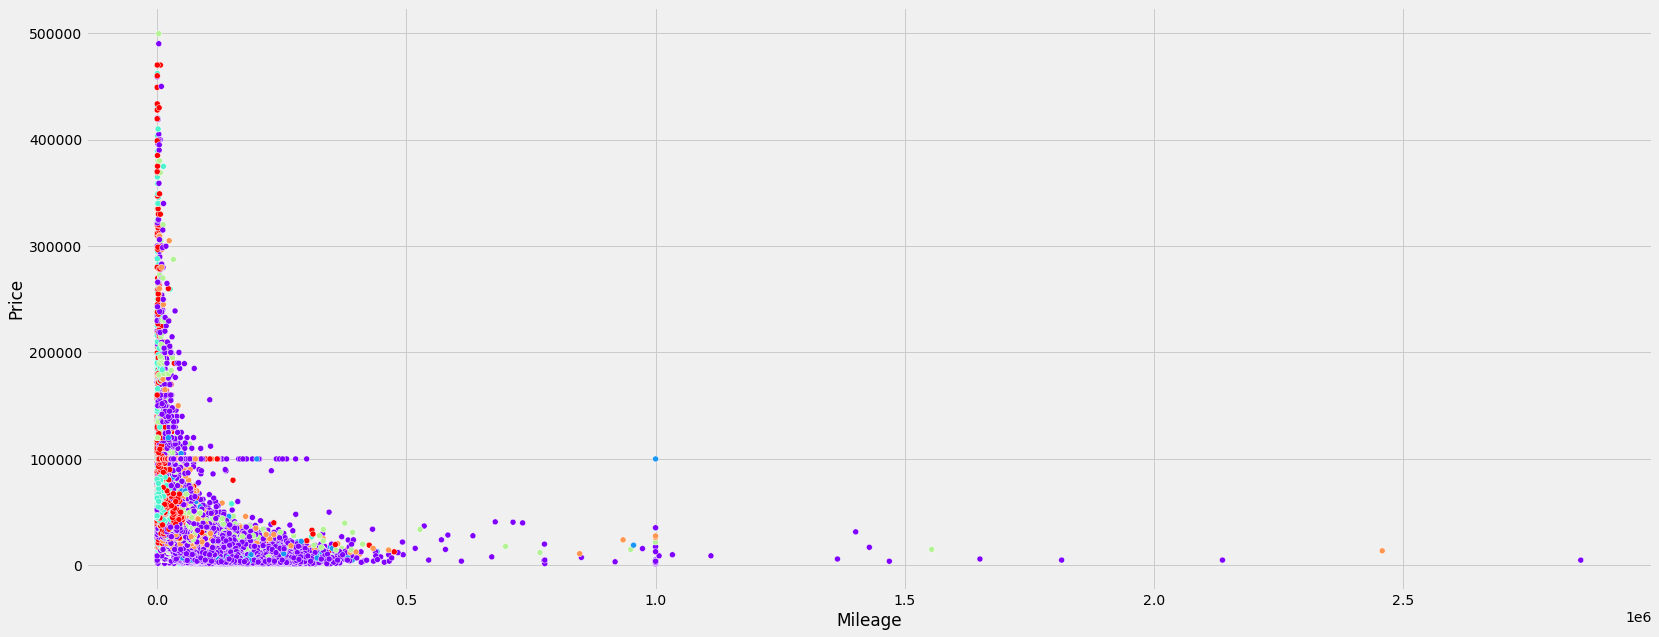

In [59]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=cluster_df,c=c_labels,cmap='rainbow',x='Mileage',y='Price')


<AxesSubplot:xlabel='Year', ylabel='Mileage'>

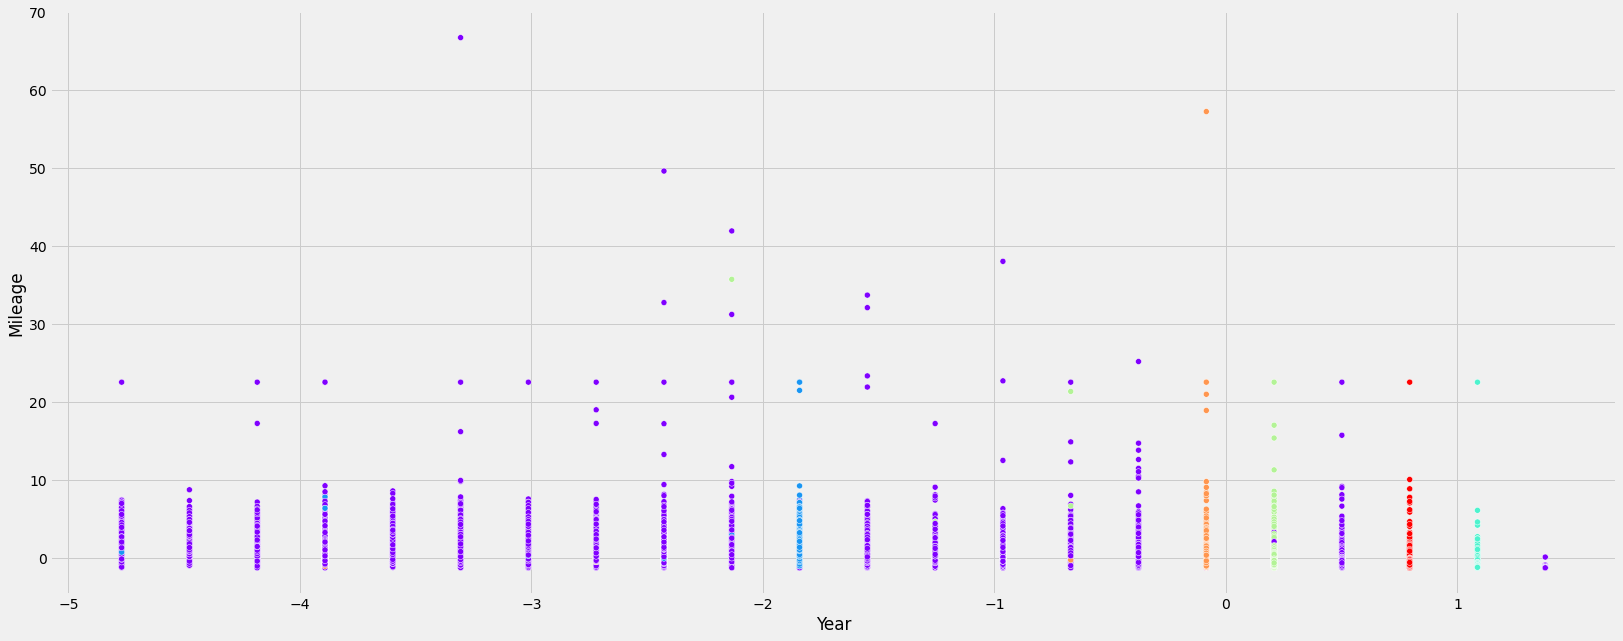

In [63]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=cluster_df_scaled,c=c_labels,cmap='rainbow',x='Year',y='Mileage')

Text(0.5, 1.0, 'Elbow curve')

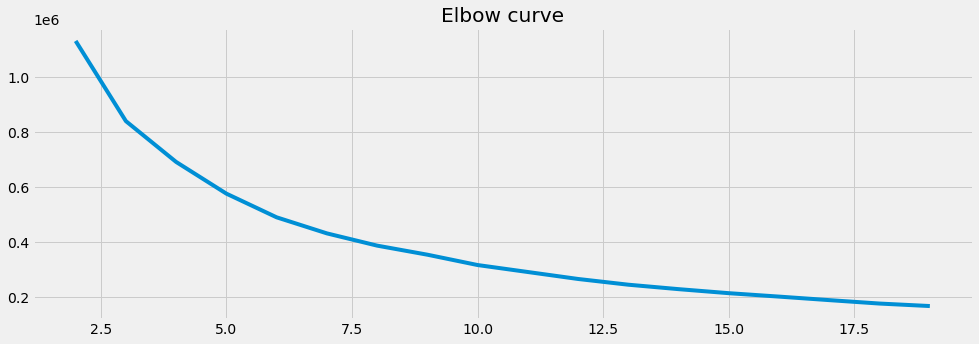

In [36]:
plt.style.use("fivethirtyeight")
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_df_scaled)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [21]:
n = 7
k_means = KMeans(n_clusters=n)
k_means.fit(cluster_df_scaled)

KMeans(n_clusters=7)

In [22]:
cluster_labels=k_means.labels_


In [23]:
dfcluster=pd.DataFrame(cluster_labels,columns=['Cluster'])

In [24]:
df_all=pd.concat([df,dfcluster],axis=1)

In [25]:
df_all

Price  Year  Mileage              City State                Vin  \
0        8995  2014    35725           El Paso    TX  19VDE2E53EE000083   
1       10888  2013    19606  Long Island City    NY  19VDE1F52DE012636   
2        8995  2013    48851           El Paso    TX  19VDE2E52DE000025   
3       10999  2014    39922           Windsor    CO  19VDE1F71EE003817   
4       14799  2016    22142            Lindon    UT  19UDE2F32GA001284   
...       ...   ...      ...               ...   ...                ...   
852117  63215  2017        9       Culver City    CA  YV1A22MK9H1013237   
852118  72260  2017     3201         Englewood    NJ  YV4A22PL3H1186162   
852119  55999  2016    28941      Fort Collins    CO  YV4A22PL4G1000868   
852120  60240  2017     3005       San Leandro    CA  YV4A22NLXH1006162   
852121  76995  2017     2502          New York    NY  YV4BC0ZX1H1109845   

         Make         Model Category  Cluster  
0       Acura    ILX6-Speed     Alta        0  
1       Acura    ILX5-Speed     Alta        6  
2       Acura    ILX6-Speed     Alta        4  
3       Acura    ILX5-Speed     Alta        0  
4       Acura  ILXAutomatic     Alta        3  
...       ...           ...      ...      ...  
852117  Volvo         S90T6     Alta        5  
852118  Volvo        XC90T6     Alta        5  
852119  Volvo       XC90AWD     Alta        2  
852120  Volvo           V90     Alta        5  
852121  Volvo        XC90T8     Alta        5  

[852122 rows x 10 columns]

In [26]:
df_all.loc[df_all['Cluster']==0].value_counts(['Make'])

Make         
Ford             22017
Chevrolet        18260
Nissan           14996
Toyota           14900
Hyundai          10946
Honda             9017
Dodge             7276
Jeep              6832
Kia               6442
Volkswagen        5701
BMW               4332
GMC               4253
Chrysler          4055
Mercedes-Benz     3946
Subaru            2722
Mazda             2551
Ram               2503
Lexus             2448
Cadillac          2109
Buick             1897
Audi              1774
INFINITI          1649
Acura             1453
Mitsubishi         982
Lincoln            872
MINI               743
Scion              651
Land               612
FIAT               585
Volvo              581
Porsche            365
HUMMER             250
Jaguar             220
smart              196
Pontiac            140
Mercury             55
Saturn              41
Suzuki              37
Maserati            22
Saab                14
Isuzu                1
Freightliner         1
Bentley             

In [27]:
df_all['Cluster'].value_counts()

4    193583
0    158448
6    146047
3    123606
1     96802
2     74223
5     59413
Name: Cluster, dtype: int64

<AxesSubplot:>

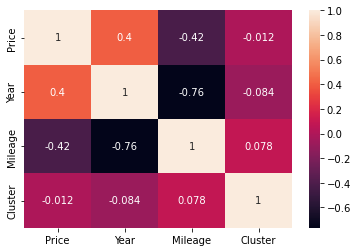

In [28]:
sns.heatmap(df_all.corr(),annot=True)

<AxesSubplot:>

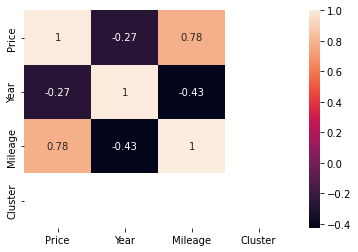

In [29]:
sns.heatmap(df_all.loc[df_all['Cluster']==0].corr(),annot=True)

<AxesSubplot:>

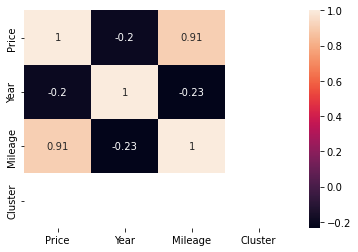

In [30]:
sns.heatmap(df_all.loc[df_all['Cluster']==1].corr(),annot=True)

<AxesSubplot:>

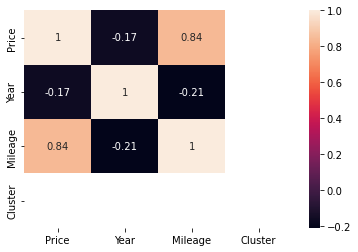

In [31]:
sns.heatmap(df_all.loc[df_all['Cluster']==2].corr(),annot=True)

<AxesSubplot:>

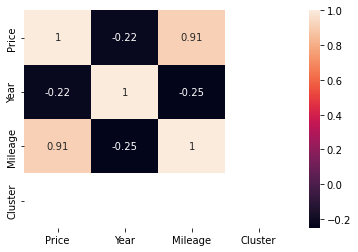

In [32]:
sns.heatmap(df_all.loc[df_all['Cluster']==3].corr(),annot=True)

<AxesSubplot:>

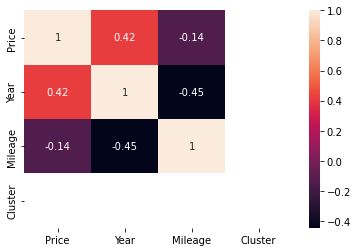

In [33]:
sns.heatmap(df_all.loc[df_all['Cluster']==4].corr(),annot=True)

In [34]:
df_all.loc[(df_all['Cluster']==0) & (df_all['Category']=='Lujo')]

Price  Year  Mileage          City State                Vin     Make  \
23881  34900  2006   103146  West Chester    PA  SCBBR53WX6C032248  Bentley   

             Model Category  Cluster  
23881  Continental     Lujo        0

In [38]:
df_all.loc[(df_all['Cluster']==1) & (df_all['Category']=='Lujo')]

Price  Year  Mileage           City State                Vin  \
11114    39828  2007    37828          Tempe    AZ  SCFBF03B67GC06126   
11124    46400  2009    29148    La Follette    TN  SCFBF04C19GD12137   
11127    45888  2007    28915     Costa Mesa    CA  SCFBF04B97GD06719   
11135    48880  2008    32550     Carrollton    TX  SCFBF03B98GC09037   
11137    48991  2007    38983         Denver    CO  SCFBF03B07GC06753   
...        ...   ...      ...            ...   ...                ...   
582521   64000  2008    55137         Irving    TX  WDBVF78J68A002236   
582523   63985  2004    58234  Downers Grove    IL  WDBVF78J64A000304   
582526   69995  2005    62576       Columbia    TN  WDBVF78J95A001254   
723917   86888  2004    62007      Hollywood    FL  SCA1S68444UX07410   
723921  109995  2010    69667        Waltham    MA  SCA664S55AUX48608   

               Make       Model Category  Cluster  
11114         Aston      Martin     Lujo        1  
11124         Aston      Martin     Lujo        1  
11127         Aston      Martin     Lujo        1  
11135         Aston      Martin     Lujo        1  
11137         Aston      Martin     Lujo        1  
...             ...         ...      ...      ...  
582521      Maybach       574dr     Lujo        1  
582523      Maybach       574dr     Lujo        1  
582526      Maybach       574dr     Lujo        1  
723917  Rolls-Royce  Phantom4dr     Lujo        1  
723921  Rolls-Royce    Ghost4dr     Lujo        1  

[70 rows x 10 columns]

In [39]:
df_all.loc[(df_all['Cluster']==2) & (df_all['Category']=='Lujo')]

Price  Year  Mileage              City State                Vin  \
11121    44950  2008    26996        Scottsdale    AZ  SCFBF04BX8GD08366   
11122    46950  2009    21967         St. Louis    MO  SCFBF03C69GC12701   
11123    43990  2006    24457              Reno    NV  SCFBB03B16GC00003   
11125    46000  2007    25623     Fredricksburg    VA  SCFBB03B87GC03496   
11128    45990  2006    25666  Lauderdale Lakes    FL  SCFBB03B16GC01653   
...        ...   ...      ...               ...   ...                ...   
723922  113975  2011    36241       South River    NJ  SCA664S52BUX50124   
723923  117999  2011    35747          Marrieta    GA  SCA664S55BUX49937   
723924  119000  2011    35788         Hollywood    FL  SCA664S52BUX49538   
723927  119999  2011    46545          Marrieta    GA  SCA664S51BUX50003   
723931  114985  2010    56256             Alsip    IL  SCA664S56AUX48858   

               Make     Model Category  Cluster  
11121         Aston    Martin     Lujo        2  
11122         Aston    Martin     Lujo        2  
11123         Aston    Martin     Lujo        2  
11125         Aston    Martin     Lujo        2  
11128         Aston    Martin     Lujo        2  
...             ...       ...      ...      ...  
723922  Rolls-Royce  Ghost4dr     Lujo        2  
723923  Rolls-Royce  Ghost4dr     Lujo        2  
723924  Rolls-Royce  Ghost4dr     Lujo        2  
723927  Rolls-Royce  Ghost4dr     Lujo        2  
723931  Rolls-Royce  Ghost4dr     Lujo        2  

[139 rows x 10 columns]

In [35]:
df_all.loc[(df_all['Cluster']==3) & (df_all['Category']=='Lujo')]

Price  Year  Mileage              City State                Vin  \
11112  37995  2008    44426            Dallas    TX  SCFBB04B58GD08769   
11115  38550  2007    53462           Bedford    OH  SCFBB03B27GC04465   
11117  39995  2008    53835            Warren    MI  SCFBB04B78GD10667   
11119  42994  2007    46863     Downers Grove    IL  SCFAD02A97GB07164   
11120  42988  2009    67500            Buford    GA  SCFBB04C69GD12260   
11132  45695  2006    49439          Evanston    IL  SCFAD01A26GA05981   
23879  36990  2006    53953  Lauderdale Lakes    FL  SCBBR53W56C033890   
23880  37975  2006    55586       South River    NJ  SCBBR53WX6C031973   
23882  39995  2006    53795            Dallas    TX  SCBBR53W76C036659   
23883  41888  2006    45140      Delray Beach    FL  SCBBR53W06C039791   
23884  40997  2007    60250   West Palm Beach    FL  SCBBR93W078044226   
23885  40995  2007    62272             Doral    FL  SCBBR93W378043992   
23888  42485  2006    45343   North Hollywood    CA  SCBBR53W06C031898   
23889  42947  2007    50914     Buffalo Grove    IL  SCBBR93W37C048686   
23891  42900  2006    55260           Cypress    TX  SCBBR53W46C036201   
23894  44495  2006    49210    Salt Lake City    UT  SCBBR53W06C037751   
23896  30888  2002    42818             Tempe    AZ  SCBLC31E02CX08057   
23898  45999  2006    55816          Marrieta    GA  SCBBR53W16C038262   
23904  49900  2008    70026       Los Angeles    CA  SCBBR93W58C052465   
23910  41999  2004    50516             Tempe    AZ  SCBCR63W54C021763   
23913  42499  2005    60415       Shelbyville    TN  SCBCR63WX5C027883   
23917  43595  2004    47661         Teterboro    NJ  SCBCR63WX4C021340   
23923  44888  2005    51017            Dublin    CA  SCBCR63W05C023857   
23924  51950  2006    78304        Scottsdale    AZ  SCBBR53W36C035010   
23926  54999  2008    64000          Marietta    GA  SCBBR93W08C052020   
23927  41500  2005    49184    Ft. Lauderdale    FL  SCBLF34F15CX10285   
23929  56999  2009    62173          Marrieta    GA  SCBBR93WX9C057923   
23931  57260  2009    73894     Pinellas Park    FL  SCBBP93W89C061247   
23938  47995  2005    57881       San Leandro    CA  SCBCR63W15C027335   
23945  45995  2007    56418          Marshall    VA  SCBBR93W67C046995   
23946  42400  2006    59991   Hialeah Gardens    FL  SCBCR63W56C030501   
23953  48995  2005    56136      Fayetteville    NC  SCBLC37F55CX10214   
23954  44986  2006    71098       Southborogh    MA  SCBCR63W26C037048   
23956  39995  2005    60986           Addison    TX  SCBCR63W45C025529   
23964  50000  2007    55609             Doral    FL  SCBCR73W17C045777   
23969  49995  2008    78518            Dallas    TX  SCBCR73W18C056067   
23978  53995  2008    59572            Dallas    TX  SCBDR33W88C056368   
23981  53990  2007    57320      Santa Monica    CA  SCBDR33W37C045518   
23987  55490  2008    61088      Santa Monica    CA  SCBCP73W08C056745   
23988  55995  2008    58289        Burr Ridge    IL  SCBDR33W18C051741   
23990  55000  2006    63094        El Cerrito    CA  SCBCR63W56C037674   
23995  56888  2007    61005     Redondo Beach    CA  SCBDR33W97C045703   
24005  60734  2008    66755             Hurst    TX  SCBCP73WX8C054677   
24021  51498  2007    58489        Carrollton    TX  SCBCR73W37C041035   
24056  76900  2006    81394              Aiea    HI  SCBCR63W36C035096   

          Make           Model Category  Cluster  
11112    Aston          Martin     Lujo        3  
11115    Aston          Martin     Lujo        3  
11117    Aston          Martin     Lujo        3  
11119    Aston          Martin     Lujo        3  
11120    Aston          Martin     Lujo        3  
11132    Aston          Martin     Lujo        3  
23879  Bentley     Continental     Lujo        3  
23880  Bentley     Continental     Lujo        3  
23882  Bentley     Continental     Lujo        3  
23883  Bentley     Continental     Lujo        3  
23884  Bentley     Continental     Lujo  

In [36]:
df_all.loc[(df_all['Cluster']==4) & (df_all['Category']=='Lujo')]


Empty DataFrame
Columns: [Price, Year, Mileage, City, State, Vin, Make, Model, Category, Cluster]
Index: []

In [40]:
df_all.loc[(df_all['Cluster']==5) & (df_all['Category']=='Lujo')]

Price  Year  Mileage               City State                Vin  \
11118    45900  2008    10800    Rolling Meadows    IL  SCFBF03B88GC09742   
11126    46995  2006     6875   Saratoga Springs    NY  SCFBB03B06GC02860   
11129    48995  2008     7412       Temple Hills    MD  SCFBF03BX8GC08902   
11134    51986  2008     7811           Bellevue    WA  SCFBF04B08GD08781   
11141    52500  2008    13122  Hasbrouck Heights    NJ  SCFBF04B18GD09731   
...        ...   ...      ...                ...   ...                ...   
724004  339951  2017     1736    West Palm Beach    FL  SCA666D58HU102806   
724005  339888  2015    12869         Costa Mesa    CA  SCA682D57FUX75327   
724006  358880  2015     3694    Fort Lauderdale    FL  SCA682D58FUX96509   
724007  379995  2014     4798             Dallas    TX  SCA681S53EUX73070   
724008  429888  2016     4047           New York    NY  SCA682D55GUX75375   

               Make            Model Category  Cluster  
11118         Aston           Martin     Lujo        5  
11126         Aston           Martin     Lujo        5  
11129         Aston           Martin     Lujo        5  
11134         Aston           Martin     Lujo        5  
11141         Aston           Martin     Lujo        5  
...             ...              ...      ...      ...  
724004  Rolls-Royce  DawnConvertible     Lujo        5  
724005  Rolls-Royce          Phantom     Lujo        5  
724006  Rolls-Royce          Phantom     Lujo        5  
724007  Rolls-Royce     PhantomSedan     Lujo        5  
724008  Rolls-Royce          Phantom     Lujo        5  

[865 rows x 10 columns]

In [42]:
df_all.loc[(df_all['Cluster']==6) & (df_all['Category']=='Lujo')]

Price  Year  Mileage           City State                Vin     Make  \
11113  35000  2005    68173      Charlotte    NC  SCFAD01A35GA02442    Aston   
11116  38000  2006    66665  Downers Grove    IL  SCFBB03B66GC01356    Aston   
23886  38988  2006    79797         Denver    NC  SCBBR53W16C035538  Bentley   
23887  40440  2006    67806      Chantilly    VA  SCBBR53WX68036741  Bentley   
23899  43995  2006    85174  Thousand Oaks    CA  SCBBR53W568038266  Bentley   
23903  39450  2005    64646           Brea    CA  SCBCR63W95C027924  Bentley   
23908  40928  2005    71221          Tempe    AZ  SCBCR63W95C024473  Bentley   
23934  39856  2006    74752    Garden City    GA  SCBCR63W16C036649  Bentley   
23937  44987  2005    92364     Sacremento    CA  SCBCR63W95C023999  Bentley   
23952  44890  2007    73675      Chantilly    VA  SCBCR73W87C044870  Bentley   
23996  54990  2008    92704     Villa Park    IL  SCBDR33W58C052763  Bentley   

                Model Category  Cluster  
11113          Martin     Lujo        6  
11116          Martin     Lujo        6  
23886     Continental     Lujo        6  
23887     Continental     Lujo        6  
23899     Continental     Lujo        6  
23903  Continental2dr     Lujo        6  
23908  Continental2dr     Lujo        6  
23934     Continental     Lujo        6  
23937  Continental2dr     Lujo        6  
23952     Continental     Lujo        6  
23996     Continental     Lujo        6

In [37]:
df_all.loc[(df_all['Cluster']==1) & (df_all['Category']=='Media')]

Price  Year  Mileage           City State                Vin  \
56673   12995  2013    13325  National City    CA  1G4PP5SK9D4188694   
56676   16000  2017    12839       Columbus    GA  1G4PR5SK1H4116131   
56677   14000  2015    12732       Delaware    OH  1G4PR5SK7F4109732   
56678   15329  2017    15320     Union City    GA  1G4PR5SK4H4111263   
56703   13788  2014    10840          Parma    OH  1G4PP5SK3E4191950   
...       ...   ...      ...            ...   ...                ...   
846964  37000  2015    31479          Miami    FL  WVGEF9BP1FD003232   
846973  28940  2013    20608         Auburn    WA  WVWRF7AJ8DW046619   
846979  24999  2015    24973          Colma    CA  3VW2A7AU1FM018221   
846988  34028  2016    30000       Valencia    CA  WVWUF7AU0GW021786   
847007  33988  2016    22472   White Plains    NY  WVWLF7AUXGW097589   

              Make              Model Category  Cluster  
56673        Buick       VeranoVerano    Media        1  
56676        Buick        VeranoSport    Media        1  
56677        Buick  VeranoConvenience    Media        1  
56678        Buick        VeranoSport    Media        1  
56703        Buick       VeranoVerano    Media        1  
...            ...                ...      ...      ...  
846964  Volkswagen          TouaregV6    Media        1  
846973  Volkswagen               Golf    Media        1  
846979  Volkswagen         Golf4-Door    Media        1  
846988  Volkswagen               Golf    Media        1  
847007  Volkswagen               Golf    Media        1  

[66104 rows x 10 columns]

In [58]:
df_all.loc[(df_all['Cluster']==1) & (df_all['Category']=='Alta')]

Price  Year  Mileage               City State                Vin  \
0        8995  2014    35725            El Paso    TX  19VDE2E53EE000083   
2        8995  2013    48851            El Paso    TX  19VDE2E52DE000025   
5        7989  2012   105246              Miami    FL  JH4CU2F83CC019895   
8       10495  2013    57596          Waterbury    CT  19VDE2E50DE000234   
9        9995  2013    63887            El Paso    TX  19VDE1F50DE010450   
...       ...   ...      ...                ...   ...                ...   
851785   3998  2006   204001           Marietta    GA  YV4CY592861284131   
851804   5000  1999   149857          Bremerton    WA  YV1LW55A2X2566891   
851925   3111  2001   202691             Odessa    TX  YV1SW61R512089006   
852012   5995  2003   144538  Fort Walton Beach    FL  YV1SZ59H831096165   
852070  30995  2014   392123             Berwyn    PA  YV4902DZ8E2543908   

         Make         Model Category  Cluster  
0       Acura    ILX6-Speed     Alta        1  
2       Acura    ILX6-Speed     Alta        1  
5       Acura  TSXAutomatic     Alta        1  
8       Acura    ILX6-Speed     Alta        1  
9       Acura    ILX5-Speed     Alta        1  
...       ...           ...      ...      ...  
851785  Volvo      XC902.5L     Alta        1  
851804  Volvo          V70A     Alta        1  
851925  Volvo        V702.4     Alta        1  
852012  Volvo        V705dr     Alta        1  
852070  Volvo        XC60T6     Alta        1  

[45988 rows x 10 columns]

In [43]:
# coordinates of cluster center
centroids = k_means.cluster_centers_ 

In [92]:
centroids=pd.DataFrame(centroids,columns=cluster_df_scaled.columns)
centroids

Price      Year   Mileage
0  0.271239  0.035363  0.960465
1  0.767490  0.060181  0.634076
2  0.903427  0.062791  0.416101
3  0.607696  0.054627  0.789740
4  0.103027  0.019990  0.993322
5  0.984130  0.062017  0.139169
6  0.438928  0.047020  0.895514

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

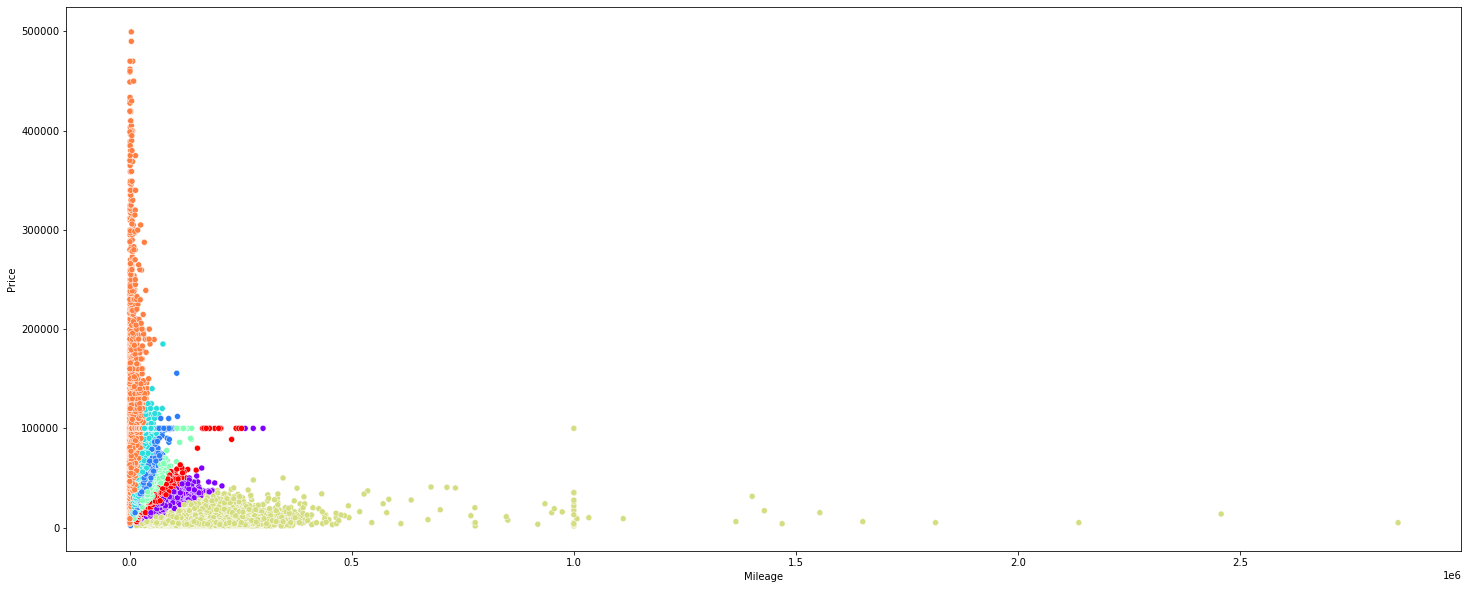

In [84]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=cluster_df,c=cluster_labels,cmap='rainbow',x='Mileage',y='Price')

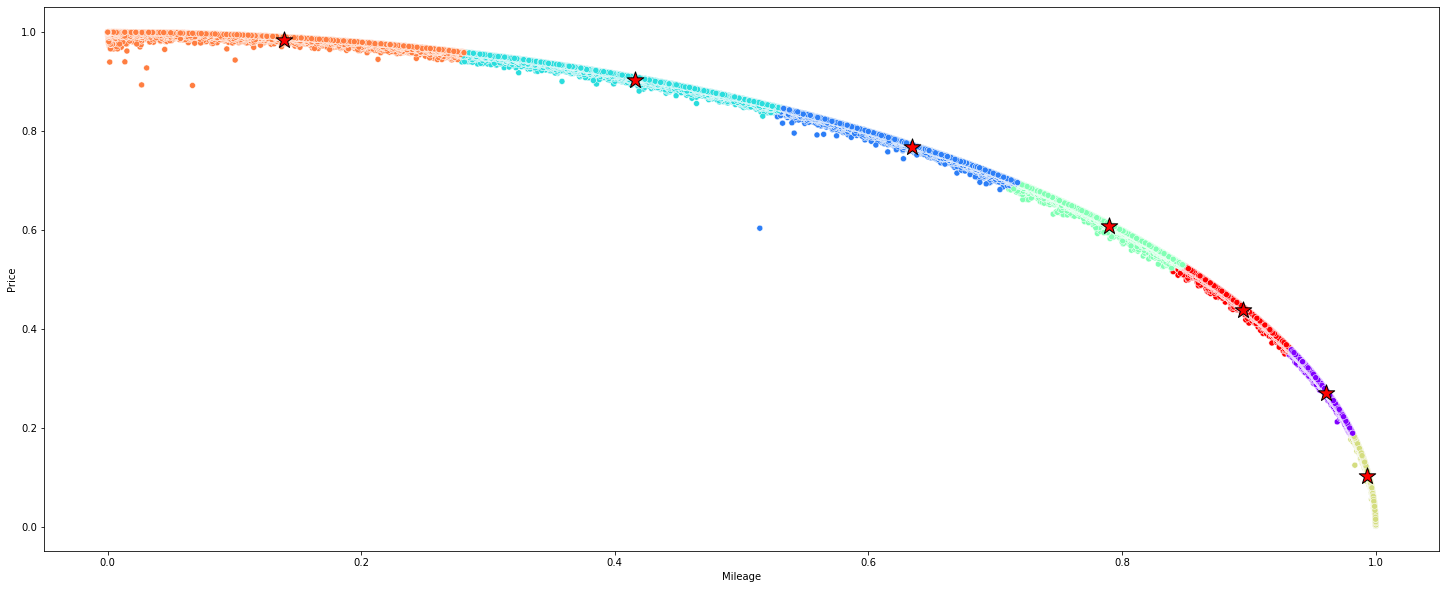

In [95]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=cluster_df_scaled,c=cluster_labels,cmap='rainbow',x='Mileage',y='Price')
# visualise centroids
plt.scatter(
    y=centroids.Price, x=centroids.Mileage,
    s=300, marker='*',
    c='red', edgecolor='black'
)

<AxesSubplot:xlabel='Year', ylabel='Price'>

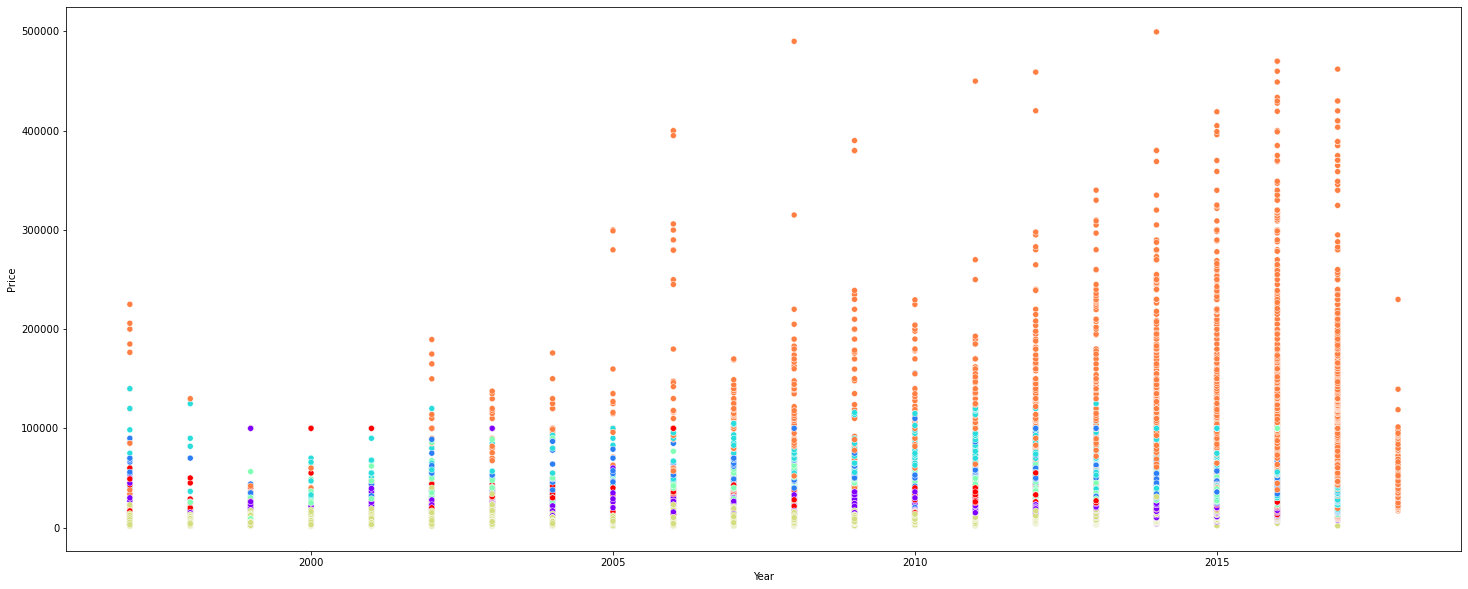

In [86]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=cluster_df,c=cluster_labels,cmap='rainbow',x='Year',y='Price')

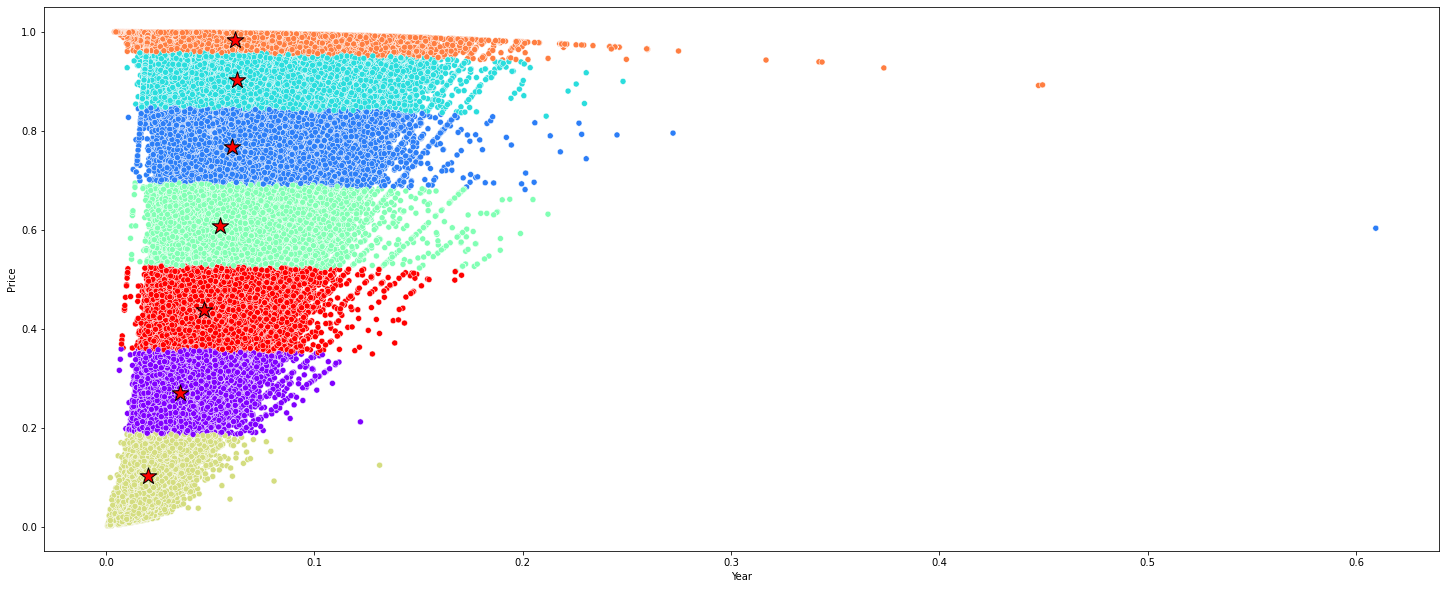

In [96]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=cluster_df_scaled,c=cluster_labels,cmap='rainbow',x='Year',y='Price')
plt.scatter(
    y=centroids.Price, x=centroids.Year,
    s=300, marker='*',
    c='red', edgecolor='black'
)

In [61]:
df_all.loc[df_all['Cluster']==0]

Price  Year  Mileage              City State                Vin  \
0        8995  2014    35725           El Paso    TX  19VDE2E53EE000083   
3       10999  2014    39922           Windsor    CO  19VDE1F71EE003817   
10      12921  2012    58550             Boise    ID  JH4CU2F44CC003220   
11      12000  2013    40527  Long Island City    NY  19VDE1F38DE020867   
23      13999  2013    38343             Derby    CT  JH4CU2F45DC013160   
...       ...   ...      ...               ...   ...                ...   
851542  21999  2011    79847          Syracuse    NY  YV4902BZ4B1099771   
851557  24000  2013    67696            Summit    NJ  YV4940BZ8D1163628   
851582  22995  2014    65095          New York    NY  YV4902DZ8E2550583   
851610  23995  2015    67749          Manassas    VA  YV4940RB0F2613164   
851640  24423  2014    71973      Narragansett    RI  YV4902DZ4E2526135   

         Make         Model Category  Cluster  
0       Acura    ILX6-Speed     Alta        0  
3       Acura    ILX5-Speed     Alta        0  
10      Acura  TSXAutomatic     Alta        0  
11      Acura    ILX5-Speed     Alta        0  
23      Acura    TSX5-Speed     Alta        0  
...       ...           ...      ...      ...  
851542  Volvo        XC70T6     Alta        0  
851557  Volvo       XC703.2     Alta        0  
851582  Volvo        XC60T6     Alta        0  
851610  Volvo      XC603.2L     Alta        0  
851640  Volvo        XC60T6     Alta        0  

[158448 rows x 10 columns]

Correclacion con las categorias 

# DBScan

In [62]:
cluster_df

Price  Year  Mileage
0        8995  2014    35725
1       10888  2013    19606
2        8995  2013    48851
3       10999  2014    39922
4       14799  2016    22142
...       ...   ...      ...
852117  63215  2017        9
852118  72260  2017     3201
852119  55999  2016    28941
852120  60240  2017     3005
852121  76995  2017     2502

[852122 rows x 3 columns]

<AxesSubplot:title={'center':'% Year'}, ylabel='Year'>

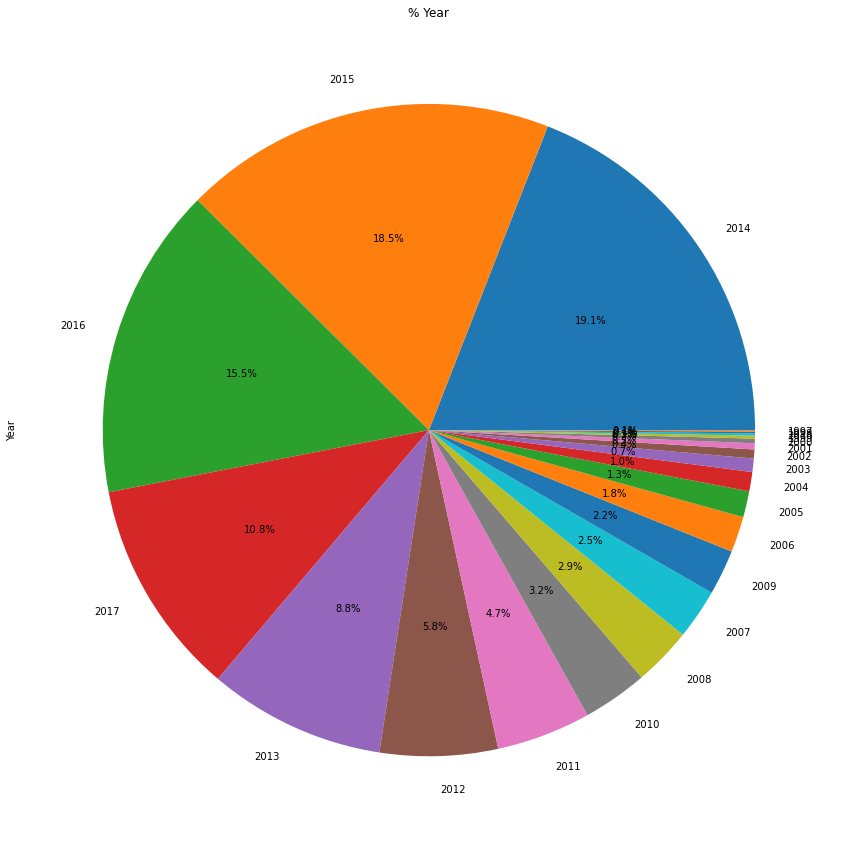

In [63]:
cluster_df['Year'].value_counts().plot.pie(figsize=(15, 15),autopct='%1.1f%%',title='% Year')

In [6]:
cluster_df=df.drop(columns=['City', 'State', 'Vin','Model','Make'])

In [7]:
cluster_df['Year']

0         2014
1         2013
2         2013
3         2014
4         2016
          ... 
852117    2017
852118    2017
852119    2016
852120    2017
852121    2017
Name: Year, Length: 852122, dtype: int64

In [10]:
cluster_df = cluster_df.drop(cluster_df[(cluster_df.Year < 2018)].index)

In [11]:
cluster_df.Year.value_counts()

2018    922
Name: Year, dtype: int64

In [70]:
cluster_df=cluster_df.drop(columns=['Year'])

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

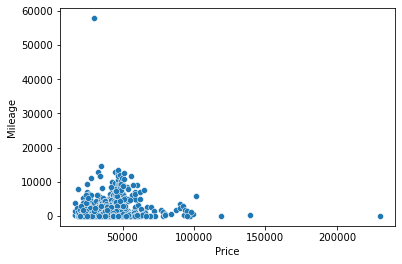

In [71]:
sns.scatterplot(data=cluster_df,x='Price',y='Mileage')

In [72]:
cluster_df_scaled=std.fit_transform(cluster_df)

In [73]:
cluster_df_scaled

array([[-0.38409681, -0.53971494],
       [-0.36521958, -0.53971494],
       [-0.36521958, -0.53971494],
       ...,
       [ 0.687237  , -0.53185726],
       [ 0.7481313 , -0.5381434 ],
       [ 1.68082908, -0.53688617]])

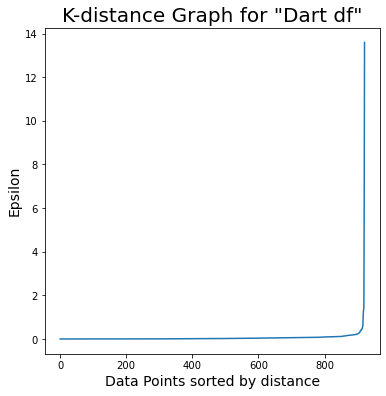

In [74]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(cluster_df_scaled)
distances, indices = nbrs.kneighbors(cluster_df_scaled)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6,6))
plt.plot(distances)
plt.title('K-distance Graph for "Dart df"',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [126]:
# Training model
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=2, metric='euclidean')

In [127]:
dbscan=dbscan.fit(cluster_df_scaled)

In [128]:
dbscan_labels=dbscan.labels_

In [129]:
df2019=df.drop(df[(df.Year < 2018)].index)

In [130]:
df2019=df2019.reset_index(drop=True)

In [131]:
df2019.Make.value_counts()

BMW              165
Cadillac         101
Mercedes-Benz    101
Chevrolet         89
Acura             73
Audi              70
Kia               64
Ford              57
Toyota            54
Honda             37
Subaru            20
Volkswagen        15
Hyundai           15
Volvo             13
Jaguar            11
Lexus             11
Jeep               5
MINI               5
Porsche            4
Dodge              3
INFINITI           3
Alfa               2
Genesis            2
Land               1
GMC                1
Name: Make, dtype: int64

In [132]:
df2019

Price  Year  Mileage               City State                Vin   Make  \
0    35721  2018        5          Littleton    CO  5J8TB4H37JL004139  Acura   
1    36000  2018        5          Littleton    CO  5J8TB4H37JL005209  Acura   
2    36000  2018        5          Littleton    CO  5J8TB4H34JL003045  Acura   
3    32995  2018      250           Cerritos    CA  19UUB1F30JA004453  Acura   
4    33929  2018      239    Hoffman Estates    IL  19UUB1F55JA000321  Acura   
..     ...   ...      ...                ...   ...                ...    ...   
917  59997  2018      248         Charleston    SC  YV4A22PL9J1207795  Volvo   
918  46885  2018       15  Hasbrouck Heights    NJ  YV440MWK2J2044182  Volvo   
919  51555  2018       30          Englewood    NJ  YV4102RL1J1004130  Volvo   
920  52455  2018       10  Hasbrouck Heights    NJ  YV4A22RK8J1005471  Volvo   
921  66240  2018       14           Nazareth    PA  LVY992ML7JP006733  Volvo   

      Model  
0    RDXAWD  
1    RDXAWD  
2    RDXAWD  
3    TLXFWD  
4    TLXFWD  
..      ...  
917  XC90T6  
918     V60  
919  XC60T5  
920  XC60T6  
921   S90T6  

[922 rows x 8 columns]

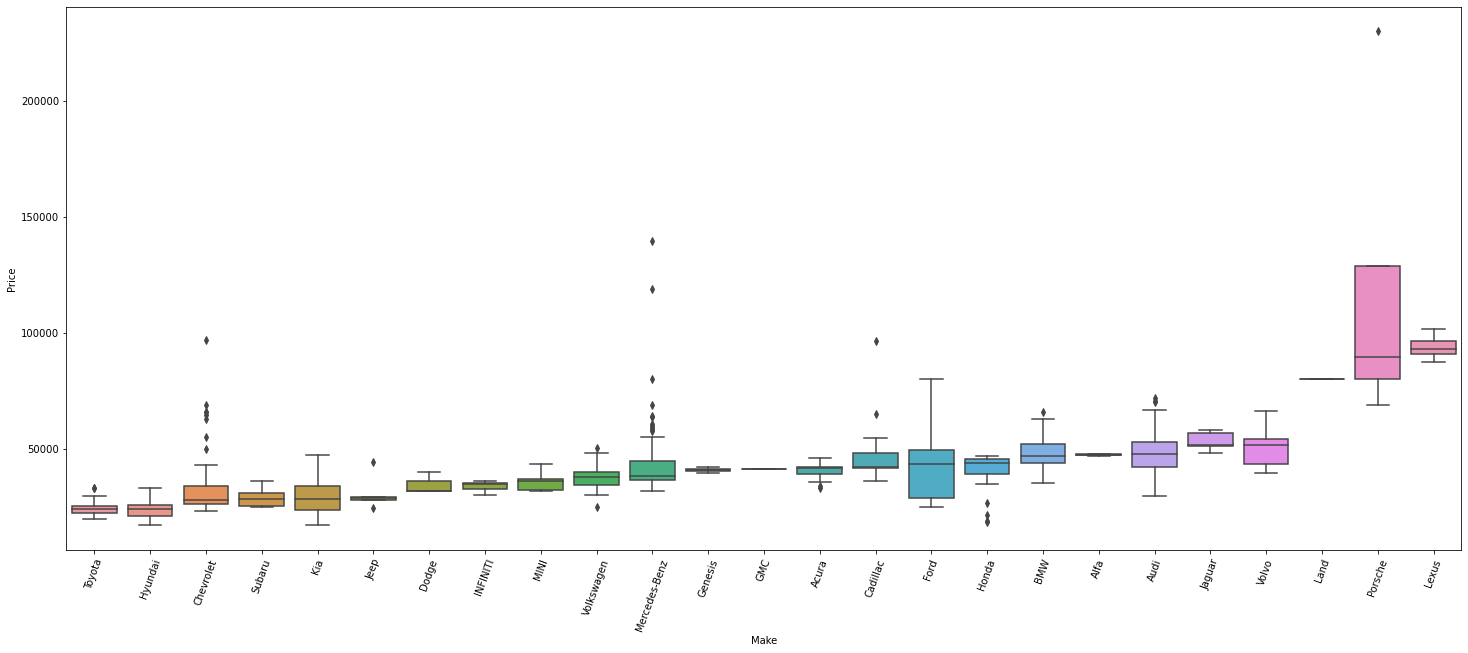

In [94]:
plt.figure(figsize=(25,10))
sorted_nb = df2019.groupby(['Make'])['Price'].median().sort_values()
sns.boxplot(x=df2019['Make'], y=df2019['Price'], order=list(sorted_nb.index))
plt.xticks(rotation=70);

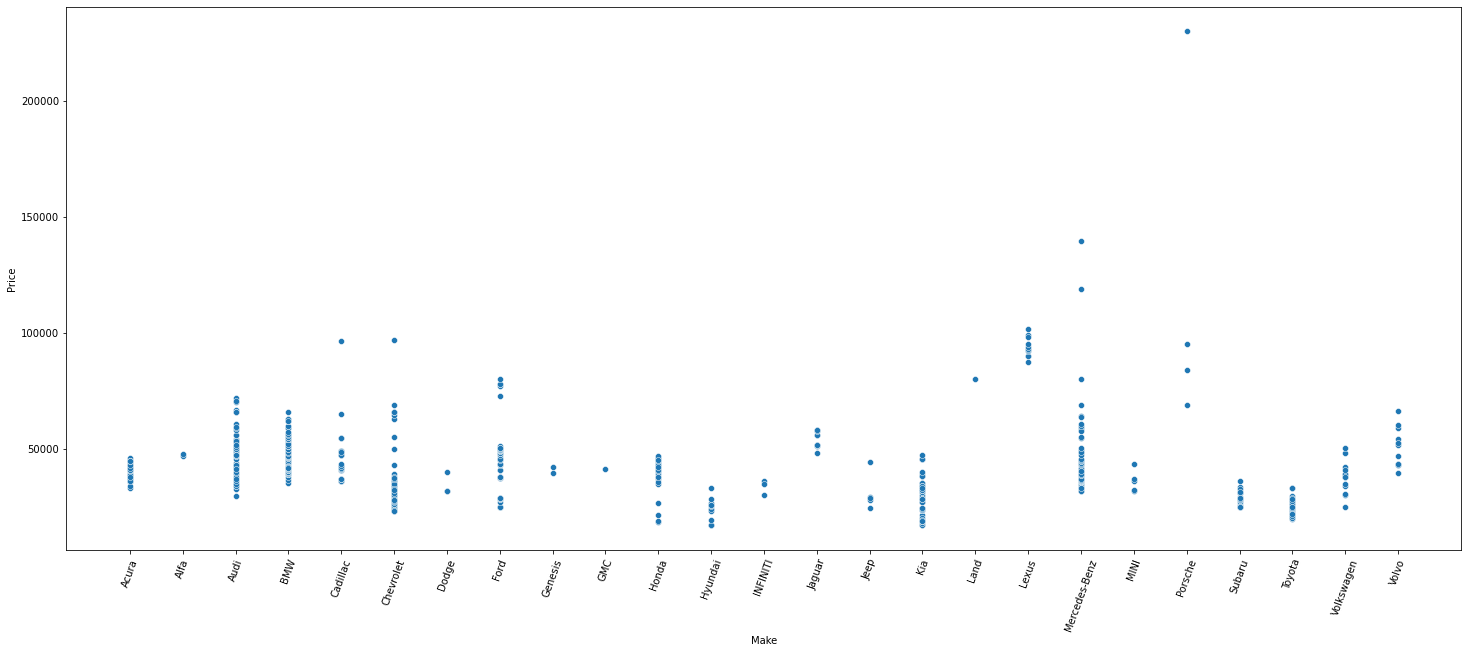

In [96]:
plt.figure(figsize=(25,10))
sorted_nb = df2019.groupby(['Make'])['Price'].median().sort_values()
sns.scatterplot(x=df2019['Make'], y=df2019['Price'])
plt.xticks(rotation=70);

In [133]:
dfcluster_dbscan=pd.DataFrame(dbscan_labels,columns=['Cluster'])
dfcluster_dbscan=dfcluster_dbscan.reset_index(drop=True)


In [134]:
df_all=pd.concat([df2019,dfcluster_dbscan],axis=1)

In [135]:
df_all.Cluster.value_counts()

 0    920
-1      2
Name: Cluster, dtype: int64

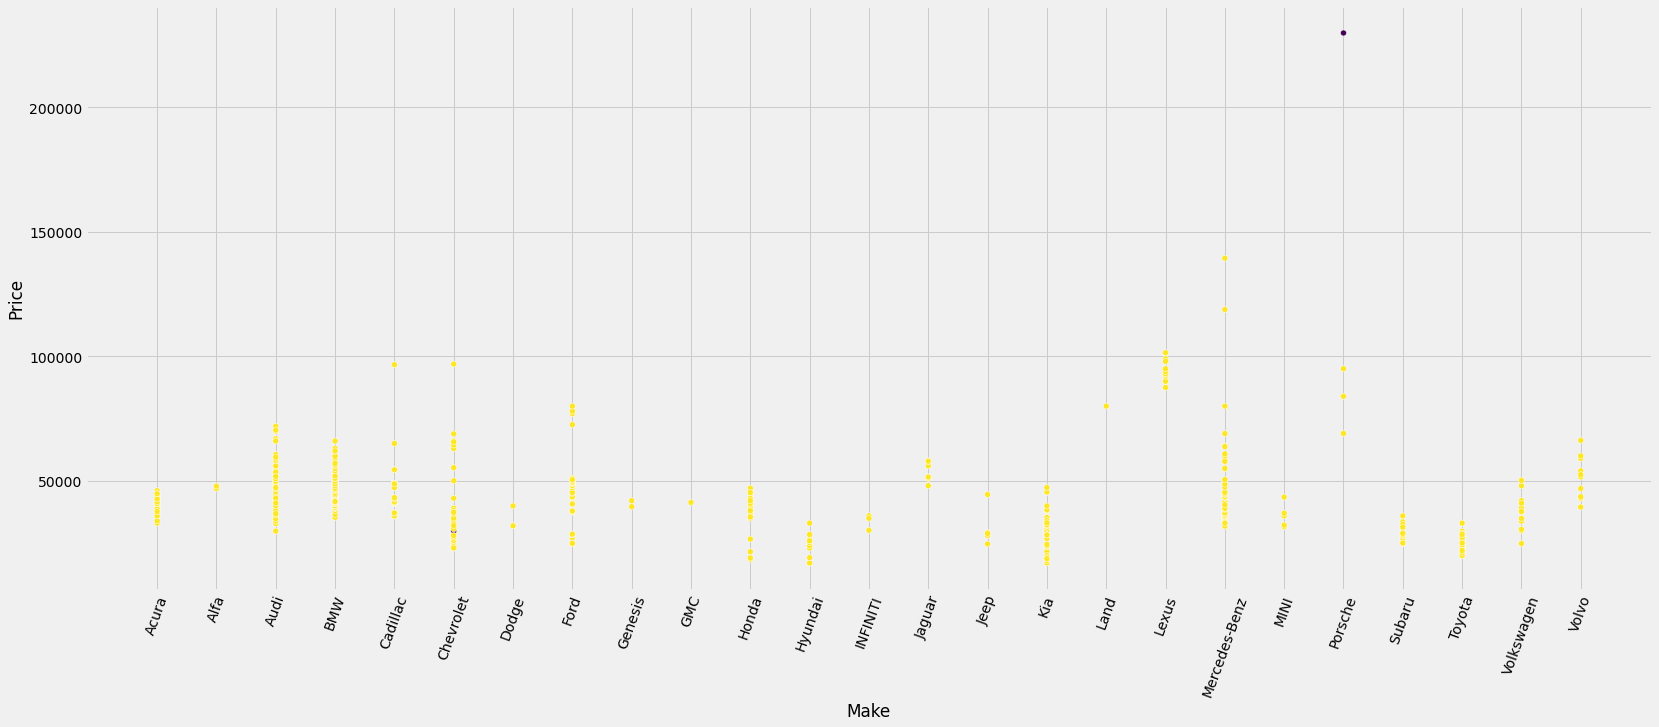

In [138]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=df_all['Make'], y=df_all['Price'],c=df_all['Cluster'])
plt.xticks(rotation=70);

# GMM

In [64]:
cluster_df_scaled

Price      Year   Mileage
0       0.243800  0.054587  0.968288
1       0.483555  0.089401  0.870737
2       0.180939  0.040492  0.982660
3       0.265302  0.048579  0.962941
4       0.554094  0.075482  0.829025
...          ...       ...       ...
852117  0.999491  0.031891  0.000142
852118  0.998632  0.027875  0.044238
852119  0.887919  0.031966  0.458888
852120  0.998200  0.033422  0.049794
852121  0.999130  0.026174  0.032467

[852122 rows x 3 columns]

In [111]:
from sklearn.mixture import GaussianMixture
from sklearn import mixture

In [118]:
np.arange(1, 20,4)

array([ 1,  5,  9, 13, 17])

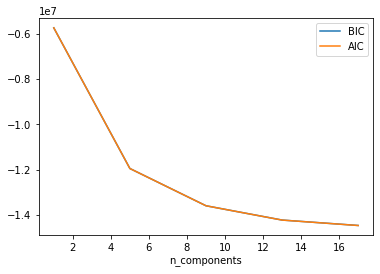

In [119]:
n_components = np.arange(1, 20,4)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(cluster_df_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(cluster_df_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(cluster_df_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [120]:
# Training model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=15)
y_GMM = gmm.fit(cluster_df_scaled)

In [121]:
y_GMM= gmm.predict(cluster_df_scaled)

In [99]:

# We called the df, that's why we need to refer to previous df to add cluster numbers
df_GMM = df.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_GMM['Cluster'] = y_GMM
df_GMM['Cluster'].value_counts()

2     115458
8     105433
5      97666
10     95853
0      88167
6      80615
3      71572
7      61661
1      51303
9      43724
4      40670
Name: Cluster, dtype: int64

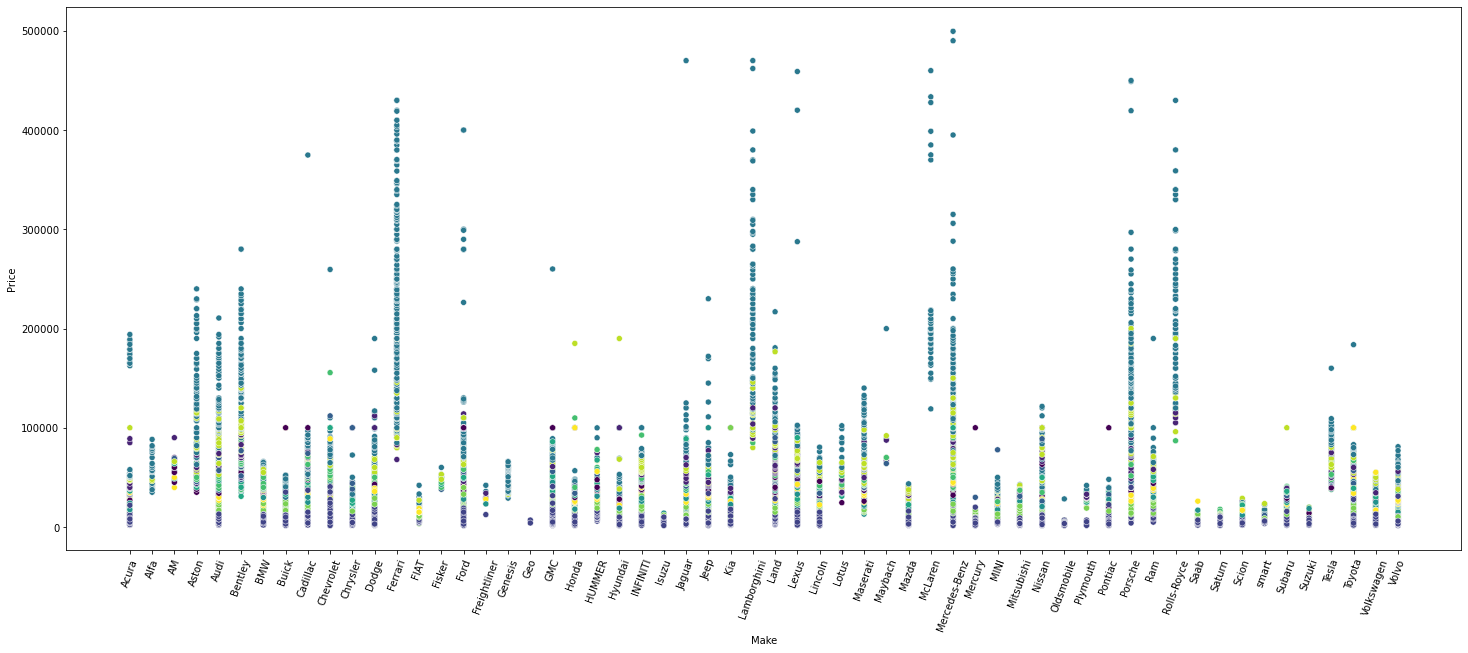

In [122]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=df_GMM['Make'], y=df_GMM['Price'],c=df_GMM['Cluster'])
plt.xticks(rotation=70);


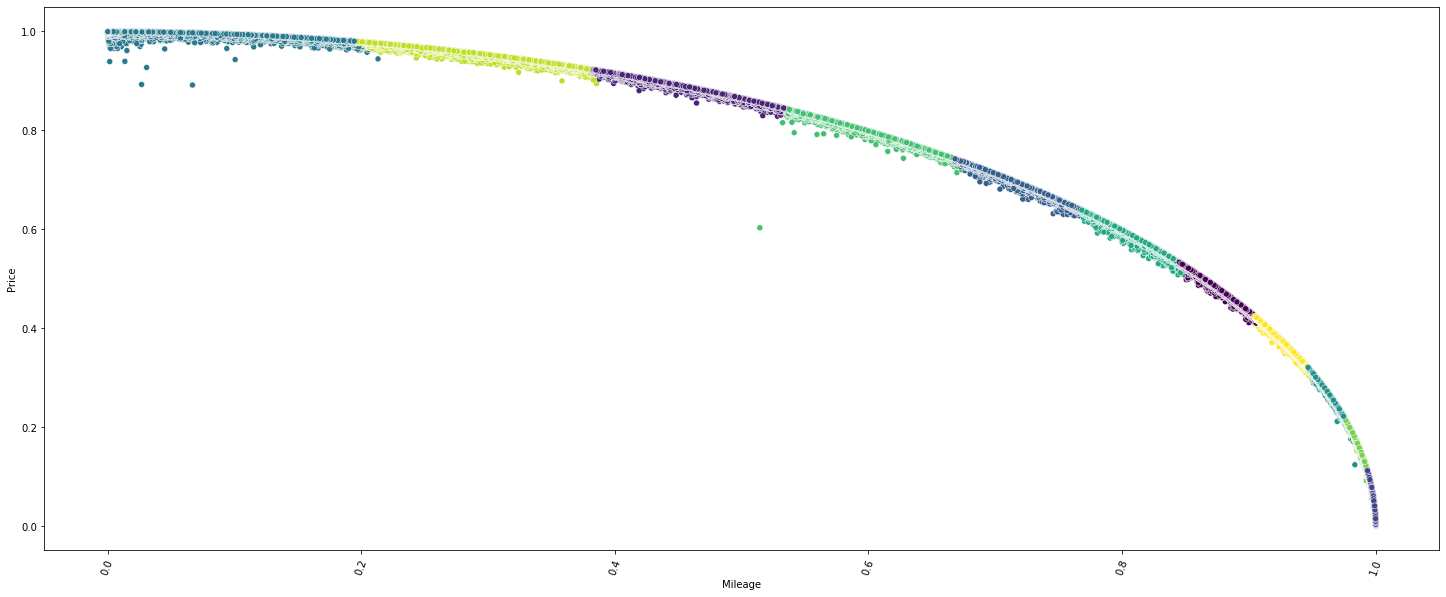

In [123]:
plt.figure(figsize=(25,10))
sns.scatterplot(y=cluster_df_scaled['Price'], x=cluster_df_scaled['Mileage'],c=df_GMM['Cluster'])
plt.xticks(rotation=70);

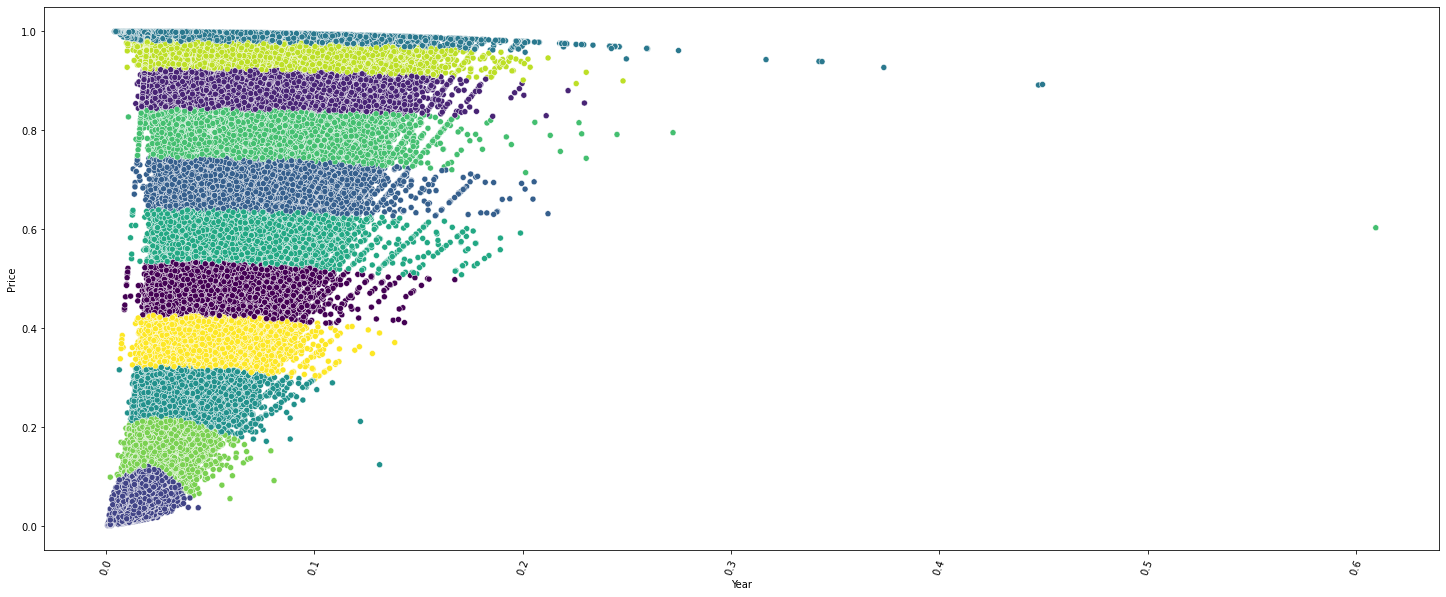

In [124]:

plt.figure(figsize=(25,10))
sns.scatterplot(y=cluster_df_scaled['Price'], x=cluster_df_scaled['Year'],c=df_GMM['Cluster'])
plt.xticks(rotation=70);

In [187]:

df_GMM.loc[(df_GMM['Cluster']==1) & (df_GMM['Category']=='Lujo')]

Price  Year  Mileage           City State                Vin  \
11121    44950  2008    26996     Scottsdale    AZ  SCFBF04BX8GD08366   
11122    46950  2009    21967      St. Louis    MO  SCFBF03C69GC12701   
11123    43990  2006    24457           Reno    NV  SCFBB03B16GC00003   
11124    46400  2009    29148    La Follette    TN  SCFBF04C19GD12137   
11125    46000  2007    25623  Fredricksburg    VA  SCFBB03B87GC03496   
...        ...   ...      ...            ...   ...                ...   
582524   69800  2009    37393          Miami    FL  WDBVF78J19A002565   
582528   87500  2008    40773       New York    NY  WDBVF79J58A002436   
723919  104990  2007    48121       Marietta    GA  SCA1S68587UX08444   
723921  109995  2010    69667        Waltham    MA  SCA664S55AUX48608   
723931  114985  2010    56256          Alsip    IL  SCA664S56AUX48858   

               Make       Model Category  Cluster  
11121         Aston      Martin     Lujo        1  
11122         Aston      Martin     Lujo        1  
11123         Aston      Martin     Lujo        1  
11124         Aston      Martin     Lujo        1  
11125         Aston      Martin     Lujo        1  
...             ...         ...      ...      ...  
582524      Maybach       574dr     Lujo        1  
582528      Maybach      57S4dr     Lujo        1  
723919  Rolls-Royce  Phantom4dr     Lujo        1  
723921  Rolls-Royce    Ghost4dr     Lujo        1  
723931  Rolls-Royce    Ghost4dr     Lujo        1  

[83 rows x 10 columns]

In [127]:
df_GMM.loc[(df_GMM['Cluster']==1) & (df_GMM['Category']=='Lujo')]

Price  Year  Mileage           City State                Vin  \
11121    44950  2008    26996     Scottsdale    AZ  SCFBF04BX8GD08366   
11122    46950  2009    21967      St. Louis    MO  SCFBF03C69GC12701   
11123    43990  2006    24457           Reno    NV  SCFBB03B16GC00003   
11124    46400  2009    29148    La Follette    TN  SCFBF04C19GD12137   
11125    46000  2007    25623  Fredricksburg    VA  SCFBB03B87GC03496   
...        ...   ...      ...            ...   ...                ...   
582524   69800  2009    37393          Miami    FL  WDBVF78J19A002565   
582528   87500  2008    40773       New York    NY  WDBVF79J58A002436   
723919  104990  2007    48121       Marietta    GA  SCA1S68587UX08444   
723921  109995  2010    69667        Waltham    MA  SCA664S55AUX48608   
723931  114985  2010    56256          Alsip    IL  SCA664S56AUX48858   

               Make       Model Category  Cluster  
11121         Aston      Martin     Lujo        1  
11122         Aston      Martin     Lujo        1  
11123         Aston      Martin     Lujo        1  
11124         Aston      Martin     Lujo        1  
11125         Aston      Martin     Lujo        1  
...             ...         ...      ...      ...  
582524      Maybach       574dr     Lujo        1  
582528      Maybach      57S4dr     Lujo        1  
723919  Rolls-Royce  Phantom4dr     Lujo        1  
723921  Rolls-Royce    Ghost4dr     Lujo        1  
723931  Rolls-Royce    Ghost4dr     Lujo        1  

[83 rows x 10 columns]

In [129]:
df_GMM.loc[(df_GMM['Cluster']==3) & (df_GMM['Category']=='Lujo')]

Price  Year  Mileage              City State                Vin  \
11112   37995  2008    44426            Dallas    TX  SCFBB04B58GD08769   
11114   39828  2007    37828             Tempe    AZ  SCFBF03B67GC06126   
11119   42994  2007    46863     Downers Grove    IL  SCFAD02A97GB07164   
11132   45695  2006    49439          Evanston    IL  SCFAD01A26GA05981   
23883   41888  2006    45140      Delray Beach    FL  SCBBR53W06C039791   
23888   42485  2006    45343   North Hollywood    CA  SCBBR53W06C031898   
23889   42947  2007    50914     Buffalo Grove    IL  SCBBR93W37C048686   
23890   43988  2006    41147            Denver    NC  SCBBR53W66C034918   
23894   44495  2006    49210    Salt Lake City    UT  SCBBR53W06C037751   
23900   47990  2007    48259      Indianapolis    IN  SCBBR93W67C047399   
23905   37499  2004    34345         Hollywood    FL  SCBLF34F04CX09871   
23907   42990  2005    40946            Duluth    GA  SCBCR63W85C029504   
23916   41000  2006    39174         Frederick    MD  SCBLF34F86CX11418   
23917   43595  2004    47661         Teterboro    NJ  SCBCR63WX4C021340   
23918   44999  2005    44515  West Bridgewater    MA  SCBCR63W35C026106   
23920   53900  2007    53139           Memphis    TN  SCBBR93W07C049097   
23923   44888  2005    51017            Dublin    CA  SCBCR63W05C023857   
23926   54999  2008    64000          Marietta    GA  SCBBR93W08C052020   
23927   41500  2005    49184    Ft. Lauderdale    FL  SCBLF34F15CX10285   
23929   56999  2009    62173          Marrieta    GA  SCBBR93WX9C057923   
23947   46888  2005    45934        Costa Mesa    CA  SCBLF34F35CX10143   
23948   49500  2007    45123         Charlotte    NC  SCBLC47J57CX12106   
23949   48790  2006    49952         Chantilly    VA  SCBLF34F76CX11202   
23953   48995  2005    56136      Fayetteville    NC  SCBLC37F55CX10214   
23958   47995  2006    47458         Teterboro    NJ  SCBCR63W56C033303   
23964   50000  2007    55609             Doral    FL  SCBCR73W17C045777   
23978   53995  2008    59572            Dallas    TX  SCBDR33W88C056368   
23980   54995  2007    49824          Glendale    CA  SCBDR33W77C047935   
23981   53990  2007    57320      Santa Monica    CA  SCBDR33W37C045518   
23984   54999  2007    52488           Addison    IL  SCBCR73W77C043399   
23987   55490  2008    61088      Santa Monica    CA  SCBCP73W08C056745   
23988   55995  2008    58289        Burr Ridge    IL  SCBDR33W18C051741   
23990   55000  2006    63094        El Cerrito    CA  SCBCR63W56C037674   
23995   56888  2007    61005     Redondo Beach    CA  SCBDR33W97C045703   
24005   60734  2008    66755             Hurst    TX  SCBCP73WX8C054677   
24021   51498  2007    58489        Carrollton    TX  SCBCR73W37C041035   
24056   76900  2006    81394              Aiea    HI  SCBCR63W36C035096   
582523  63985  2004    58234     Downers Grove    IL  WDBVF78J64A000304   

           Make           Model Category  Cluster  
11112     Aston          Martin     Lujo        3  
11114     Aston          Martin     Lujo        3  
11119     Aston          Martin     Lujo        3  
11132     Aston          Martin     Lujo        3  
23883   Bentley     Continental     Lujo        3  
23888   Bentley     Continental     Lujo        3  
23889   Bentley     Continental     Lujo        3  
23890   Bentley     Continental     Lujo        3  
23894   Bentley     Continental     Lujo        3  
23900   Bentley     Continental     Lujo        3  
23905   Bentley       Arnage4dr     Lujo        3  
23907   Bentley  Continental2dr     Lujo        3  
23916   Bentley       Arnage4dr     Lujo        3  
23917   Bentley  Continental2dr     Lujo        3  
23918   Bentley  Continental2dr     Lujo        3  
23920   Bentley     Continental     Lujo        3  
23923   Bentley  Continental2dr     Lujo        3  
23926   Bentley     Continental     Lujo        3  
23927   Bentley       Arnage4dr     Lujo        3  
23929   Bentley     Continental     Lujo  

In [130]:
df_GMM.loc[(df_GMM['Cluster']==4) & (df_GMM['Category']=='Lujo')]

Price  Year  Mileage              City State                Vin  \
11126    46995  2006     6875  Saratoga Springs    NY  SCFBB03B06GC02860   
11129    48995  2008     7412      Temple Hills    MD  SCFBF03BX8GC08902   
11134    51986  2008     7811          Bellevue    WA  SCFBF04B08GD08781   
11143    53649  2007     6918      Fort Collins    CO  SCFBB03B97GC04950   
11161    62888  2005    10597       San Gabriel    CA  SCFAD01A25GA01010   
...        ...   ...      ...               ...   ...                ...   
724004  339951  2017     1736   West Palm Beach    FL  SCA666D58HU102806   
724005  339888  2015    12869        Costa Mesa    CA  SCA682D57FUX75327   
724006  358880  2015     3694   Fort Lauderdale    FL  SCA682D58FUX96509   
724007  379995  2014     4798            Dallas    TX  SCA681S53EUX73070   
724008  429888  2016     4047          New York    NY  SCA682D55GUX75375   

               Make            Model Category  Cluster  
11126         Aston           Martin     Lujo        4  
11129         Aston           Martin     Lujo        4  
11134         Aston           Martin     Lujo        4  
11143         Aston           Martin     Lujo        4  
11161         Aston           Martin     Lujo        4  
...             ...              ...      ...      ...  
724004  Rolls-Royce  DawnConvertible     Lujo        4  
724005  Rolls-Royce          Phantom     Lujo        4  
724006  Rolls-Royce          Phantom     Lujo        4  
724007  Rolls-Royce     PhantomSedan     Lujo        4  
724008  Rolls-Royce          Phantom     Lujo        4  

[787 rows x 10 columns]

In [138]:
df_GMM.loc[(df_GMM['Cluster']==7) & (df_GMM['Category']=='Lujo')]

Price  Year  Mileage              City State                Vin  \
11135   48880  2008    32550        Carrollton    TX  SCFBF03B98GC09037   
11137   48991  2007    38983            Denver    CO  SCFBF03B07GC06753   
11139   48900  2006    32645           Hamburg    NY  SCFAD01A26GA04040   
11145   51500  2007    39532       San Antonio    TX  SCFAD02A57GB07064   
11152   58975  2011    41135          Marietta    GA  SCFEFBAKXBGC14847   
11159   47900  2008    34272           HOUSTON    TX  SCFBF03BX8GC08219   
11160   64995  2011    47702            Austin    TX  SCFHDDAJ4BAF01092   
11163   49977  2007    37489        Carrollton    TX  SCFAD02A57GB08912   
11186   83000  2013    57278          McKinney    TX  SCFEKBDL2DGC17325   
23892   46000  2008    39585           Waldorf    MD  SCBBR93W28C052259   
23893   44995  2006    35913         Teterboro    NJ  SCBBR53W96C031382   
23901   49900  2007    34988         Nashville    TN  SCBBR93W578042357   
23902   36888  2003    30252     Santa Barbara    CA  SCBLF34F53CX09153   
23906   37890  2003    26755        Villa Park    IL  SCBLC37F23CX09020   
23909   52995  2007    40121        Burr Ridge    IL  SCBBR93WX78043729   
23911   51995  2006    45886           Hayward    CA  SCBBR53W46C037431   
23912   43990  2005    37664  Lauderdale Lakes    FL  SCBCR63W95C023890   
23914   52995  2006    39473        Shrewsbury    MA  SCBBR53W66C032294   
23925   56483  2007    37180         Harbinger    NC  SCBBR93W77C045967   
23928   57995  2008    37198            Austin    TX  SCBBR93W28C052309   
23930   47991  2005    40289            Denver    CO  SCBCR63W05C025589   
23932   59777  2010    42122           Addison    TX  SCBBR9ZA1AC063206   
23939   43795  2003    36839           Wantagh    NY  SCBLC37F43CX09004   
23940   50000  2005    38268     Fredricksburg    VA  SCBCR63W85C026005   
23951   47497  2007    39093  South Hackensack    NJ  SCBCR73W87C040432   
23955   54995  2005    47486          Pasadena    MD  SCBCR63W85C028319   
23960   50999  2007    34285   West Palm Beach    FL  SCBCR73WX7C042215   
23961   49996  2006    39000        Woodbridge    VA  SCBCR63W66C038901   
23967   69888  2010    46647            Dublin    CA  SCBBP9ZA0AC064109   
23968   51999  2007    44129          Marietta    GA  SCBDR33W87C045806   
23972   52999  2006    35664     Miami Gardens    FL  SCBCR63W46C037939   
23976   55800  2007    36463           Ballwin    MO  SCBDR33W77C045800   
23982   55039  2007    44960              Cary    NC  SCBCR73W67C047136   
23983   55988  2002    37416          Marietta    GA  SCBZK25E92CX01044   
23986   55995  2007    44000    Salt Lake City    UT  SCBCR73W67C044270   
23993   59991  2009    47123            Duluth    GA  SCBDR33WX9C060293   
23994   56888  2006    50934             Tempe    AZ  SCBCR63WX6C036648   
23998   59995  2007    39477      Santa Monica    CA  SCBDR33W07C043189   
24000   59995  2007    42329       Westminster    CA  SCBCR73W67C049100   
24003   62000  2007    40417           Waldorf    MD  SCBDR33WX7C044348   
24004   61888  2008    52200        Carrollton    TX  SCBDR33WX8C052841   
24007   62995  2008    42405             Doral    FL  SCBDR33W18C051867   
24014   63988  2006    54210         Englewood    CO  SCBCR63W56C033446   
24017   85879  2013    61450            Denver    CO  SCBBR9ZA9DC080954   
24019   65950  2006    47015            Denver    CO  SCBCR63W36C037494   
24024   67888  2009    55972     Redondo Beach    CA  SCBDR33W79C060154   
24063   87500  2012    57262       Dania Beach    FL  SCBGR3ZA5CC077177   
237210  96000  2012    73225       Dania Beach    FL  ZFF65LJA6C0188243   
549455  84900  2006    55280            McCook    IL  ZHWGU12T96LA03187   
582521  64000  2008    55137            Irving    TX  WDBVF78J68A002236   
582526  69995  2005    62576          Columbia    TN  WDBVF78J95A001254   
723917  86888  2004    62007         Hollywood    FL  SCA1S68444UX07410   

               Make           Mo

# Todo de nuevo pero sin considerar el precio 

In [141]:
cluster_df=cluster_df.drop(columns='Price')

In [142]:
cluster_df

Year  Mileage
0       2014    35725
1       2013    19606
2       2013    48851
3       2014    39922
4       2016    22142
...      ...      ...
852117  2017        9
852118  2017     3201
852119  2016    28941
852120  2017     3005
852121  2017     2502

[852122 rows x 2 columns]

In [143]:
#cluster_df[['Make']]=ord.fit_transform(cluster_df[['Make']])
cluster_df_scaled=normalize(cluster_df)

In [144]:
cluster_df_scaled=pd.DataFrame(cluster_df_scaled,columns=cluster_df.columns)

In [149]:
cluster_df_scaled

Year   Mileage
0       0.056286  0.998415
1       0.102136  0.994770
2       0.041172  0.999152
3       0.050384  0.998730
4       0.090674  0.995881
...          ...       ...
852117  0.999990  0.004462
852118  0.533108  0.846047
852119  0.069491  0.997583
852120  0.557312  0.830303
852121  0.627613  0.778526

[852122 rows x 2 columns]

In [147]:
plt.style.use("fivethirtyeight")
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_df_scaled)
    distorsions.append(kmeans.inertia_)



Text(0.5, 1.0, 'Elbow curve')

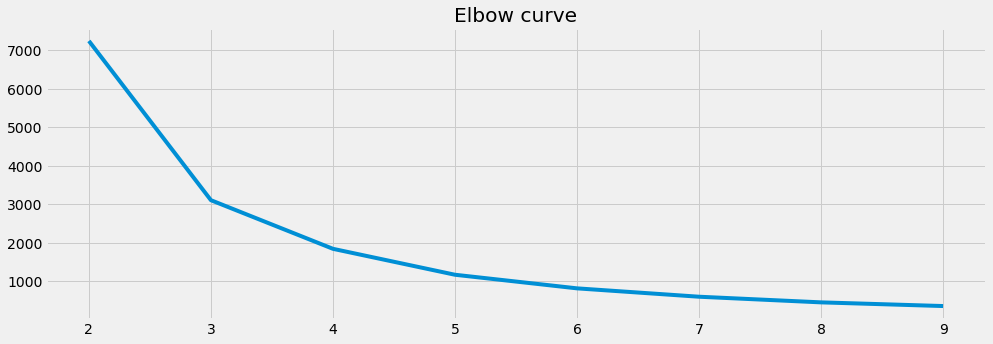

In [146]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [148]:
n = 7
k_means = KMeans(n_clusters=n)
k_means.fit(cluster_df_scaled)

KMeans(n_clusters=7)

In [188]:
cluster_labels=k_means.labels_

In [189]:
dfcluster_kmeans=pd.DataFrame(cluster_labels,columns=['Cluster'])

In [190]:
df_kmeans=pd.concat([df,dfcluster],axis=1)

In [191]:
df_kmeans

Price  Year  Mileage              City State                Vin  \
0        8995  2014    35725           El Paso    TX  19VDE2E53EE000083   
1       10888  2013    19606  Long Island City    NY  19VDE1F52DE012636   
2        8995  2013    48851           El Paso    TX  19VDE2E52DE000025   
3       10999  2014    39922           Windsor    CO  19VDE1F71EE003817   
4       14799  2016    22142            Lindon    UT  19UDE2F32GA001284   
...       ...   ...      ...               ...   ...                ...   
852117  63215  2017        9       Culver City    CA  YV1A22MK9H1013237   
852118  72260  2017     3201         Englewood    NJ  YV4A22PL3H1186162   
852119  55999  2016    28941      Fort Collins    CO  YV4A22PL4G1000868   
852120  60240  2017     3005       San Leandro    CA  YV4A22NLXH1006162   
852121  76995  2017     2502          New York    NY  YV4BC0ZX1H1109845   

         Make         Model Category  Cluster  
0       Acura    ILX6-Speed     Alta        0  
1       Acura    ILX5-Speed     Alta        6  
2       Acura    ILX6-Speed     Alta        4  
3       Acura    ILX5-Speed     Alta        0  
4       Acura  ILXAutomatic     Alta        3  
...       ...           ...      ...      ...  
852117  Volvo         S90T6     Alta        5  
852118  Volvo        XC90T6     Alta        5  
852119  Volvo       XC90AWD     Alta        2  
852120  Volvo           V90     Alta        5  
852121  Volvo        XC90T8     Alta        5  

[852122 rows x 10 columns]

<AxesSubplot:>

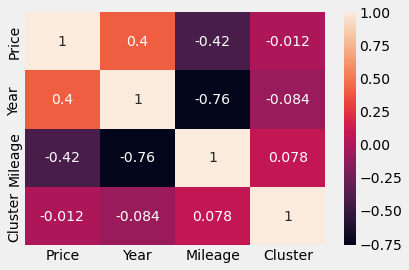

In [167]:
sns.heatmap(data=df_kmeans.corr(),annot=True)

<AxesSubplot:ylabel='Cluster'>

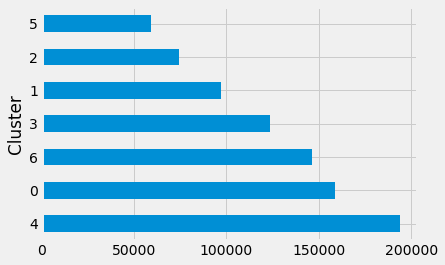

In [163]:
df_kmeans.value_counts('Cluster').plot(kind='barh')

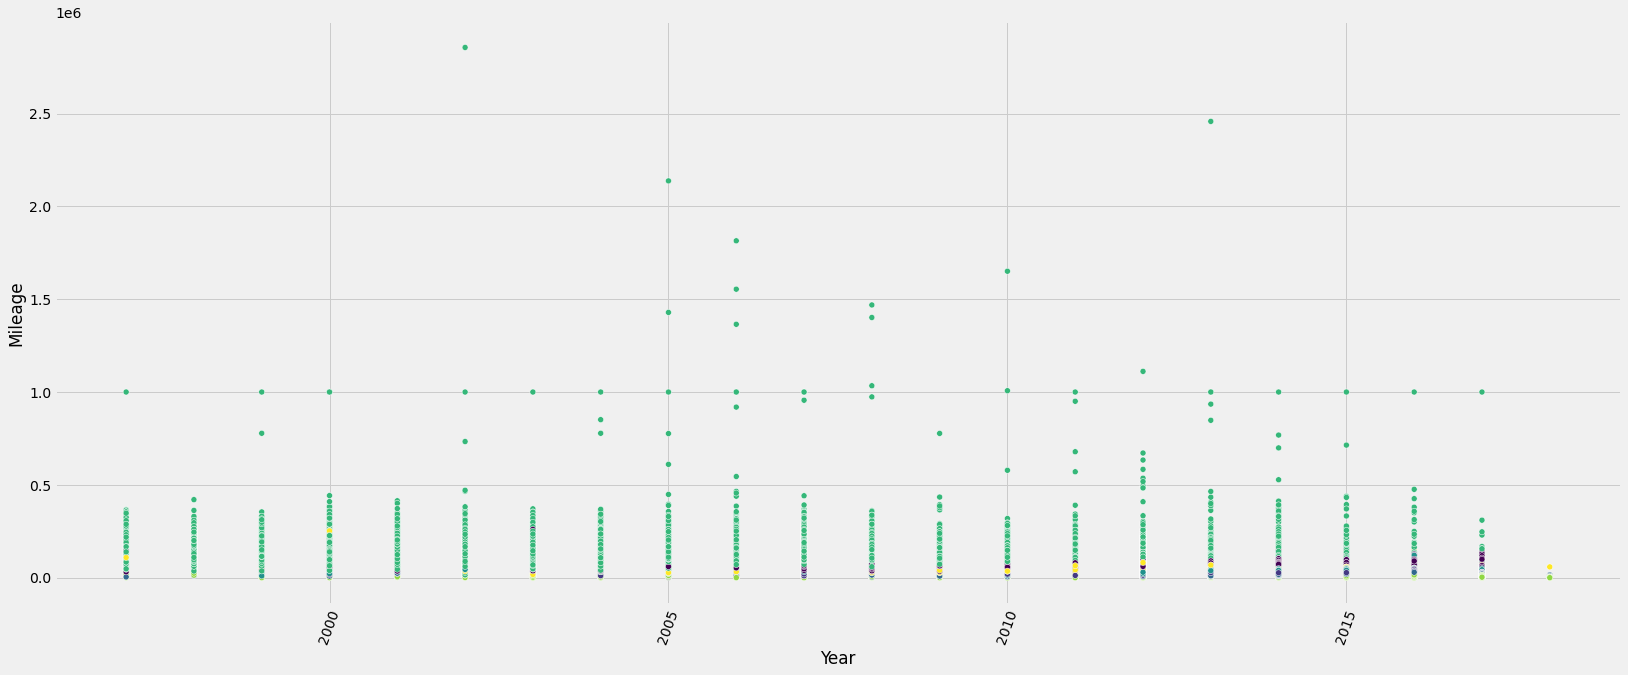

In [164]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=df_kmeans['Year'], y=df_kmeans['Mileage'],c=df_kmeans['Cluster'])
plt.xticks(rotation=70);

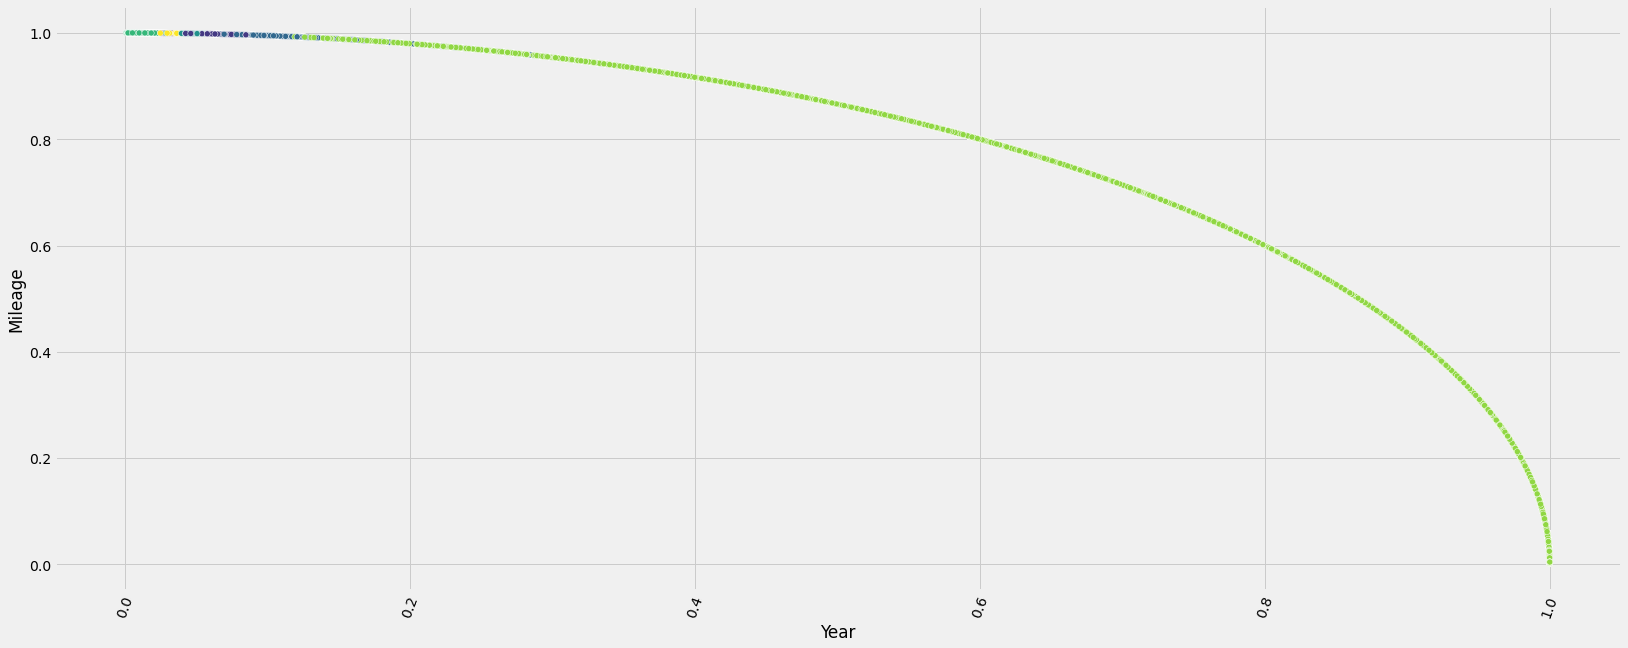

In [159]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=cluster_df_scaled['Year'], y=cluster_df_scaled['Mileage'],c=df_kmeans['Cluster'])
plt.xticks(rotation=70);

In [168]:
df_kmeans.loc[(df_kmeans['Cluster']==0) & (df_kmeans['Category']=='Lujo')]

Price  Year  Mileage          City State                Vin     Make  \
23881  34900  2006   103146  West Chester    PA  SCBBR53WX6C032248  Bentley   

             Model Category  Cluster  
23881  Continental     Lujo        0

In [169]:
df_kmeans.loc[(df_kmeans['Cluster']==1) & (df_kmeans['Category']=='Lujo')]

Price  Year  Mileage           City State                Vin  \
11114    39828  2007    37828          Tempe    AZ  SCFBF03B67GC06126   
11124    46400  2009    29148    La Follette    TN  SCFBF04C19GD12137   
11127    45888  2007    28915     Costa Mesa    CA  SCFBF04B97GD06719   
11135    48880  2008    32550     Carrollton    TX  SCFBF03B98GC09037   
11137    48991  2007    38983         Denver    CO  SCFBF03B07GC06753   
...        ...   ...      ...            ...   ...                ...   
582521   64000  2008    55137         Irving    TX  WDBVF78J68A002236   
582523   63985  2004    58234  Downers Grove    IL  WDBVF78J64A000304   
582526   69995  2005    62576       Columbia    TN  WDBVF78J95A001254   
723917   86888  2004    62007      Hollywood    FL  SCA1S68444UX07410   
723921  109995  2010    69667        Waltham    MA  SCA664S55AUX48608   

               Make       Model Category  Cluster  
11114         Aston      Martin     Lujo        1  
11124         Aston      Martin     Lujo        1  
11127         Aston      Martin     Lujo        1  
11135         Aston      Martin     Lujo        1  
11137         Aston      Martin     Lujo        1  
...             ...         ...      ...      ...  
582521      Maybach       574dr     Lujo        1  
582523      Maybach       574dr     Lujo        1  
582526      Maybach       574dr     Lujo        1  
723917  Rolls-Royce  Phantom4dr     Lujo        1  
723921  Rolls-Royce    Ghost4dr     Lujo        1  

[70 rows x 10 columns]

In [170]:
df_kmeans.loc[(df_kmeans['Cluster']==2) & (df_kmeans['Category']=='Lujo')]

Price  Year  Mileage              City State                Vin  \
11121    44950  2008    26996        Scottsdale    AZ  SCFBF04BX8GD08366   
11122    46950  2009    21967         St. Louis    MO  SCFBF03C69GC12701   
11123    43990  2006    24457              Reno    NV  SCFBB03B16GC00003   
11125    46000  2007    25623     Fredricksburg    VA  SCFBB03B87GC03496   
11128    45990  2006    25666  Lauderdale Lakes    FL  SCFBB03B16GC01653   
...        ...   ...      ...               ...   ...                ...   
723922  113975  2011    36241       South River    NJ  SCA664S52BUX50124   
723923  117999  2011    35747          Marrieta    GA  SCA664S55BUX49937   
723924  119000  2011    35788         Hollywood    FL  SCA664S52BUX49538   
723927  119999  2011    46545          Marrieta    GA  SCA664S51BUX50003   
723931  114985  2010    56256             Alsip    IL  SCA664S56AUX48858   

               Make     Model Category  Cluster  
11121         Aston    Martin     Lujo        2  
11122         Aston    Martin     Lujo        2  
11123         Aston    Martin     Lujo        2  
11125         Aston    Martin     Lujo        2  
11128         Aston    Martin     Lujo        2  
...             ...       ...      ...      ...  
723922  Rolls-Royce  Ghost4dr     Lujo        2  
723923  Rolls-Royce  Ghost4dr     Lujo        2  
723924  Rolls-Royce  Ghost4dr     Lujo        2  
723927  Rolls-Royce  Ghost4dr     Lujo        2  
723931  Rolls-Royce  Ghost4dr     Lujo        2  

[139 rows x 10 columns]

In [174]:
df_kmeans.loc[(df_kmeans['Model']=='Martin') & (df_kmeans['Make']=='Aston')]

Price  Year  Mileage           City State                Vin   Make  \
11112   37995  2008    44426         Dallas    TX  SCFBB04B58GD08769  Aston   
11113   35000  2005    68173      Charlotte    NC  SCFAD01A35GA02442  Aston   
11114   39828  2007    37828          Tempe    AZ  SCFBF03B67GC06126  Aston   
11115   38550  2007    53462        Bedford    OH  SCFBB03B27GC04465  Aston   
11116   38000  2006    66665  Downers Grove    IL  SCFBB03B66GC01356  Aston   
...       ...   ...      ...            ...   ...                ...    ...   
11256  219999  2017     1847  Downers Grove    IL  SCFRMFAV2HGL00765  Aston   
11257  219990  2016     1923  Rancho Mirage    CA  SCFLMCFU5GGJ03110  Aston   
11258  229000  2017       34      Charlotte    NC  SCFRMFAV5HGL02400  Aston   
11259  229880  2017     1848        Palmyra    NJ  SCFRMFAV1HGL01230  Aston   
11260  239950  2017      891       Sarasota    FL  SCFRMFAV6HGL00770  Aston   

        Model Category  Cluster  
11112  Martin     Lujo        3  
11113  Martin     Lujo        6  
11114  Martin     Lujo        1  
11115  Martin     Lujo        3  
11116  Martin     Lujo        6  
...       ...      ...      ...  
11256  Martin     Lujo        5  
11257  Martin     Lujo        5  
11258  Martin     Lujo        5  
11259  Martin     Lujo        5  
11260  Martin     Lujo        5  

[149 rows x 10 columns]

In [181]:
df_kmeans.loc[(df_kmeans['Cluster']==1) & (df_kmeans['Category']=='Lujo') & (df_kmeans['Model']=='Martin') & (df_kmeans['Make']=='Aston')]

Price  Year  Mileage         City State                Vin   Make  \
11114  39828  2007    37828        Tempe    AZ  SCFBF03B67GC06126  Aston   
11124  46400  2009    29148  La Follette    TN  SCFBF04C19GD12137  Aston   
11127  45888  2007    28915   Costa Mesa    CA  SCFBF04B97GD06719  Aston   
11135  48880  2008    32550   Carrollton    TX  SCFBF03B98GC09037  Aston   
11137  48991  2007    38983       Denver    CO  SCFBF03B07GC06753  Aston   
11139  48900  2006    32645      Hamburg    NY  SCFAD01A26GA04040  Aston   
11145  51500  2007    39532  San Antonio    TX  SCFAD02A57GB07064  Aston   
11152  58975  2011    41135     Marietta    GA  SCFEFBAKXBGC14847  Aston   
11159  47900  2008    34272      HOUSTON    TX  SCFBF03BX8GC08219  Aston   
11160  64995  2011    47702       Austin    TX  SCFHDDAJ4BAF01092  Aston   
11163  49977  2007    37489   Carrollton    TX  SCFAD02A57GB08912  Aston   
11186  83000  2013    57278     McKinney    TX  SCFEKBDL2DGC17325  Aston   

        Model Category  Cluster  
11114  Martin     Lujo        1  
11124  Martin     Lujo        1  
11127  Martin     Lujo        1  
11135  Martin     Lujo        1  
11137  Martin     Lujo        1  
11139  Martin     Lujo        1  
11145  Martin     Lujo        1  
11152  Martin     Lujo        1  
11159  Martin     Lujo        1  
11160  Martin     Lujo        1  
11163  Martin     Lujo        1  
11186  Martin     Lujo        1

In [175]:
df_kmeans.loc[(df_kmeans['Cluster']==2) & (df_kmeans['Category']=='Lujo') & (df_kmeans['Model']=='Martin') & (df_kmeans['Make']=='Aston')]

Price  Year  Mileage              City State                Vin   Make  \
11121  44950  2008    26996        Scottsdale    AZ  SCFBF04BX8GD08366  Aston   
11122  46950  2009    21967         St. Louis    MO  SCFBF03C69GC12701  Aston   
11123  43990  2006    24457              Reno    NV  SCFBB03B16GC00003  Aston   
11125  46000  2007    25623     Fredricksburg    VA  SCFBB03B87GC03496  Aston   
11128  45990  2006    25666  Lauderdale Lakes    FL  SCFBB03B16GC01653  Aston   
11130  46950  2006    18741              Mesa    AZ  SCFBB03B06GC01210  Aston   
11131  47200  2007    27842          Marietta    GA  SCFBB03B47GC04905  Aston   
11133  47990  2006    23344           Addison    IL  SCFAD02A16GB05603  Aston   
11136  48998  2007    23916       Bensenville    IL  SCFBF04B37GD06764  Aston   
11138  49995  2006    18635            Dallas    TX  SCFAD02A56GB05376  Aston   
11140  49998  2005    18013        Buena Park    CA  SCFAD01A25GA02707  Aston   
11142  52995  2009    22935            Warren    MI  SCFBF04C39GD11846  Aston   
11144  52500  2007    26325            Irvine    CA  SCFAD02A97GB07200  Aston   
11146  54995  2008    20604            Naples    FL  SCFAD02A08GB09810  Aston   
11147  52995  2006    17313           Wantagh    NY  SCFAD01A86GA05435  Aston   
11149  51500  2003    27675       Dania Beach    FL  SCFAC233X3B501159  Aston   
11150  55997  2009    27087            Berlin    NJ  SCFBB04C09GD11895  Aston   
11151  56950  2009    22127          Bellevue    WA  SCFBF03C69GC11936  Aston   
11154  54900  2005    20452       Los Angeles    CA  SCFAD01A95GA02025  Aston   
11155  57500  2008    24788          Marietta    GA  SCFAD01A18GA09135  Aston   
11157  60000  2009    26299       Dania Beach    FL  SCFAD02E39GB11006  Aston   
11158  63995  2012    29826            Warren    MI  SCFEKBBK4CGD16608  Aston   
11164  68990  2011    29300         Las Vegas    NV  SCFHDDAJ0BAF00943  Aston   
11165  72000  2013    30868          McKinney    TX  SCFEKBAKXDGC17133  Aston   
11167  68995  2010    33500            Austin    TX  SCFHDDAJ2AAF00537  Aston   
11168  69888  2011    28532     Redondo Beach    CA  SCFHDDAJ9BAF01363  Aston   
11170  69888  2011    35143        Costa Mesa    CA  SCFHDDAJ2BAF01284  Aston   
11171  69995  2011    43840    Woodland Hills    CA  SCFEFBBK6BGD14605  Aston   
11174  72490  2011    35001     Pompano Beach    FL  SCFHDDAJ9BAF00973  Aston   
11177  74885  2011    33994     Downers Grove    IL  SCFHDDAJ8BAF01242  Aston   
11181  78888  2012    26305     Redondo Beach    CA  SCFHDDAJ4CGF03178  Aston   
11189  88500  2012    33075         Charlotte    NC  SCFHDDAJ3CAF02316  Aston   

        Model Category  Cluster  
11121  Martin     Lujo        2  
11122  Martin     Lujo        2  
11123  Martin     Lujo        2  
11125  Martin     Lujo        2  
11128  Martin     Lujo        2  
11130  Martin     Lujo        2  
11131  Martin     Lujo        2  
11133  Martin     Lujo        2  
11136  Martin     Lujo        2  
11138  Martin     Lujo        2  
11140  Martin     Lujo        2  
11142  Martin     Lujo        2  
11144  Martin     Lujo        2  
11146  Martin     Lujo        2  
11147  Martin     Lujo        2  
11149  Martin     Lujo        2  
11150  Martin     Lujo        2  
11151  Martin     Lujo        2  
11154  Martin     Lujo        2  
11155  Martin     Lujo        2  
11157  Martin     Lujo        2  
11158  Martin     Lujo        2  
11164  Martin     Lujo        2  
11165  Martin     Lujo        2  
11167  Martin     Lujo        2  
11168  Martin     Lujo        2  
11170  Martin     Lujo        2  
11171  Martin     Lujo        2  
11174  Martin     Lujo        2  
11177  Martin     Lujo        2  
11181  Martin     Lujo        2  
11189  Martin     Lujo        2

In [176]:
df_kmeans.loc[(df_kmeans['Cluster']==3) & (df_kmeans['Category']=='Lujo') & (df_kmeans['Model']=='Martin') & (df_kmeans['Make']=='Aston')]

Price  Year  Mileage           City State                Vin   Make  \
11112  37995  2008    44426         Dallas    TX  SCFBB04B58GD08769  Aston   
11115  38550  2007    53462        Bedford    OH  SCFBB03B27GC04465  Aston   
11117  39995  2008    53835         Warren    MI  SCFBB04B78GD10667  Aston   
11119  42994  2007    46863  Downers Grove    IL  SCFAD02A97GB07164  Aston   
11120  42988  2009    67500         Buford    GA  SCFBB04C69GD12260  Aston   
11132  45695  2006    49439       Evanston    IL  SCFAD01A26GA05981  Aston   

        Model Category  Cluster  
11112  Martin     Lujo        3  
11115  Martin     Lujo        3  
11117  Martin     Lujo        3  
11119  Martin     Lujo        3  
11120  Martin     Lujo        3  
11132  Martin     Lujo        3

In [179]:
df_kmeans.loc[(df_kmeans['Cluster']==6) & (df_kmeans['Category']=='Lujo') & (df_kmeans['Model']=='Martin') & (df_kmeans['Make']=='Aston')]

Price  Year  Mileage           City State                Vin   Make  \
11113  35000  2005    68173      Charlotte    NC  SCFAD01A35GA02442  Aston   
11116  38000  2006    66665  Downers Grove    IL  SCFBB03B66GC01356  Aston   

        Model Category  Cluster  
11113  Martin     Lujo        6  
11116  Martin     Lujo        6

# GMM 

In [194]:
cluster_df_scaled

Year   Mileage
0       0.056286  0.998415
1       0.102136  0.994770
2       0.041172  0.999152
3       0.050384  0.998730
4       0.090674  0.995881
...          ...       ...
852117  0.999990  0.004462
852118  0.533108  0.846047
852119  0.069491  0.997583
852120  0.557312  0.830303
852121  0.627613  0.778526

[852122 rows x 2 columns]

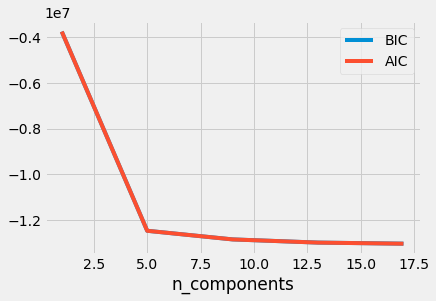

In [195]:
n_components = np.arange(1, 20,4)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(cluster_df_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(cluster_df_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(cluster_df_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [196]:
# Training model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)
y_GMM = gmm.fit(cluster_df_scaled)

In [197]:
y_GMM= gmm.predict(cluster_df_scaled)
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_GMM_2 = df.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_GMM_2['Cluster'] = y_GMM
df_GMM_2['Cluster'].value_counts()

0    674042
2    119874
4     34863
1     15320
3      8023
Name: Cluster, dtype: int64

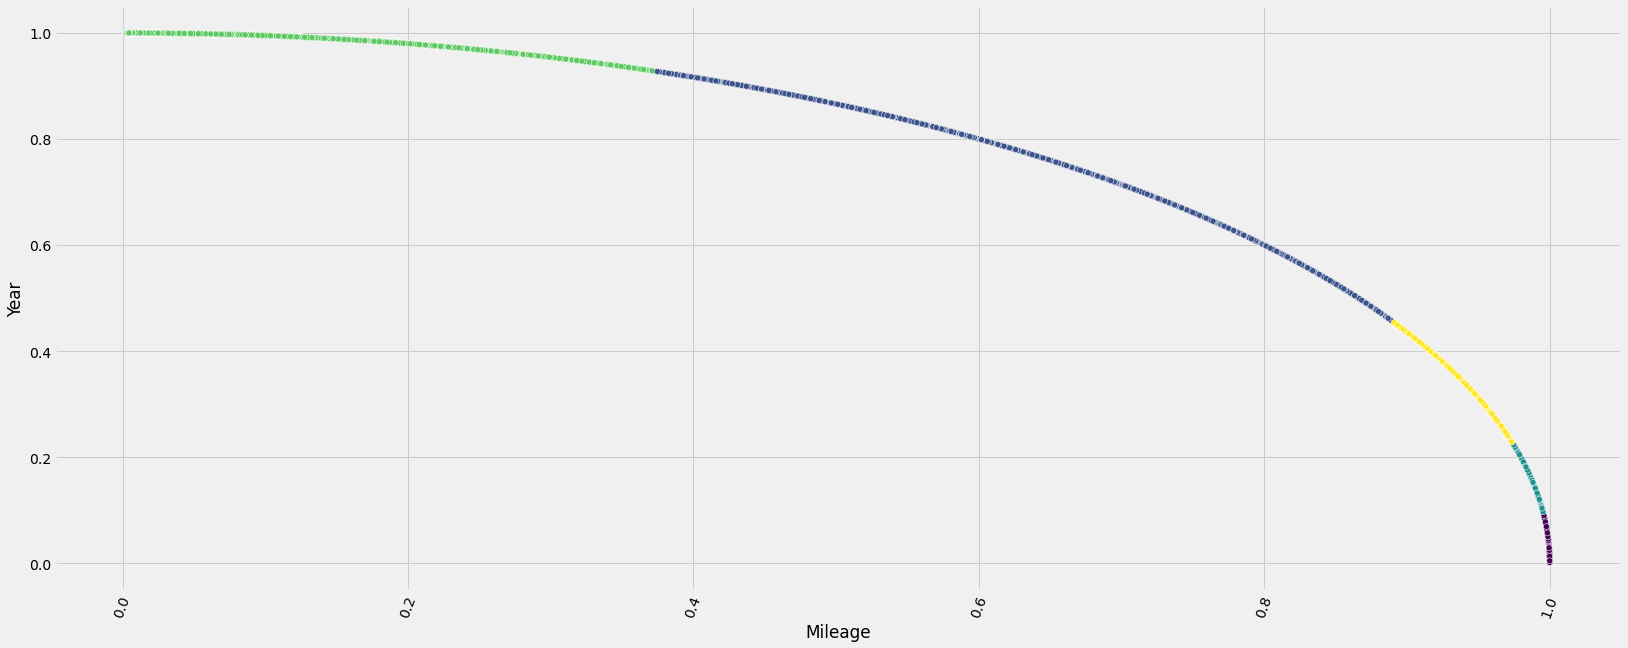

In [199]:
plt.figure(figsize=(25,10))
sns.scatterplot(y=cluster_df_scaled['Year'], x=cluster_df_scaled['Mileage'],c=df_GMM_2['Cluster'])
plt.xticks(rotation=70);

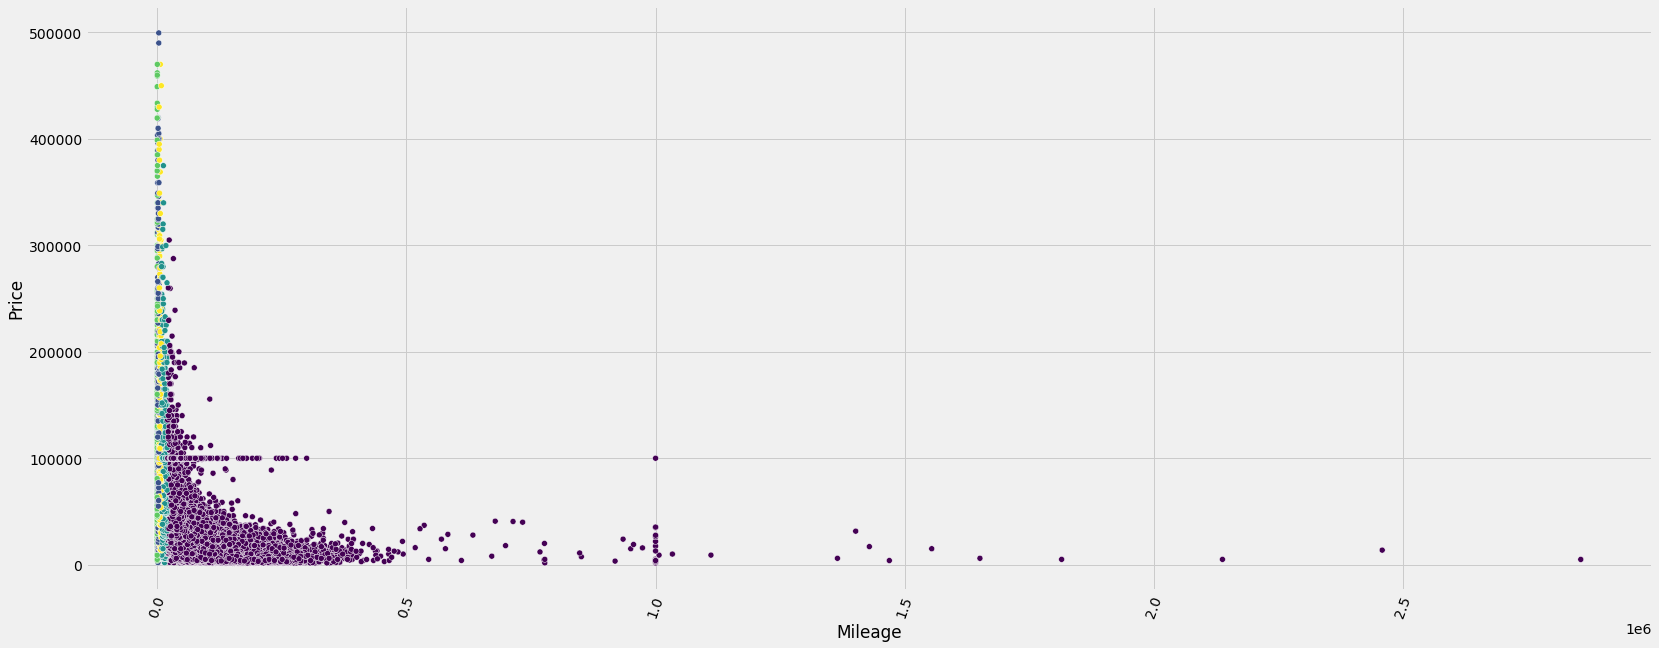

In [200]:
plt.figure(figsize=(25,10))
sns.scatterplot(y=df_GMM_2['Price'], x=df_GMM_2['Mileage'],c=df_GMM_2['Cluster'])
plt.xticks(rotation=70);

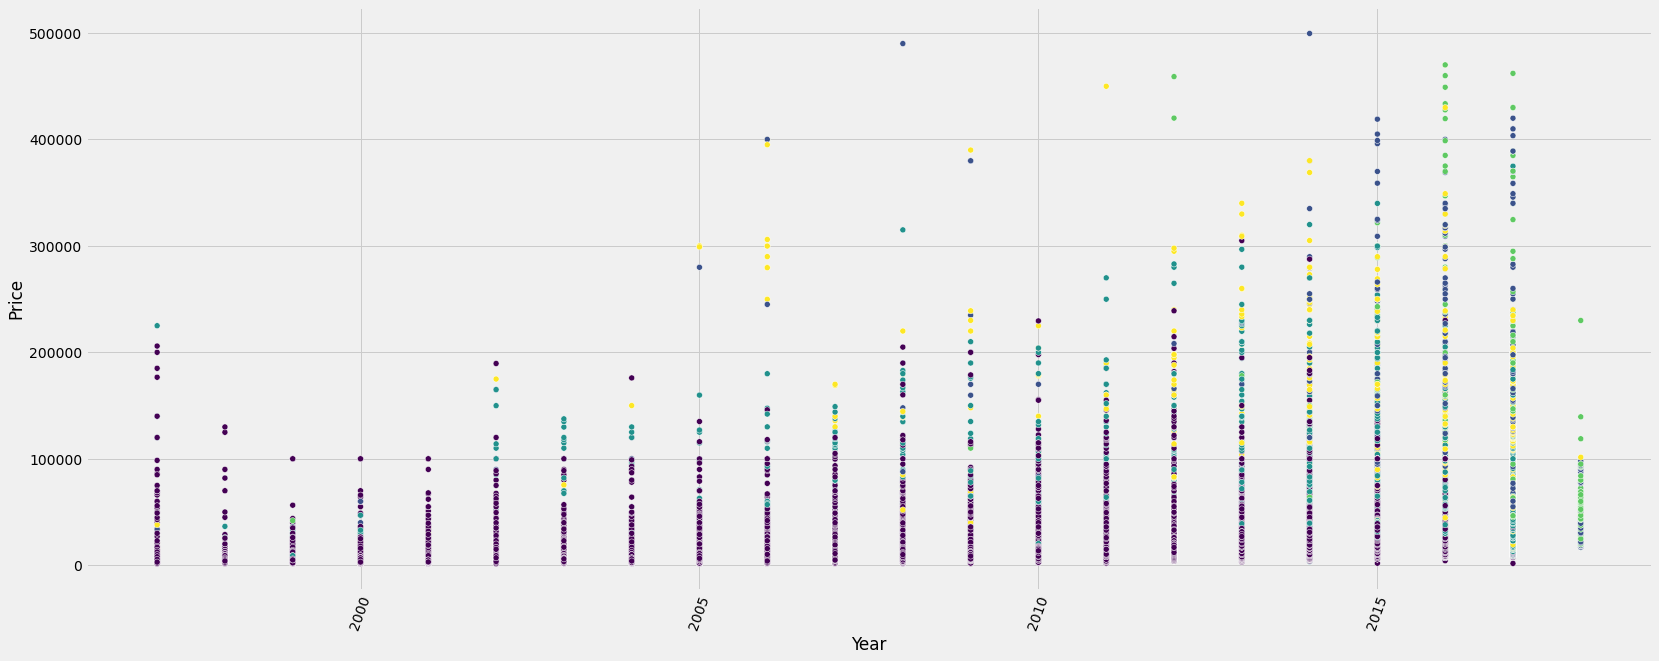

In [201]:
plt.figure(figsize=(25,10))
sns.scatterplot(y=df_GMM_2['Price'], x=df_GMM_2['Year'],c=df_GMM_2['Cluster'])
plt.xticks(rotation=70);

In [203]:
df_GMM_2.loc[(df_GMM_2['Cluster']==1) & (df_GMM_2['Category']=='Lujo') & (df_GMM_2['Model']=='Martin') & (df_GMM_2['Make']=='Aston')]

Price  Year  Mileage             City State                Vin   Make  \
11176   76800  2011     3036            Miami    FL  SCFEFBBK7BGD14810  Aston   
11190   89990  2011     1983     Indianapolis    IN  SCFFDAAE0BGA13215  Aston   
11195   99991  2012     2117      Bensenville    IL  SCFHDDAJ9CAF02580  Aston   
11196  107000  2016     3255    Downers Grove    IL  SCFEKBEL8GGD20381  Aston   
11198  107007  2012     2617    Beverly Hills    CA  SCFHDDAJ2CAF02601  Aston   
11202  114880  2016     1312  Fort Lauderdale    FL  SCFEKBEL0GGD20648  Aston   
11204  116900  2016     2116           Summit    NJ  SCFEBBDL1GGC20625  Aston   
11211  119950  2013     1926         Bellevue    WA  SCFEDACM5DGA14850  Aston   
11212  121900  2015     2047           Summit    NJ  SCFFDAEM6FGA16191  Aston   
11221  130000  2015     3351    Downers Grove    IL  SCFFDAEM6FGA16210  Aston   
11227  135000  2015     1843       Greensboro    NC  SCFEKBCR2FGS01809  Aston   
11228  137982  2015     3110  Highlands Ranch    CO  SCFEKBCR2FGS01793  Aston   
11229  129147  2015     1608       Greensboro    NC  SCFEKBFRXFGS22094  Aston   
11230  139500  2015     1793           Dublin    CA  SCFEKBCR9FGS02195  Aston   
11232  131500  2015     2316         Richmond    VA  SCFEKBCR1FGS01686  Aston   
11233  142499  2015      868    Downers Grove    IL  SCFFDAFM9FGB16137  Aston   
11243  169988  2015     2940          HOUSTON    TX  SCFEKBCR1FGS01767  Aston   
11249  199974  2017     1000    Pinellas Park    FL  SCFESBNR5HGS02792  Aston   
11253  204950  2015     1028         Bellevue    WA  SCFLMCFU4FGJ01993  Aston   
11254  209874  2017     3492       Greensboro    NC  SCFRMFAV2HGL00524  Aston   
11256  219999  2017     1847    Downers Grove    IL  SCFRMFAV2HGL00765  Aston   
11257  219990  2016     1923    Rancho Mirage    CA  SCFLMCFU5GGJ03110  Aston   
11259  229880  2017     1848          Palmyra    NJ  SCFRMFAV1HGL01230  Aston   
11260  239950  2017      891         Sarasota    FL  SCFRMFAV6HGL00770  Aston   

        Model Category  Cluster  
11176  Martin     Lujo        1  
11190  Martin     Lujo        1  
11195  Martin     Lujo        1  
11196  Martin     Lujo        1  
11198  Martin     Lujo        1  
11202  Martin     Lujo        1  
11204  Martin     Lujo        1  
11211  Martin     Lujo        1  
11212  Martin     Lujo        1  
11221  Martin     Lujo        1  
11227  Martin     Lujo        1  
11228  Martin     Lujo        1  
11229  Martin     Lujo        1  
11230  Martin     Lujo        1  
11232  Martin     Lujo        1  
11233  Martin     Lujo        1  
11243  Martin     Lujo        1  
11249  Martin     Lujo        1  
11253  Martin     Lujo        1  
11254  Martin     Lujo        1  
11256  Martin     Lujo        1  
11257  Martin     Lujo        1  
11259  Martin     Lujo        1  
11260  Martin     Lujo        1

In [204]:
df_GMM_2.loc[(df_GMM_2['Cluster']==0) & (df_GMM_2['Category']=='Lujo') & (df_GMM_2['Model']=='Martin') & (df_GMM_2['Make']=='Aston')]

Price  Year  Mileage              City State                Vin  \
11112   37995  2008    44426            Dallas    TX  SCFBB04B58GD08769   
11113   35000  2005    68173         Charlotte    NC  SCFAD01A35GA02442   
11114   39828  2007    37828             Tempe    AZ  SCFBF03B67GC06126   
11115   38550  2007    53462           Bedford    OH  SCFBB03B27GC04465   
11116   38000  2006    66665     Downers Grove    IL  SCFBB03B66GC01356   
11117   39995  2008    53835            Warren    MI  SCFBB04B78GD10667   
11119   42994  2007    46863     Downers Grove    IL  SCFAD02A97GB07164   
11120   42988  2009    67500            Buford    GA  SCFBB04C69GD12260   
11121   44950  2008    26996        Scottsdale    AZ  SCFBF04BX8GD08366   
11122   46950  2009    21967         St. Louis    MO  SCFBF03C69GC12701   
11123   43990  2006    24457              Reno    NV  SCFBB03B16GC00003   
11124   46400  2009    29148       La Follette    TN  SCFBF04C19GD12137   
11125   46000  2007    25623     Fredricksburg    VA  SCFBB03B87GC03496   
11127   45888  2007    28915        Costa Mesa    CA  SCFBF04B97GD06719   
11128   45990  2006    25666  Lauderdale Lakes    FL  SCFBB03B16GC01653   
11131   47200  2007    27842          Marietta    GA  SCFBB03B47GC04905   
11132   45695  2006    49439          Evanston    IL  SCFAD01A26GA05981   
11133   47990  2006    23344           Addison    IL  SCFAD02A16GB05603   
11135   48880  2008    32550        Carrollton    TX  SCFBF03B98GC09037   
11136   48998  2007    23916       Bensenville    IL  SCFBF04B37GD06764   
11137   48991  2007    38983            Denver    CO  SCFBF03B07GC06753   
11139   48900  2006    32645           Hamburg    NY  SCFAD01A26GA04040   
11142   52995  2009    22935            Warren    MI  SCFBF04C39GD11846   
11144   52500  2007    26325            Irvine    CA  SCFAD02A97GB07200   
11145   51500  2007    39532       San Antonio    TX  SCFAD02A57GB07064   
11149   51500  2003    27675       Dania Beach    FL  SCFAC233X3B501159   
11150   55997  2009    27087            Berlin    NJ  SCFBB04C09GD11895   
11151   56950  2009    22127          Bellevue    WA  SCFBF03C69GC11936   
11152   58975  2011    41135          Marietta    GA  SCFEFBAKXBGC14847   
11155   57500  2008    24788          Marietta    GA  SCFAD01A18GA09135   
11157   60000  2009    26299       Dania Beach    FL  SCFAD02E39GB11006   
11158   63995  2012    29826            Warren    MI  SCFEKBBK4CGD16608   
11159   47900  2008    34272           HOUSTON    TX  SCFBF03BX8GC08219   
11160   64995  2011    47702            Austin    TX  SCFHDDAJ4BAF01092   
11163   49977  2007    37489        Carrollton    TX  SCFAD02A57GB08912   
11164   68990  2011    29300         Las Vegas    NV  SCFHDDAJ0BAF00943   
11165   72000  2013    30868          McKinney    TX  SCFEKBAKXDGC17133   
11167   68995  2010    33500            Austin    TX  SCFHDDAJ2AAF00537   
11168   69888  2011    28532     Redondo Beach    CA  SCFHDDAJ9BAF01363   
11170   69888  2011    35143        Costa Mesa    CA  SCFHDDAJ2BAF01284   
11171   69995  2011    43840    Woodland Hills    CA  SCFEFBBK6BGD14605   
11174   72490  2011    35001     Pompano Beach    FL  SCFHDDAJ9BAF00973   
11177   74885  2011    33994     Downers Grove    IL  SCFHDDAJ8BAF01242   
11181   78888  2012    26305     Redondo Beach    CA  SCFHDDAJ4CGF03178   
11186   83000  2013    57278          McKinney    TX  SCFEKBDL2DGC17325   
11188   79999  2003    20937     Beverly Hills    CA  SCFAC23383B500589   
11189   88500  2012    33075         Charlotte    NC  SCFHDDAJ3CAF02316   
11199  109000  2014    21172     Downers Grove    IL  SCFHDDAT8EGF03320   
11200  109718  2014    27735     Pinellas Park    FL  SCFHDDBT0EGF04038   
11213  114950  2009    31925          Bellevue    WA  SCFAB05D99GE00125   
11216  117890  2010    29700        Villa Park    IL  SCFFDCCD1AGE11760   

        Make   Model Category  Cluster  
11112  Aston  Martin     Lujo        0  
11113  Aston  Martin     

In [205]:
df_GMM_2.loc[(df_GMM_2['Cluster']==2) & (df_GMM_2['Category']=='Lujo') & (df_GMM_2['Model']=='Martin') & (df_GMM_2['Make']=='Aston')]

Price  Year  Mileage               City State                Vin  \
11118   45900  2008    10800    Rolling Meadows    IL  SCFBF03B88GC09742   
11130   46950  2006    18741               Mesa    AZ  SCFBB03B06GC01210   
11138   49995  2006    18635             Dallas    TX  SCFAD02A56GB05376   
11140   49998  2005    18013         Buena Park    CA  SCFAD01A25GA02707   
11141   52500  2008    13122  Hasbrouck Heights    NJ  SCFBF04B18GD09731   
11146   54995  2008    20604             Naples    FL  SCFAD02A08GB09810   
11147   52995  2006    17313            Wantagh    NY  SCFAD01A86GA05435   
11148   55950  2008    11640           Bellevue    WA  SCFBF03B18GC07847   
11153   59000  2009    14485      Downers Grove    IL  SCFBF03C89GC12392   
11154   54900  2005    20452        Los Angeles    CA  SCFAD01A95GA02025   
11156   58774  2008    14132            Fishers    IN  SCFAD02A68GB09696   
11161   62888  2005    10597        San Gabriel    CA  SCFAD01A25GA01010   
11162   69888  2012    12810             Dallas    TX  SCFEKBBK1CGD16923   
11169   69997  2010    19812             Pelham    AL  SCFEFBBC5AGD14103   
11172   69995  2008    10950         Carrollton    TX  SCFAD02A98GB09207   
11173   73999  2014    15558           Marietta    GA  SCFEKBBK4EGD17874   
11175   74996  2013    18189        DFW Airport    TX  SCFEKBELXDGD17333   
11178   79995  2014    12703             Austin    TX  SCFEKBDL6EGC18138   
11184   85000  2015    11760      Downers Grove    IL  SCFEKBAL2FGC19020   
11185   82000  2010    11362          Charlotte    NC  SCFFDABE7AGB12790   
11193   81993  2012    15151            Gilbert    AZ  SCFFDEDNXCGH14039   
11194   94999  2012    15001            Houston    TX  SCFFDEDN5CGH13672   
11201  111500  2014    15335      Lawrenceville    NJ  SCFFDABM3EGB15442   
11203  113888  2014    10608       Delray Beach    FL  SCFHDDBT7EGF04280   
11205  115000  2015    16814     Newtown Square    PA  SCFEKBCR5FGS01576   
11206  114922  2013    16365            Merriam    KS  SCFFDAAM1DGA14514   
11208  119880  2015    10963            Atlanta    GA  SCFFDAFM6FGB16824   
11209  118900  2014     8914             Summit    NJ  SCFFDAAM9EGA15881   
11214  121990  2015    13834     Newtown Square    PA  SCFEKBCR9FGS01614   
11217  118900  2009    18101             Summit    NJ  SCFAB05D39GE00489   
11219  124900  2011    16614             Summit    NJ  SCFFDCCD4BGE12421   
11220  123902  2009    15040            HOUSTON    TX  SCFAD05D29GE01174   
11226  129000  2012    17628          Charlotte    NC  SCFEBBCF0CGS00983   
11234  139990  2014    19339     Newtown Square    PA  SCFLDCFPXEGJ00064   
11237  149992  2016     9338             Dallas    TX  SCFFDAEM9GGA17059   
11239  159007  2014    17719      Beverly Hills    CA  SCFLDCFP2EGJ00477   
11240  163990  2014     8828      Rancho Mirage    CA  SCFLDCFP3EGJ00570   
11242  165000  2015    17047            HOUSTON    TX  SCFEKBCR2FGS01647   
11246  174875  2017    12713      Downers Grove    IL  SCFESBNR3HGS02533   
11250  198980  2017    10795    Fort Lauderdale    FL  SCFRMFAV5HGL00095   
11251  200000  2017    13613      Downers Grove    IL  SCFRMFAV9HGL00097   

        Make   Model Category  Cluster  
11118  Aston  Martin     Lujo        2  
11130  Aston  Martin     Lujo        2  
11138  Aston  Martin     Lujo        2  
11140  Aston  Martin     Lujo        2  
11141  Aston  Martin     Lujo        2  
11146  Aston  Martin     Lujo        2  
11147  Aston  Martin     Lujo        2  
11148  Aston  Martin     Lujo        2  
11153  Aston  Martin     Lujo        2  
11154  Aston  Martin     Lujo        2  
11156  Aston  Martin     Lujo        2  
11161  Aston  Martin     Lujo        2  
11162  Aston  Martin     Lujo        2  
11169  Aston  Martin     Lujo        2  
11172  Aston  Martin     Lujo        2  
11173  Aston  Martin     Lujo        2  
11175  Aston  Martin     Lujo        2  
11178  Aston  Martin     Lujo        2  
11184  Aston  Martin     Lujo       

In [206]:
df_GMM_2.loc[(df_GMM_2['Cluster']==3) & (df_GMM_2['Category']=='Lujo') & (df_GMM_2['Model']=='Martin') & (df_GMM_2['Make']=='Aston')]

Price  Year  Mileage        City State                Vin   Make  \
11238  152555  2016      267      Naples    FL  SCFFDAEM1GGA17265  Aston   
11252  205488  2017      783  Mt. Juliet    TN  SCFESBNR4HGS02718  Aston   
11258  229000  2017       34   Charlotte    NC  SCFRMFAV5HGL02400  Aston   

        Model Category  Cluster  
11238  Martin     Lujo        3  
11252  Martin     Lujo        3  
11258  Martin     Lujo        3

In [207]:
df_GMM_2.loc[(df_GMM_2['Cluster']==4) & (df_GMM_2['Category']=='Lujo') & (df_GMM_2['Model']=='Martin') & (df_GMM_2['Make']=='Aston')]

Price  Year  Mileage              City State                Vin  \
11126   46995  2006     6875  Saratoga Springs    NY  SCFBB03B06GC02860   
11129   48995  2008     7412      Temple Hills    MD  SCFBF03BX8GC08902   
11134   51986  2008     7811          Bellevue    WA  SCFBF04B08GD08781   
11143   53649  2007     6918      Fort Collins    CO  SCFBB03B97GC04950   
11166   74000  2013     5351          Richmond    VA  SCFEKBBK2DGD17256   
11179   75900  2008     6719   West Palm Beach    FL  SCFAD02A58GB09303   
11180   74998  2003     5421            Naples    FL  SCFAC23323B501169   
11182   83315  2014     4600        Greensboro    NC  SCFEBBAK3EGC17976   
11183   84500  2015     4533         Charlotte    NC  SCFEBBAL1FGC19560   
11187   79999  2003     6350          Pasadena    CA  SCFAC233X3B500965   
11191   97000  2015     3958     Downers Grove    IL  SCFEKBEL4FGD19310   
11192   94999  2012     7235     Pinellas Park    FL  SCFHDDAJ9CGF03208   
11197  109990  2015     4528     Pinellas Park    FL  SCFEKBEL8FGD18838   
11207  115958  2014     5351          Pasadena    CA  SCFHDDAT8EGF03334   
11210  119950  2014     4639          Bellevue    WA  SCFFDAAM0EGA15722   
11215  122590  2014     7335   Fort Lauderdale    FL  SCFFDABM4EGB15773   
11218  124880  2015     5280   Fort Lauderdale    FL  SCFEKBCR4FGS01567   
11222  129980  2015     5045   Fort Lauderdale    FL  SCFHMDBS1FGF04946   
11223  129900  2015     7424            Summit    NJ  SCFEKBCR9FGS01693   
11224  129934  2015     5023      Coral Gables    FL  SCFFDAEM7FGA16586   
11225  129992  2015     7636            Dallas    TX  SCFFDAFM0FGB16060   
11231  139999  2015     8465         Melbourne    FL  SCFFDAEM0FGA16249   
11235  144950  2015     5610         Spicewood    TX  SCFHMDBS7FGF04871   
11236  147188  2015     6557             Bronx    NY  SCFHMDBS4FGF04553   
11241  165970  2016     5563           HOUSTON    TX  SCFHMDBS5GGF05079   
11244  169900  2014     5749   Fort Lauderdale    FL  SCFLDCFP1EGJ01071   
11245  169950  2014     6623          Bellevue    WA  SCFLDCFPXEGJ01845   
11247  189980  2015     7857   Fort Lauderdale    FL  SCFPMCGU7FGK02560   
11248  195980  2015     6000   Fort Lauderdale    FL  SCFPMCGU3FGK02328   
11255  212993  2017     7028   West Palm Beach    FL  SCFRMFAV0HGL00098   

        Make   Model Category  Cluster  
11126  Aston  Martin     Lujo        4  
11129  Aston  Martin     Lujo        4  
11134  Aston  Martin     Lujo        4  
11143  Aston  Martin     Lujo        4  
11166  Aston  Martin     Lujo        4  
11179  Aston  Martin     Lujo        4  
11180  Aston  Martin     Lujo        4  
11182  Aston  Martin     Lujo        4  
11183  Aston  Martin     Lujo        4  
11187  Aston  Martin     Lujo        4  
11191  Aston  Martin     Lujo        4  
11192  Aston  Martin     Lujo        4  
11197  Aston  Martin     Lujo        4  
11207  Aston  Martin     Lujo        4  
11210  Aston  Martin     Lujo        4  
11215  Aston  Martin     Lujo        4  
11218  Aston  Martin     Lujo        4  
11222  Aston  Martin     Lujo        4  
11223  Aston  Martin     Lujo        4  
11224  Aston  Martin     Lujo        4  
11225  Aston  Martin     Lujo        4  
11231  Aston  Martin     Lujo        4  
11235  Aston  Martin     Lujo        4  
11236  Aston  Martin     Lujo        4  
11241  Aston  Martin     Lujo        4  
11244  Aston  Martin     Lujo        4  
11245  Aston  Martin     Lujo        4  
11247  Aston  Martin     Lujo        4  
11248  Aston  Martin     Lujo        4  
11255  Aston  Martin     Lujo        4

In [208]:
df_GMM_2.loc[(df_GMM_2['Cluster']==5) & (df_GMM_2['Category']=='Lujo') & (df_GMM_2['Model']=='Martin') & (df_GMM_2['Make']=='Aston')]

Empty DataFrame
Columns: [Price, Year, Mileage, City, State, Vin, Make, Model, Category, Cluster]
Index: []